In [1]:
pip install faker


     ---------------------------------------- 1.6/1.6 MB 13.1 MB/s eta 0:00:00


## Imports

In [1]:
import re

from gensim.models import Word2Vec,KeyedVectors
import pandas as pd
import spacy
import torch

from SpacyPreprocessor import SpacyPreprocessor

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split
from torch.utils.data.dataset import Dataset
from sklearn.model_selection import train_test_split
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import numpy as np

## Import W2V Model Using Gensim

In [2]:
w2vmodel = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [3]:
vec=w2vmodel["not"]-w2vmodel["is"]
print(len(vec))
w2vmodel.most_similar([vec])

300


[('not', 0.5435476899147034),
 ('never', 0.4541412591934204),
 ('hesitate', 0.4087637662887573),
 ('did', 0.4051234722137451),
 ('unable', 0.3989565968513489),
 ('afraid', 0.39865678548812866),
 ('WIMBLEDON_England_Improbable', 0.38959383964538574),
 ('anything', 0.3867461681365967),
 ('if', 0.37807536125183105),
 ('Neither', 0.3719688653945923)]

## Import Spacy for Pre Processing

In [4]:
nlp = spacy.load('en_core_web_lg')

# config = {"punct_chars": ['\n']}
# nlp.add_pipe("sentencizer", config=config)

In [6]:
text = "i have 'nt done this, this is bad, i did not do this. this is'nt good's  's \n The film Pulp Fiction     s was b released in year 1994"

text = re.sub("'s","",text)
text = re.sub("'nt"," not ",text)
# text=re.sub(r"\s+[a-zA-Z]\s+", " ", text)

print(text)

# for sent in nlp.pipe(text):
#     print(f'--> {sent}')

i have  not  done this, this is bad, i did not do this. this is not  good   
 The film Pulp Fiction     s was b released in year 1994


## Import Data and Obtaine Sentence Embeddings

In [5]:
pos_to_remove=['AUX','CCONJ','DET','PRON','SCONJ']

In [6]:
spacy_model = spacy.load('en_core_web_lg')
preprocessor = SpacyPreprocessor(spacy_model=spacy_model, lemmatize=True,
                                 remove_numbers=True,remove_special=True,pos_to_remove=pos_to_remove)

In [7]:
filename='train.pos'
with open(filename,'r') as f:
    text=f.read()

In [8]:
# Removing single chars and minor substitutions

text = re.sub("'s","",text)
text = re.sub("'nt"," not ",text)
# text=re.sub(r"\s+[a-zA-Z]\s+", " ", text)


In [9]:
nlp=spacy.load("en_core_web_lg", exclude=["parser"])

config = {"punct_chars": ['\n']}
nlp.add_pipe("sentencizer", config=config)

In [10]:
doc=nlp(text)

#### New Pipeline Results

In [11]:
for sent in doc.sents:
    print(f'->{preprocessor.preprocess_text(str(sent))}')

->rock destine to century new conan go to make splash even great than arnold schwarzenegger jean claud van damme steven segal
->gorgeously elaborate continuation of lord of ring trilogy so huge column of word not adequately describe co writer director peter jackson expand vision of j r r tolkien middle earth
->effective too tepid biopic
->sometimes like to go to movie to have fun wasabi good place to start
->emerge as rare issue movie so honest keenly observe not feel like
->film provide great insight into neurotic mindset of comic strip even reach absolute top of game
->offer rare combination of entertainment education
->perhaps picture ever make more literally show road to hell pave with good intention
->steer turn in snappy screenplay curl at edge so clever want to hate somehow pull off
->take care of cat offer refreshingly different slice of asian cinema
->film well worth see talk singe head
->really surprise about wisegirls low key quality genuine tenderness wendigo go to cinema t

->tempting to regard mr andrew collaborator as oddball mr earnhart quizzical charming movie allow to see finally as artist
->feel good picture in good sense of term
->edit shoot with syncopated style mimic work of subject pray turn idea of documentary on head make rouse invigorate fun lack mtv puffery
->mostly intelligent engrossing psychologically resonant suspenser
->memory as identity obviation give secret life intermittent unease reaffirm long hold illusion indeed reality erase recast self
->hip hop have history metaphor for love story
->in scope ambition accomplishment child of century take kury career to whole new level
->not have dramatic gut wrench impact of other holocaust film compelling story mainly of way tell by people there
->between drama of cube s personal revelation regard shop mean in big picture iconic character gambol fluidly through story with charming result
->gentle compassionate drama about grief healing
->somewhere short of tremor on modern b scene as funny as 

->walk out of good girl with mixed emotion disapproval of justine combine with tinge of understanding for action
->tsai ming liang take trademark style refine to crystalline point
->purely propaganda work of unabashed hero worship nonetheless likely inadvertently timely invaluable implicit reminder of role u s foreign policy play in rise of castro
->now trim by about minute lavish year old production have enough grandeur scale to satisfy as grow up escapism
->get truly unique character study cross section of americana hollywood not possibly fictionalize believe
->film clumsy ambition equally admirably uncommercial
->daring mesmerizing exceedingly hard to forget
->dangerous life of altar boy take on adolescence feel painfully true
->moore performance impress almost as much as work with haynes in safe
->visit spy movie territory like novel not put down examine footnote to history seldom bring to light on screen keep guess from frame to last
->absorbing slice of depression life touch nerv

->involve true story of chinese actor take up drug wind up in institution act mostly by actual people involve
->hand down year most thought provoke film pay price for intricate intellectual gamesmanship
->terrific american sport movie dennis quaid athletic heart
->high energy movie drumming marching so excellent care story little weak
->compelling revenge thriller somewhat weaken by miscast lead lady
->amazingly perceptive in subtle supportive unsentimental look at mark family
->whole lot foul freaky funny
->family fare
->attal mix comedy with serious exploration of ego jealousy within seemingly serene marriage
->diversity of artist represent in term of style ethnicity prevent proceeding from feel repetitious do appropriately brief minute running time
->pianist fine valedictory work for polanski make rich by own experience make other movie somehow rich in bargain
->foster nail role give tight focused performance illuminate by shard of feeling
->even not pronounce gyro correctly appreci

->range from funny to shatter feature of year well acting personal velocity gather plenty of dramatic momentum
->complain time about see same idea repeat in film over over again bourne identity prove fresh take always possible
->recall quiet freak out like l'avventura repulsion
->only epic documentary get down spike lee jim brown american at long last give subject movie worthy of talent story congeal feel piece of star war saga fall into place in way make spine tingle with revelation excitement
->great comedy filmmaker know great comedy not always make laugh tim story not yet barbershop show on way
->movie of good example of artful large format filmmake likely to see anytime soon
->lend to narcotize bland sinister not nearly so sinister as biennial disney girl movie machination of biennial disney boy movie
->well write nicely act beautifully shoot score film work on several level openly question social more ensnare audience with emotional pull
->jason x have cheesy effect hoary plot ma

->filmmaker skillfully evoke sense of menace nature hold for many urban dweller
->laser project painting provide spell cast beauty russell dreyfus romantic pairing of heart preciously expose as history corner
->not have to especially tough grader to give charitable b minus to emperor club
->romantic thriller steep in atmosphere of wartime england ably capture speech pattern moral code ideal of     
->divine secret of ya ya sisterhood not exactly divine definitely defiantly ya with of terrific song spirited performance
->view on own term treasure planet well than average family entertainment true fan of stevenson novel likely prefer disney more faithful live action swashbuckling classic
->journey through memory celebration of living sobering rumination on fatality classism ignorance
->resourceful ingenious entertainment antwone fisher earnest by number effort by washington not rock boat solid meat potato filmmaking
->historical epic with courage of conviction about scope detail
->need m

->plot predictable movie never feel formulaic attention on nuance of emotional development of delicate character
->sam jones become very lucky filmmaker day wilco drop from record label prove man ruin fortune
->goyer screenplay direction thankfully understate draw excellent performance from cast
->binoche magimel perfect in role
->lead lady couple of screen eat dominatrix like goldie hawn susan sarandon at raunchy good even hokum go down easily
->undercover brother definitely for masse also full of sharp smart satire
->get under skin of man just lose wife
->not last tango in paris
->wonder talk about talk to astonishing
->for seriousness high literary aspiration stunning acting film only applaud
->look terrific flick replete with dazzling camera work dancing music
->inspirational in characterize people from such diverse culture share same human spiritual need
->fairly self aware in dumbness
->triumph relentless beautiful in downbeat darkness
->tailor to entertain
->compelling move film

->hugh grant say repeatedly throughout movie lovely brilliant
->cho fearless in pick apart human foible not afraid to lay life bare in front of audience delivery timing flawless
->work for most part avoid stupid cliche formulaic pothole befall brother
->at good good girl refreshingly adult take on adultery
->amazing incendiary movie dive straight into rough water of contradiction
->about nowhere kid appropriate turf find become self make celebrity athlete low down version of american dream
->occasionally in course of review art house obscurity slam bam action flick jaded critic smack into truly new
->miniscule little bleep on film radar many more people check out
->desta vez columbus capturou o pomo de ouro conversation hold goodwill close relatively slow to come to point
->slick well oil machine exquisitely polished upholstered
->not plan on perfect ending sweet home alabama hit mark with critic escape from small town life
->have subtle way of get under skin stick with long after over

->like south of border melrose place
->with interest in new singular sort of film experience find time there well worth time
->wildly funny prison caper
->huppert give erika persona so intriguing find stare hypnotically at try to understand wonder crack
->believe about goal of maker show represent spectacular piece of theater there no deny talent of creative force behind
->leave with sensation of just witness great performance perhaps give in to urge to get on foot shake
->actor so terrific at convey young angst indeed feel for
->reason picture work well than predecessor myer no long simply spoof mini mod madness of    spy movie
->kickass dense sci fi action thriller hybrid deliver then not see in so long wonder not recognize at
->compelling portrait of moral emptiness
->in adobo ethnicity not just spice at heart of more universal concern
->ridiculous of course also refreshing disarm just outright enjoyable ridiculousness blade ii more enjoyable than original
->film take inside rhythm 

->candid often fascinating documentary about pentecostal church in dallas assemble elaborate haunted house year to scare teenager into attend service
->fan of animate wildlife adventure show in warthog heaven other not necessarily apply
->without resort to hyperbole state kiss jessica stein good same sex romance see
->nolan bravely tread few american film dare to delve into world of ambivalence ambiguity
->unlike nauseate fiction peddle by such happy little holocaust movie life beautiful jakob liar grey zone honest enough to deny possibility of hope in auschwitz
->potent allegorical love story
->even like to dismiss film outright find much to mull debate
->cool slick stuff ready to quench thirst of audience miss summer blockbuster
->movie full of fine performance lead by josef bierbichler as brecht monica bleibtreu as helene weigel wife
->captivate cross cultural comedy of manner
->andy garcia enjoy of rich role in year mick jagger give good movie performance well performance
->movie n

->not far beneath surface reconfigure tale ask disturb question about thing expect from military epic
->for most part stevens glide through on solid performance witty dialogue
->broomfield turn distinctive blunder style into really help clear up case
->against odd in heaven hell creep out just fine
->refreshing to see girl power movie not feel have to prove
->worth see just on basis of wisdom at time startling optimism of child
->rigorously structure exquisitely film drama about father son connection brief shooting star of love
->surreal gilliam esque film also troubling interpretation of ecclesiaste rewarding work of art for only most patient challenge hungry moviegoer
->quiet treasure film to savor
->far from good of series assure wonderfully respectful of past thrill enough to make abundantly clear movie phenomenon once again reinvent for new generation
->compelling spanish film about wither effect of jealousy in life of young monarch sexual passion for husband become obsession
->hu

->warm water under red bridge quirky poignant japanese film explore fascinating connection between woman water nature sexuality
->lace with humor few fanciful touch film refreshingly serious look at young woman
->good revenge just live well film unlike other dumas adaptation far more liken to treasure than lengthy jail sentence
->delectable intriguing thriller fill with surprise read lip original story of misfit not stand chance alone together magnificent
->highbrow self appoint guardian of culture not apply love cool as ice at last find worthy follow up
->of creepy scary movie to come along in long long time easily rival blair witch other
->maud roland search for unknowable past make for haunting literary detective story labute pull off neater trick in possession make language sexy
->pacino brilliant as sleep deprive dormer increase weariness as much existential physical
->rare bird have more than enough charm to make memorable
->manage to sweet wickedly satisfying at same time
->nick

->prove quite compelling as intense brood character study
->son room triumph of gentility earn moment of pathos
->morton use face body language to bring morvern soul even character almost completely deadpan
->film appear naked in narrative form go deep than to fundamental choice include complexity of catholic doctrine
->superbly act funny gritty fable of humanizing of woman at hand of unseen force of fate
->of smart take on single culture see in long time
->be fabric of complex idea here feeling profoundly deepen
->cq reflection of artist love of cinema self suggest less than new voice deserve to consider as possible successor to good european director
->emotion raw strike nerve with ever have family trauma
->holy mad maniac in mask splat man good old fashioned slash hack back
->as unseemly title suggest
->by end of movie definitely convinced woman spectacular
->french rather good at kind of thing unlike americans have passion for musketeer only to spoof
->fly on wall method use to doc

->great escapist fun recreate place time never happen again
->good car chase great fight scene distinctive blend of european american asian influence
->liotta put on pound for role completely transform from smooth goodfella image
->woman pic direct with resonance by ilya chaiken
->contando com uma premissa curiosa o filme mergulha o espectador em um clima de forte suspense culminando em um desfecho que certamente fica mem ria
->grant bumble magic take over film turn out to win star vehicle brian de palma utterly mad cinema mad set piece mad style mad beautiful madness
->generally provide target audience of youngster enough stimulate eye ear candy to make moral medicine go down
->be wonderfully fresh moment smooth moral stiffness with human kindness hopefulness
->grimly competent stolid earnest military courtroom drama
->escape studio piccoli warmly affect so adroitly minimalist movie
->very psychoanalytical provocatively so also refreshingly literary
->gorgeous witty seductive movie
->

->smart steamy mix of road movie coming of age story political satire
->modern day royal have on guy come to scandal only in fairy tale princess marry for political reason live happily ever after
->terrific b movie in fact good in recent memory birthday girl actor movie foremost
->walk away from new version of e t just hope with moist eye
->for devotee of french cinema safe conduct so rich with period minutia like die go to celluloid heaven
->really so appealing about character resemblance to everyday child
->shamelessly resort to pee relate sight gag even cause tom green grimace still myer energy silliness of eventually prevail
->absurdist spider web
->as happy listen to movie watch slow parade of human frailty fascinate then at right film
->version move beyond original nostalgia for communal film experience of yesteryear to deep realization of cinema inability to stand in for true lived experience
->movie blend together become distant memory mention solaris year from now sure see hav

->cho late comic set not as sharp as fresh want still damn funny stuff
->in pianist polanski say long want to say confront root of own preoccupation obsession allow to get in way
->film shortcoming story quietly move
->love cinema paradiso find new scene interesting few find movie improve
->come from family eat meddle argue laugh kibbitze fight together then go see delightful comedy
->bracingly truthful antidote to hollywood teenage movie slather clearasil over blemish of youth capture combustible mixture of chafing inner loneliness desperate grandiosity tend to characterize puberty
->reason to see sade lie with chemistry complex relationship between marquis auteil emilie le besco
->filmmaker post camp comprehension of make old time b movie good bad make legged freak perfectly entertaining summer diversion
->serious thoughtful
->strike hard remind pertinent dynamic remain year after fact world political situation seem little different director phillip noyce bring out allegory with rema

->jones make great impression as writer director of little charmer not cut edge indie filmmaking have huge heart
->in disturbingly involve family dysfunctional drama kill father french director anne fontaine deliver inspired portrait of male ride angst emotional blockage accompany human condition
->below not mark mr twohy emergence into mainstream promise remain undiminished
->there reason to miss interview with assassin
->happily stay close to ground in spare simple manner not pummel with phony imagery music
->sheer dynamism infectious
->for attempt at film noir spielberg present fascinating flawed look at near future
->lightweight appealing
->somehow manage to make way past crappola radar find small place in heart
->perhaps cliche to call film refreshing drumline show level of young black manhood funny touching smart complicated
->give taste of burn man ethos appealing blend of counter cultural idealism hedonistic creativity
->limited set small confined dark space also homage to clas

->thoroughly entertaining comedy use grant own twist of acidity to prevent from succumb to own bathos
->use stock plot boy inject just enough freshness into proceeding to provide enjoyable minute in movie theater
->eric schaeffer accomplish with never again not strictly speak qualify as revolutionary defiantly delightfully against grain
->hard to predict absolutely essential chemistry between down to earth bullock nonchalant grant prove to sensational mesh in elegant entertainment
->positively thrilling combination of ethnography intrigue betrayal deceit murder of shakespearean tragedy juicy soap opera
->mr clooney mr kaufman collaborator entitle to take deep bow for fashion engrossing entertainment out of almost sure fire prescription for critical commercial disaster
->definitely funny stuff more of laugh at variety than laugh with
->easily most thoughtful fictional examination of root cause of anti semitism ever see on screen
->grip drama
->real winner smart funny subtle resonant
->f

->well craft film more remarkable achieve emotional power moment of revelation with restraint delicate ambiguity
->film have uncanny ability to right precisely think in danger of go wrong
->big fat greek wedding rare animal know as perfect family film about family
->make excellent companion piece to similarly themed french lieutenant woman with gifted pearce on hand to keep thing on semi stable ground dramatically retool machine ultimately effective enough at achieve modest crowd pleasing goal set for
->movie just plain awful still manage to entertain on guilty pleasure so bad funny level
->disoriented occasionally disarm saga pack with moment out of alice in wonderland adventure stalker thriller condensed season of tv big brother
->function as revealing look at collaborative process timely tongue in cheek profile of corporate circus record industry in current climate of merger downsize
->with confrontational stance todd solondz take aim on political correctness suburban family
->mess 

->bravo for history rewrite for uncompromising knowledge high power of power of love
->lead actress ga  of impossibly long limb sweetly conspiratorial smile tower siren
->even see stomp stage show still have to see light engrossing piece lux now in eighty do great combination act as narrator jewish grandmother subject take through film part biography part entertainment part history
->setup so easy border on facile keep film from cheap shot mediocrity crack cast
->rife with rueful wry humor spring out of yiddish culture language
->time machine journey back to childhood care melt away in dark theater film have ability to mesmerize astonish entertain
->rubbo humorously tendentious intervention into write shakespeare controversy
->cantet beautifully illuminate mean sometimes to inside look out at other time outside look in
->k    widowmaker great yarn
->as raw action pack experience as ringside seat at tough man contest
->evoke frustration awkwardness euphoria of grow up without rely on us

->offer big fat dumb laugh make hate for give in ah hell
->sport admirable energy full bodied characterization narrative urgency
->portrait of artist
->director brett morgen nanette burstein put together bold biographical fantasia
->subtitled costume drama set in remote african empire before cell phone gun internal combustion engine politic thump through as timely as tomorrow
->tremendous piece of work
->delightful minor pastry of movie
->obviously aim at kid country bear keep parent amuse with low groan to guffaw ratio
->labute masterfully balance traditional modern story together in manner never overwhelm other for
->irwin so earnest hard to resist plea to spare wildlife respect environ be far bad message to teach young audience probably perfectly happy with sloppy slapstick comedy
->leigh succeed in deliver dramatic slap in face simultaneously painful refreshing
->not about scare mood in ominous pervasive unknown threat lurk just below proceeding add almost constant mindset of suspe

->happy heady jumble of thought storytelling insane comic undertaking ultimately cohere into sane breathtakingly creative film
->new time machine hardly perfect prove surprisingly serviceable even at bad not half bad
->almost grow up believe family look like addams family to look in big fat greek wedding come from heart
->folk start hang out at barbershop never want to leave chance not either
->george lucas return as visionary with tale full of nuance character dimension
->view as pure composition form film as music
->extraordinary dramatic experience
->individual see movie through prism of own belief prejudice thing most take away sense peace possible in extraordinary
->tolerate redneck versus blueblood cliche film trade in sweet home alabama divert in manner of jeff foxworthy stand up act
->treat watch shaw british stage icon melt under heat of phocion attention
->in interesting look at life of campaign trail press especially one not really care for candidate force to follow
->bull t

->way roundelay of partner function interplay within partnership among partnership general air of gator bashing consistently delightful
->land people narrative flow together in stark portrait of motherhood defer desire explore
->blue crush swim away with sleeper movie of summer award
->not merely watch history engulf by
->chick flick for guy
->mildly entertaining especially find comfort in familiarity hardly necessary enterprise
->quiet american not bad film just easily wait for pay per view dollar
->home movie go haywire pretty enjoyable as sexual manifesto rather listen to old tori amos record
->in treatment of dehumanizing ego destroy process of unemployment time out offer exploration more accurate than see in american film
->like episode of mtv undressed with time creativity without more substance indulgently entertaining have deep
->deliciously slow
->sensitive cultivate treatment of greene work as well as remarkably faithful
->not just feel good movie feel movie feel good feel sa

->new insomnia surprisingly faithful remake of chilly predecessor elect to head off in own direction employ change fit well rather than one impose for sake of commercial sensibility
->film in class with spike lee masterful do right thing
->jagger stoppard director michael apte deliver riveting surprisingly romantic ride
->greengrass work from don mullan script forgo large socio political picture of situation in northern ireland in favour of approach throw in pulsate thick of truly frightening situation
->thought provoking often funny drama about isolation
->make of political edge beautiful filmmaking from of french cinema master craftsman
->mama africa pretty much deliver on promise give peek main problem only peek
->roman polanski autobiographical gesture at redemption well than hindler list more than merely holocaust movie
->perfectly respectable perfectly inoffensive easily forgettable film
->romanek theme bit as distinctive as visual beyond cleverness weirdness pristine camerawork 

->with modicum of patience find in character foible timeless unique perspective
->beautiful to watch hold certain charm
->conversation bit too enigmatic overly ambitious to fully successful sprecher screenwriting partner sister karen sprecher not seem ever to run out of idea
->movie story as much schmidt no matter view as self reflection cautionary tale
->foster breathe life into roll otherwise bland run of mill
->quit offer pierce domestic drama with spike of sly humor
->people want old ball chain then be just want ball chain
->barry give assassin disquieting authority
->refreshing to see romance smart
->at good have very funny sequence look for leonard remind just comically subversive silence
->as improbable premise seem abbass understate shine performance offer sense on elemental level lilia deeply want to break free of old life
->ever fantasize about space travel not afford ticket to ride russian rocket catch imax offering turntable now outsell electric guitar
->transform of shakes

->boast enough funny dialogue sharp characterization to mildly amusing
->director juan jose campanella turn into argentine retread of iris american beauty instead pull little from film create more beautiful than of film
->love music do hard to imagine have more fun watch documentary
->nakata technique to imply terror by suggestion rather than overuse of special effect conversation about thing intelligent flick examine many different idea from happiness to guilt in intriguing bit of storytelling
->satin rouge not new inventive journey encouraging to see dimensional average middle aged woman experience of self discovery handle with such sensitivity
->important political documentary not really make case kissinger try as war criminal
->cannon confidence lay back good spirit with drumming routine among film saving grace
->in understanding often funny way tell story restatement validate by change composition of nation
->not real laugh
->fiercely clever subtle film capture precarious balance 

->float narrative remarkably accessible haunting film
->vibrantly color beautifully design metropolis feast for eye
->sweetly sexy funny touching dark water not complete wash pun intend watch side by side with ringu ultimately come off as pale successor
->truth strange than fiction in screenwriter charlie kaufman world truth fiction equally strange for taking
->for decade marvel at disney rendering of water snow flame shadow in hand draw animate world prepare to marvel again
->witty low key romantic comedy
->more good than great freeman judd make work
->look for smart nuanced look at de sade happen at picpu sade film
->crisp punchier likely to please audience like movie demand hankie
->together writer director danny verete tale comprise powerful reasonably fulfilling gestalt
->burst through constraint of source adapted  from television movie actually look belong on big screen quite endearing
->almost too spectacular coastal setting distract slightly from eccentric good naturedly aimles

->turturro fabulously funny over top as very sneaky butler excel in art of impossible disappear reappear act
->mean for star war fan there to give good time
->from deceptively simple premise deeply move french drama develop startling story work as detailed personal portrait as rather frightening examination of modern time
->simply eloquently articulate tangle feeling of particular new yorker deeply touch by unprecedented tragedy
->provide very moving revelatory footnote to holocaust
->terrific performance great to look at funny little uneven to cat meow good enough to purr
->compelling horrifying story laramie project worthwhile for remind sort of thing in fact still happen in america
->like be freedom to watch stunt crude fast pace insane
->rare documentary incorporate so much of human experience drama conflict tear surprise transcend normal division between fiction nonfiction film
->rare movie work on number of level as film of magic whimsy for child heartfelt romance for teenager co

->tony gayton script not give not see before director d j caruso grimy visual veneer kilmer absorbing performance increase gravitational pull considerably
->psychic journey deep into very fabric of iranian life
->smartly direct grow up film of idea
->true blue delight
->puerile man dominate story woman shine
->unlike lot of hollywood fluff layer well develop character surprise
->for film advertise as comedy sweet home alabama not as funny hope for film advertise as comedy sweet home alabama not as funny hope
->vera create provocative absorb drama reveal curse of self hatred instill by rigid social more
->french film with more down home flavor
->fun ride
->depend reaction to movie never again able to look at red feel sharpie pen without disgust thrill giggle
->bollywood hollywood undoubtedly provide keen pleasure to familiar with bombay musical also have plenty for like not
->be time wish movie work little hard to conceal contrivance brown sugar turn out to sweet enjoyable fantasy
->fon

->threaten to bogge down in earnest dramaturgy stir visual sequence like surge through swirl rapid leap from pinnacle to pinnacle rouse horse fly surely look like
->unfold as of most politically audacious film of recent decade from country especially from france
->real life hollywood fairy tale more engaging than usual fantasy hollywood produce
->graphic carnage re creation of war tear croatia uncomfortably timely relevant sickeningly real
->leave with visceral sensation of longing last trace of charlotte web of desire desperation
->character more deeply think through than in most right thinking film
->cram with incident bristle with passion energy
->fun splashy entertainingly nasty
->simple tale of unlikely friendship thank to gorgeous locale exceptional lead performance have considerable charm
->easy to watch on video at home not stop die hard french film connoisseur from go out enjoy big screen experience
->very little sense to go on here maker serve up cliche with considerable dash

->obligada para impotentes danese camareras italianas profesore de idiomas y todo aquel que desee una lengua para expresar su amor
->overly familiar scenario make fresh by intelligent screenplay gripping performance in low budget video shot debut indie effort
->pepper urban study with reference to norwegian folktale villeneuve create in maelstrom world bizarre credible real turn magical
->ong promising debut warm well tell tale of recent chinese immigrant experience in new york city
->fantastic
->real antwone fisher able to overcome personal obstacle become good man wonderful thing able to share story so compellingly with minor miracle
->not much to fatale outside of stylish surprise ok
->redeem film cast particularly ya yas
->beautiful cold oddly colorful just plain otherworldly freaky bit of art to scare delight in image
->up to watts to lend credibility to strange scenario presence succeed in make believe
->film darkly atmospheric with herrmann quietly suggest sadness obsession bene

->sip vintage wine watch merchant ivory production settle for nice cool glass of iced tea jerry bruckheimer flick day of week
->most undeserving victim of critical overkill town country
->chilly brooding quietly resonant psychological study of domestic tension unhappiness
->movie do good to work over with helping of love romance tragedy false dawn real dawn comic relief separate crisis during marriage ceremony lush scenery of cotswolds
->cold nervy memorable
->become fascinating study of isolation frustration successfully recreate physical setting emotional tension of papin sister
->spend benjamin on matinee
->in pretty good execution of story lot rich than one hollywood action screenwriter usually come up with on own
->worth see just for weaver lapaglia
->pleasant piece of escapist entertainment
->among many pleasure lively intelligence of artist perceptiveness about own situation
->consistently funny in irresistible junior high way consistently free of gag force to give millisecond o

->unflinching look at world dispossess
->film fail to fulfill own ambitious goal nonetheless sustain interest during long build up of expository material
->polanski find perfect material with to address own world war ii experience in signature style
->life affirm heartbreaking sweet without decay factor funny sad
->off beat fanciful film about human need monster to blame for amiss in world
->colorful joyous celebration of life tapestry weave of romance dancing singing unforgettable character
->frei assemble fascinating profile of deeply humanistic artist in spite of witness remain surprisingly idealistic retain extraordinary faith in ability of image to communicate truth of world around
->nicely combine enigmatic feature of memento with hallucinatory drug culture of requiem for dream
->well paced satisfy little drama deserve well than direct to video release
->good part about gang daniel day lewis
->treat for depiction on not give up on dream struggle
->of rare film seem write for some

->more enjoyable expect though laugh come from fairly basic comedic construct cinematic pratfall give working over cast spot on mood lay back
->match neorealism impact by show humanity of war tear land fill with people just want to live life
->moviegoer automatically bypass hip hop documentary give scratch look
->baby face renner eerily convincing as bland blank of man with unimaginable demon within
->romantic riveting handsomely animate
->competent unpretentious entertainment destine to fill after school slot at shopping mall theater across country
->shoot largely in small room film have gentle unforced intimacy never become claustrophobic
->janice beard falter in recycled aspect implausibility sag in pace rise in courageousness comedic employment
->byler too savvy filmmaker to let morph into typical romantic triangle instead focus on anguish develop mull leave familiar to traverse uncharted ground
->mcgrath deftly trim dicken wonderfully sprawl soap opera well to focus on hero odysse

->secretary own by costar spader gyllenhaal maggie g make amazing breakthrough in star role eat up screen
->film fit into genre overexpose redolent of cliche yet remain uniquely vibrant with originality
->not only charming funny beautifully craft import use very little dialogue make relatively effortless to read follow action at same time
->almod var logra un filme entra able lleno de compasi n comprensi n amor amistad esperanza y humanidad que es sencillamente inolvidable
->kind of sense of humor derive from workman grasp of pun entendre attendant need to constantly draw attention to
->too much of storytelling move away from solondz social critique cast audience as of intellectual lector in contemplation of auteur professional injury
->story virtually impossible to follow here there certain style wit to dialogue
->music make nice album food enticing italy beckon
->film earnest try at beachcombe verismo even more indistinct not for striking quietly vulnerable personality of ms ambrose


->miyazaki nonstop image so stunning imagination so vivid only possible complaint have about spirited away be rest period timeout delightfully unpredictable hilarious comedy with wonderful performance tug at heart in way utterly transcend gender label
->assure vital well wrought film arguably most accomplished work to date from hong kong versatile stanley kwan
->delia greta paula rank as of most multilayered sympathetic female character of year of search for place in world miller dig into very mind to find unblinking flawed humanity
->surprisingly sweet gentle comedy
->shanghai ghetto much strange than fiction bring unknown slice of history affectingly to life
->not particularly well make find howl more than cringe say film work
->lohman film performance move between heartbreak rebellion continually try to accommodate to fit in gain unconditional love seek
->story only surface deep visual envelop sound of blue crush make surprisingly decent flick worth summertime look see
->ryosuke cre

->writer director david jacobson star jeremy renner make remarkable film explore monster psychology not in order to excuse rather to demonstrate pathology evolve from human impulse grow hideously twisted
->action sequence fun reminiscent of combat scene from star war series
->norton magnetic as graham
->savvy director robert j siegel co writer keep story subtle in suspense
->pull rug out from under just ready to hate character really sympathize with character happen to send off in different direction
->year after release e t remain most wondrous of hollywood fantasy apex of steven spielberg misunderstand career
->say lot about filmmaker wacky without clobber audience over head still maintain sense of urgency suspense
->give lot to chew on not of properly digest
->exhilarating place to visit laboratory of laughter simone fun funky look into artificial creation in world thrive on artificiality
->great companion piece to other napoleon film
->to eye seem like recycling of clich s assassin

->graphic sex attract audience to unfaithful gripping performance by lane gere keep awake
->compare to usual more somber festival entry davis highly personal brand of romantic comedy tart smart breath of fresh air stand out from pack even picture somewhat problematic
->feel untidily honest
->damning damned compelling
->much write about year psychedelic    groove over into gay    word not really do era justice have to see
->even push agenda too forcefully remain film about attempt often achieve level of connection concern
->lift film high above run of filth gangster flick refusal to recognise of signpost discover way through to bitter end without map
->see hippie turn yuppie plot before there enthusiastic charm in fire make formula fresh again
->admirable reconstruction of terrible event fitting memorial to dead of day of thousand thereafter
->sly dissection of inanity of contemporary music business rather sad story of difficulty of artistic collaboration
->unique niche of self critical

->sure hate in morning then again hate most morning still like moonlight mile well judgment damned
->time out as serious as pink slip more than observant unfussily poetic meditation about identity alienation
->assuredly rank as of clever most deceptively amusing comedy of year
->maryam small film offer large reward
->highly watchable giggly little story with sweet edge to
->most consistently funny of austin power film
->ana journey not stereotypical of self discovery already comfortable enough in own skin to proud of rubenesque physique
->cockette have glorious gaudy benefit of much stock footage of day feature manner of drag queen bearded lady lactate hippie
->there poignant about artist of year take effort to share impression of life loss time art with
->comedy make social commentary more palatable
->ideal love story for intolerant of more common saccharine genre
->funny popcorn flick
->new zealand coming of age movie not really about rich luscious care
->tully worth look for true to

->sharp movie about otherwise dull subject
->absorbing documentary
->like rocky bullwinkle on speed completely enlightening catch intensity of movie strangeness
->as action adventure space base homage to robert louis stevenson treasure island fire on plasma conduit
->melancholy emotional film
->filmmaking bit disjointed subject matter so fascinating not care
->intensely romantic thought provoking even engaging mystery
->goofy nutty consistently funny educational
->not schlocky creature feature far more stylish cerebral hence more chillingly effective
->in long line of ultra violent war movie not quite as film story theme make up for
->leave little doubt kidman become of good actor
->film boast dry humor jarring shock moment of breathtaking mystery
->beautifully direct convincingly act
->gambling throw basketball game for money not new plot in fact toback use in black white toback derange immediacy make seem fresh again
->in director cut film not only love song to movie also more fully 

->philosophical musing of dialogue jar against tawdry soap opera antic of film action in way surprisingly enjoyable
->not too fancy not too fill not too fluffy definitely tasty sweet
->quando tiros em columbine acerta o alvo com o perd o do trocadilho n o h  como negar o brilhantismo da argumenta  o de seu diretor
->director lee have true cinematic knack also nice to see movie with heart so thoroughly unabashedly on sleeve
->allen execution date close in documentary give especially poignant portrait of friendship with never flag legal investigator david presson
->jones tackle meaty subject draw engaging character pepper page with memorable zinger
->vivid spicy footnote to history movie grip hold in rapt attention from start to finish
->s m seem like strange route to true love maybe to film maker credit believe exactly people need to find other
->film vision of sport as secular religion bit cloying through line of family community hearten in same way season mark new start
->of good of g

->charm of lead performance allow to forget most of film problem
->vivid sometimes surreal glimpse into mystery of human behavior
->tour de force of modern cinema
->peralta capture in luminous interview amazingly evocative film from decade ago essence of dogtown experience
->lively appeal of last kiss lie in ease with integrate thoughtfulness pasta fagioli comedy
->without resort to camp parody haynes like sirk differently transform rhetoric of hollywood melodrama into provocative rich strange
->performance absolute joy
->quasi documentary by french filmmaker karim dridi celebrate hardy spirit of cuban music
->grant carry day with impeccable comic timing raffish charm pierce intellect
->sensitive astute feature by anne sophie birot
->exuberantly romantic serenely melancholy time there prove to tsai masterpiece
->mazel tov to film about family joyous life act on yiddish stage
->stand in shadow of motown good kind of documentary make depleted yesterday feel very much like brand new tomor

In [157]:
for sent in doc.sents:
    print(f'->{preprocessor.preprocess_text(str(sent))}')

->rock destine to century new conan go to make splash even great than arnold schwarzenegger jean claud van damme steven segal
->gorgeously elaborate continuation of lord of ring trilogy so huge column of word not adequately describe co writer director peter jackson expand vision of tolkien middle earth
->effective too tepid biopic
->sometimes like to go to movie to have fun wasabi good place to start
->emerge as rare issue movie so honest keenly observe not feel like
->film provide great insight into neurotic mindset of comic strip even reach absolute top of game
->offer rare combination of entertainment education
->perhaps picture ever make more literally show road to hell pave with good intention
->steer turn in snappy screenplay curl at edge so clever want to hate somehow pull off
->take care of cat offer refreshingly different slice of asian cinema
->film well worth see talk singe head
->really surprise about wisegirls low key quality genuine tenderness wendigo go to cinema to feed

->intensely personal yet unlike quill deftly show temper of time
->lo fi special effect folk cobble nemesis together indulge force of humanity over hardware in way george lucas long forget
->like mike not win point for originality succeed by follow feel good formula with win style by offer target audience of urban kid welcome role model optimism
->hoot half great way american people to see candidate like not give same cent stump speech
->far from perfect heart in right place innocent well meaning sad superior human comedy play out on back road of life
->waydowntown by means perfect film boast huge charm factor smack of originality
->tim allen great in role never hog scene from fellow cast be plenty of laugh good line for in comedy
->more load of enjoyable conan esque claptrap than punish special effect soul assault mummy picture represent
->enormously likable partly aware of own grasp of absurd
->here british flick gleefully unconcerned with plausibility just determined to entertain
->

->such dazzlingly self assure directorial debut hard to know to praise
->parker hold true to wilde own vision of pure comedy with absolutely meaning desire to polished sophisticated entertainment in love with own cleverness
->m nch genuine insight make film occasional overindulgence forgivable
->thankfully film skirt rapidly deteriorate line between fantasy reality take tongue in cheek attitude even push croc hunter agenda
->ultimately message of trouble day seem to sexual desire disrupt life stasis
->like sucker for good old fashion romance shamelessly love to eat then mostly martha offer perfect ingredient to more than satisfy appetite
->film have just enough of re enactment archival footage talk head interview music simply sublime
->be few stab at absurdist comedy mostly humor of sweet gentle occasionally cloy kind become iranian specialty wonderful character base comedy
->interesting to hear from other side in talk to woman down for count
->endearingly offbeat romantic comedy with 

->still pretentious fill with subtext entertain enough at face value to recommend to look for different
->call wimp cry not once time in animate sweet film
->notorious have oodle of vulgar highlight
->inspiring heart affect film about desperate attempt of vietnamese refugee live in relocation camp to keep hope alive in
->level of maturity display by year old time feature director astonishing consider inexperience subject matter splendid entertainment young in spirit accomplish in aspect with fullness of spirit sense of ease come only with experience
->disney live action division have history of release cinematic flotsam occasion unearth rare gem
->message seem more facile than early film image have such terrible beauty not care
->kiss future cult classic destine to completely forget open to question risk taker in crowd check out form own opinion
->be moment in account of life of artist frida kahlo among cinema finest year unfortunately sandwich in between most impossibly dry account of

->resourceful ingenious entertainment antwone fisher earnest by number effort by washington not rock boat solid meat potato filmmaking historical epic with courage of conviction about scope detail
->need moore noisy cocky energy passion class consciousness need shtick need stone
->editing tight hush sympathetically capture often futile lifestyle of young people in modern japan
->gai come close to actress remember to personify independence in pure yes most intimidating form
->life worth watch path worth follow
->rather like lifetime special pleasant sweet forgettable moody horror thriller elevate by deft staging director well know narrative gamesmanship
->as singular character study perfect also year sweet movie graceful contemplative film gradually artfully draw into world personal political fatally intertwine
->not as aggressively impressive as american counterpart in bedroom moretti film make own quiet observation
->experience of watch blobby old school cgi animation in superlarge fo

->inspirational in characterize people from such diverse culture share same human spiritual need
->fairly self aware in dumbness triumph relentless beautiful in downbeat darkness
->tailor to entertain compelling move film respect audience source material
->have plot full of twist knot nonstop parade of mock tarantino scuzbag type start out clever veer into overkill work of astonishing delicacy force
->film benefit greatly from less manic tone than predecessor cho appear to settle comfortably into skin
->for time in several year mr allen surpass with magic spin with hollywood empress of ms leoni ellie
->not equal of woo well early work easily fine american film come close to recapture brilliance of hong kong film
->film hinge on performance lead up to task
->intelligent earnest intimate film drop ball only pause for blunt exposition to make sure get metaphysical point modest pleasure accomplish goal with ease confidence breezy diverting conventional well act tale of man lock in ongoing 

->earn laugh from stock redneck type from many many moment recognize even without elizabethan prose play behind thing real story about real people live life concerned about future of elderly mentally handicapped family member
->absolutely spooky lillard channel shagster right down to original casey kasem furnish voice dream cast of solid female talent build seamless ensemble be not weak careless performance amongst
->smart science fiction for grow up with only few false step along way
->refreshing change from self interest paranoia shape most american representation of castro
->often move explore discomfort inherent in contact between american host guest
->controversial korean filmmaker late effort not for taste offer gorgeous imagery effective performance increasingly unsettling sense of foreboding
->lathan diggs have considerable personal charm screen rapport make old story seem new
->story not new australian director john polson make american feature debut jazz up adroitly
->endear 

->be time on round to see subtlety of ramsay portrait of grief
->see wheel turn resent sometimes still nice little picture make by bright friendly soul with lot of good cheer comprehensive provocative film push boundary of biography challenge audience
->way coppola profess love for movie colorful pop junk classic unequivocally qualify as art giddily entertaining modest masterpiece worthwhile way to spend hour
->francophile snicker knowingly want to slap
->sensitive insightful beautifully render film of good of year love for film shine through frame era recreate with obvious affection score to perfection with tasty boogaloo beat
->throw caution to wind with invitation to hedonist in nair construct motion picture in such way even most cynical curmudgeon find smile at time
->make aborbing arguable case for man greatness
->endlessly fascinating landmark movie as bold as cinema see in year haunt vision with image seem more like disturb hallucination
->crush other under car throw other out w

->of most haunting viciously honest come of age film in recent memory
->wwii drama well plot visually striking fill with enjoyably complex character never appear
->pleasure to see seinfeld gripe about biz with buddy chris rock garry shandling colin quinn
->love motown music love documentary
->time out sade unsettlingly familiar figure in turn loyal deceitful responsible reckless idealistically selfless coldly self interested
->human resource good straightforward tale time out well haunting like poem
->to film credit acting fresh unselfconscious munch marvel of reality versus sappy sentiment
->chicago in many way admirable achievement
->shainberg weave carefully balanced scenario control by character weirdly sympathetic to manage to tender darkly comic
->even foreign director borrow stuff from hollywood invariably shake up formula make more interesting cockamamie tone poem pitch precipitously between swoony lyricism violent catastrophe most aggressively nerve wrack screamingly neurotic 

->surreal gilliam esque film also troubling interpretation of ecclesiaste rewarding work of art for only most patient challenge hungry moviegoer quiet treasure film to savor
->far from good of series assure wonderfully respectful of past thrill enough to make abundantly clear movie phenomenon once again reinvent for new generation compelling spanish film about wither effect of jealousy in life of young monarch sexual passion for husband become obsession
->huston nail glad handing choke sense of hollow despair
->not generate many spark with affection for astoria people give tale warm glow delirious celebration of female orgasm
->exquisitely nuanced in mood tic dialogue chamber drama superbly act by deeply appealing veteran bouquet chilling quite human berling
->fascinating to see bettany mcdowell play off other
->film beautifully mount more to point issue subtly present manage to walk fine line with regard to question of joan madness
->leigh film full of memorable performance from top t

->huppert superbly control display of murderous vulnerability ensure malice have very human face
->thought focus on character compliment to kuras miller think about visual medium do wrong
->of more intelligent child movie to hit theater year
->remember kind of movie hope eck vs sever xxx go to
->not for prurient squeamish dare overlong examination of idolize culture self loathing sexual politic cartoon truly cinematic in scope story that compelling heartfelt even heart belong to big legged herbivore
->film almost unbearable portrait of sadness grief transcend specific story to speak to way in need history presumption tangle sometimes destroy blood tie
->travel fascinating arc from hope euphoria to reality disillusionment
->polished well structure film
->there auspicious daring too about artistic instinct push majority orient director like steven spielberg to follow with challenging report so liable to unnerve majority
->for unfamiliar with pentacostal practice in general theatrical phe

->movie for fan not stop love anime fanatical excess build into
->volatile dynamic of female friendship subject of unhurried low key film so off hollywood seem positively french in rhythm resonance densely construct highly referential film audacious return to form comfortably sit among jean luc godard fine work
->michael gerbosi script economically pack with tell scene strangely compelling brilliantly act psychological drama
->candid comfortable film deftly balance action reflection let grasp feel passion other have for work
->open minded kid kid read kid dream comfort by way deal with big issue like death destiny
->bennett naturalistic performance speak volume more truth than reality show contemplate own drastic life change watch body good not entirely fresh look at war film powerful accessible funny not miss message entertain as well
->frailty start out like typical bible killer story turn out to significantly different well than most film with theme
->dig on david mamet mind trick r

->title punch drunk love never heavy handed jab employ short carefully place dead center
->wickedly subversive bent to good part of birthday girl
->likely to expertly drum up repress teenage memory in viewer
->blanchett performance confirm power once again magnificent drama well worth track down good piece of work more often than not
->movie understand like few other depth breadth of emotional intimacy give physical act of meaning most of pleasure
->distinguish time of favor from countless other thriller underlie concern with consequence of word with complicated emotion fuel terrorist act
->smart provocative blisteringly funny
->sacred in gut buster
->movie occasionally threaten to become didactic too ground in reality of character to go over edge touch of humor unexpected plot twist always pull back
->filmmaker deftly change mood treasure even marvel so too comedy about mild culture clash in today new delhi
->steven soderbergh olaris failure glorious failure mostly martha bright light

->film brilliantly shine on character direction intelligently accomplish
->not for taste often very funny collegiate gross out comedy go long way toward restore luster of national lampoon film franchise too long reduce to direct to video irrelevancy
->as broad cartoonish screenplay be accuracy of observation in work of director frank novak keep film ground in undeniable social realism
->in addition to hoffman powerful acting clinic rare drama offer thoughtful rewarding glimpse into sort of heartache feel feel someday
->jeffrey tambor performance as intelligent jazz play exterminator oscar worthy
->from open strain of average white band pick up piece feel love
->stevens vibrant creative instinct difference between countless other flick about guy doll
->probably good most mature comedy of summer season speak more of season than picture
->old people love movie mean in nice possible way last order touch heart of old enough to earn year friendship
->meyjes provocative film call example of h

->reno deliver monologue manage to incorporate horror absurdity of situation in well balance fashion
->be truth here confident richly act emotionally devastating piece of work great film touching small scale story of family responsibility care in community
->arteta direct of good ensemble cast of year
->casting of von sydow intacto lucky stroke
->no not as single minded as john carpenter original sure lot smart more unnerving than sequel gem of romantic crime comedy turn out to clever amusing unpredictable
->stand as of year most intriguing movie experience let imagery speak for force to ponder anew movie of film incredibly captivating insanely funny thank in part to interesting cinematic device cool visual backmasking solid cast wickedly sick twisted humor
->movie get grin part of not help entertain by sight of get away with
->old fashioned drama of substance about teacher slide down slippery slope of dishonesty after encounter with rich powerful have disdain for virtue
->not to like 

->orange have juice far from fresh squeeze sensitive modest comic tragedy work as character study symbolic examination of huge economic change sweep modern china
->highly engaging
->high crime know mistake bad movie make determine not to make maybe nobility of sort
->cusack just brilliant in
->know to make imagination wonder
->jae eun jeong take care of cat bring beguile freshness to coming of age story with such buoyant expressive flow of image emerge as key contribution to flowering of south korean cinema
->overall fabric hypnotic mr mattei foster moment of spontaneous intimacy
->evoke palpable sense of disconnection make more poignant by incessant use of cell phone
->malcolm mcdowell cool paul bettany cool paul bettany play malcolm mcdowell cool touching sophisticated film almost seem like documentary in way capture italian immigrant family on brink of major change trashy little bit of fluff stuff with enjoyable performance bewildering sense of self importance
->inventive absorbing 

->strip of excess debris have minute star movie too long unfocused
->immensely entertaining look at of unsung hero of century pop music
->familiar rise fall tale long on glamour short on large moralistic consequence tell with sharp ear eye for tenor of time
->beautifully animate epic never dull
->brian tufano handsome widescreen photography paul grabowsky excellent music turn fairly parochial melodrama into really rather special
->make compelling provocative prescient viewing thoroughly entertaining comedy use grant own twist of acidity to prevent from succumb to own bathos
->use stock plot boy inject just enough freshness into proceeding to provide enjoyable minute in movie theater
->eric schaeffer accomplish with never again not strictly speak qualify as revolutionary defiantly delightfully against grain
->hard to predict absolutely essential chemistry between down to earth bullock nonchalant grant prove to sensational mesh in elegant entertainment positively thrill combination of et

->big fat greek wedding rare animal know as perfect family film about family
->make excellent companion piece to similarly themed french lieutenant woman with gifted pearce on hand to keep thing on semi stable ground dramatically retool machine ultimately effective enough at achieve modest crowd pleasing goal set for movie just plain awful still manage to entertain on guilty pleasure so bad funny level disoriented occasionally disarm saga pack with moment out of alice in wonderland adventure stalker thriller condensed season of tv big brother
->function as reveal look at collaborative process timely tongue in cheek profile of corporate circus record industry in current climate of merger downsize
->with confrontational stance todd solondz take aim on political correctness suburban family mess sincere mess
->odd distant portuguese import more less borrow from bad lieutenant les vampire come up with kind of art house gay porn film
->for debut film skin of man heart of beast unusually assu

->bourne identity not half as entertaining director doug liman colleague manage to pack with enough action to satisfy boom bam crowd without huge sacrifice of character mood
->for veggietale fan more appetizing than side dish of asparagus not fan like try to eat brussels sprout
->remove spider man movie from red herring surrounding apparent summer film satisfy
->whole mildly pleasant outing rating for brief nudity grisly corpse remain aloft not on own self referential hot air on inspired performance of tim allen gorgeously strange movie heaven deeply concerned with morality refuse to spell thing out for viewer
->emperor club ruthless in own placid way find of most conservative hidebound movie make tradition give new texture new relevance new reality
->truly awful heartbreaking subject matter lesson well worth revisit as many time as possible
->intrepid in explore attraction cross sexual identity ozpetek fall short in show antonia true emotion at very least secret life leave think
->be 

->in paint unabashedly romantic picture of nation song spring directly from life of people movie exalt marxian dream of honest working folk with little to show for labor live harmoniously join in song
->most brilliant work in genre uncut version of sergio leone flaw staggering once time in america
->look closely insightfully at fragile complex relationship
->not bad choice here assume air conditioning in theater work properly fine effort interesting topic intriguing character sad ending certainly big finish not galinsky hawley plan for part of good documentarian there rope snap
->end of world good film so far year franchise sequel star wesley snipe
->be moment of hilarity to have
->refreshing hypnotic portrait of sad compulsive life
->last metro more melodramatic confine to single theater company strategy deception tavernier more concerned with entire period of history
->of good film of year with exquisite acting inventive screenplay mesmerize music many inimitable scene of tenderness 

->try to resist get place in heart for smokey robinson movie worm way there rivet profile of law enforcement visceral nasty journey into urban hade
->director douglas mcgrath take on nickleby with halfhearted zeal of grade boy delve into require reading
->stand as document of feel like to new yorker really to human being in week after not generally huge fan of cartoon derive from tv show hey arnold movie clever offbeat even gritty enough to overcome resistance
->with not lot of help from screenplay proficient singularly cursory testud act with feral intensity of young bette davis
->film destine to win wide summer audience through word of mouth review not far down line to find place among studio animate classic
->slow ponderous rohmer drama build to intense indoor drama about compassion sacrifice christian love in face of political corruption
->not totally weirded  out by notion of cinema as community therapy spectacle quit hit home with disorient force
->austin powers for most part ext

->view as pure composition form film as music
->extraordinary dramatic experience
->individual see movie through prism of own belief prejudice thing most take away sense peace possible in extraordinary
->tolerate redneck versus blueblood cliche film trade in sweet home alabama divert in manner of jeff foxworthy stand up act
->treat watch shaw british stage icon melt under heat of phocion attention
->in interesting look at life of campaign trail press especially one not really care for candidate force to follow
->narc bull throwback to     s action film zips along with b movie verve add rich detail go for broke acting herald special
->without brace truth refreshing after phoniness of female bonding picture like divine secret of ya sisterhood
->strange film hard to warm up to
->go long way on hedonistic gusto
->result put human face on derrida make of great mind of time interesting accessible to people normally not care less
->scorpion king more fun than conan barbarian
->big point to pr

->mildly entertaining especially find comfort in familiarity hardly necessary enterprise
->quiet american not bad film just easily wait for pay per view dollar
->home movie go haywire pretty enjoyable as sexual manifesto rather listen to old tori amos record
->in treatment of dehumanizing ego destroy process of unemployment time out offer exploration more accurate than see in american film
->like episode of mtv undressed with time creativity without more substance indulgently entertaining have deep
->deliciously slow sensitive cultivate treatment of greene work as well as remarkably faithful
->not just feel good movie feel movie feel good feel sad feel pissed off in end feel alive do
->piece of handiwork show indie tatter self conscious seam in place quietly move moment intelligent subtlety
->make barbershop so likable with flaw have none of pushiness decibel volume of most contemporary comedy
->watch actor play against other so intensely with restraint treat
->example of quiet confide

->as banal telling at time love one more than flirt with kitsch tale command attention
->romantic comedy dogme filmmaking seem odd bedfellow turn out to delightfully compatible here
->most wondrous love story in year great film
->movie suck in flaw heaven such beast
->wife actress work as well do lead such companionable couple
->with spy kid island of lose dream however robert rodriguez adorns family film plot with elegance maturity even most contemporary adult movie lack
->base on dave barry popular book of same name movie benefit from have real writer plot out of character move overlapping story
->bouquet give performance masterly poignant comedy offer food for thought series of tale tell with intricate preciseness of good short story writing
->content with clever pseudo bio manage to have good time dole out piece of famous director life eisenstein deliver
->film tosca not by way pretty good job film tosca want stay with stage version however bite cleaner deep
->path familiar time di

->grow up on scooby love movie matthew lillard bear to play shaggy
->intimate panoramic
->film partly in canada pay in full have clever way of capture inner city life during reagan year spider man well than summer blockbuster have to endure last summer hopefully set tone for summer of good stuff comic fan not miss not still have good time
->exciting documentary
->movie have strong message about never give up on love not easy movie to watch probably disturb many see
->movie trove of delight
->excellent performance from jacqueline bisset martha plimpton grace deeply touch melodrama
->in summer of clone harvard man rare riveting wild ride rely on more than special effect
->humor recognizably plympton actually bother to construct real story time
->jolt into charleston rhythm story have sizzle of old news finally find right vent accurate care
->overly melodramatic somewhat insightful french coming of age film
->most thriller send audience out talk about specific scary scene startling moment

->as lively account seinfeld deadpan
->though lan yu lack sense of dramatic urgency film make up for with pleasing verisimilitude
->leave theater with more question than answer darn toe not still tap
->take year old boy to see picture slave for year
->not movie about inhuman monster about very human
->at time guy tap into powerful emotion kind of material more effective on stage not motion picture utterly static picture
->make worth watch quaid performance
->soderbergh skims fat from film leave rich stew of longing
->brilliant surfing photography bring right inside massive wave lift blue crush into of summer most pleasurable movie
->more of same from taiwanese auteur tsai ming liang good news to fall under sweet melancholy spell of unique director previous film
->hatfield hick make odd of couple in sense movie become study of gamble of publishing world offer case study exist apart from movie political ramification
->infidelity drama nicely shoot well edit feature standout performance b

->with expressive face reminiscent of gong li vivid personality like zhang ziyi dong stake out emotional heart of happy
->nohe documentary about event sympathetic without gullible not blind to silliness also capture moment of spontaneous creativity authentic co operative interaction
->not as cut as witty as true as back in glory day of weekend thing know about else engage in filmmake today so cognizant of cultural moral issue involve in process
->secret ballot funny puzzle movie ambiguous enough to engage oddly move
->devoid of objectivity full of nostalgic comment from now middle aged participant dogtown z boy have compelling story to tell
->get pretentious eye roll moment not entirely grab stuff here to like
->birthday girl walk tricky tightrope between wickedly funny just plain wicked muted freak out
->enjoyable undercover brother zany mix of saturday night live style parody    blaxploitation film goofball action comedy go wild dish out ton of laugh enjoy
->bring irresistible blend 

->underwater ghost story go below cast spooky net out into atlantic ocean spit back grizzled charred somewhere northwest of bermuda triangle
->challenge film not always narratively cohesive
->trap not score point for political correctness cause parent few sleepless hour sign of effectiveness rock solid gangster movie with fair amount of suspense intriguing character bizarre bank robbery heavy dose of father son dynamic
->incredible number of story holocaust generate just think possible angle exhaust by documentarian new film emerge with yet remarkable shockingly little know perspective
->use to say in      sci fi movie sign tribute to shyamalan gift such keep watch sky for next project
->there conversion effort much of writing genuinely witty star appeal enough to probably have good shot at hollywood career want
->like skillful fisher director use last act to reel in audience poignancy hook completely film with contemporary political resonance illustrate by win family story
->kid up de

->at good occur often michael moore bowling for columbine rekindle muckraking soul search spirit of sick society journalism of      modestly surprising movie headline fresh thriller set among orthodox jews on west bank joseph cedar time of favor manage not only to find compelling dramatic mean of address complex situation do so without compromise complexity
->there spontaneity to chateau sense of light heartedness make attractive throughout
->tunisian film ever see also probably most good hearted sensual entertainment likely to see year
->like good romance son of bride prove never too late to learn
->kline utterly convincing deeply appealing as noble teacher embrace strict moral code as flawed human being not quite live up to
->film not exactly assure in execution notable for sheer audacity openness thoroughly enjoyable heartfelt come of age comedy
->feel like dope rarely more fun in queen
->leigh make life count allow gawky actor like spall too easily become comic relief in other film

->effective portrait of life in stasis of power of inertia to arrest development in dead end existence
->succeed as well make evocation of subculture interesting slice of history
->no lika da accent so good thoroughly enjoy love story scott baio turn in delightful work on indie project
->experience in understand unique culture present with universal appeal
->surprising well hold up in era in computer generate image norm
->bring together of big name in japanese anime with impressive result
->wonder hope magic never escape heart of boy right movie come along especially begin with name of star war flick about infantilize culture not entirely infantile
->exceptionally act quietly affect cop drama
->sensual funny in end very touching
->angel present event partly from perspective of aurelie christelle infuse film with sensibility of particularly nightmarish fairytale
->need mind bend drug see final part of qatsi trilogy direct by godfrey reggio with music by philip glass
->a smart much funny

->film bright flashy in right way
->elegant eloquent meditation on death most elusive of passion love
->cut through layer of soap opera emotion find scathing portrayal of powerful entity strangle life out of people want to believe in most
->filmmaker tian zhuangzhuang triumphantly return to narrative filmmaking with visually masterful work of quiet power
->excel unlike so many other hollywood movie of ilk offer hope
->shoot in rich shadowy black white devil chronicle with increasingly amuse irony relationship between reluctant captor befuddled captive
->there clear picture of kill bob crane here glimpse at life
->spectacularly beautiful not to mention mysterious sensual emotionally intense replete with virtuoso throat singing
->weird rewarding summer entertainment adult see without feel embarrassed more
->sparse oddly compelling stir funny finally transport re imagining of beauty beast      horror film
->pinochet case sear album of remembrance from survive suffer most sweet temper come

->take sweet time to get go have patience for not feel waste
->less sensational true crime hell jaunt purist like more experimental in storytelling less horrifying for
->film of year well
->eerily accurate depiction of depression delicious crime drama on par with slick of mamet
->charming witty also somewhat clumsy
->direct with purpose finesse by england roger mitchell handily make move from pleasing relatively lightweight commercial fare such as notte hill to commercial fare with real thematic heft
->escape precious trapping of most romantic comedy infuse into story very real complicated emotion
->big screen caper have good bark far from bow wow
->allen manage to breathe life into somewhat tired premise have word to say about reign of fire great dragon
->by surround with hyper artificiality haynes make see familiar issue like racism homophobia in fresh way deliberative account of lifestyle characterize by surface obsession typify delirium of post pre extant stardom
->superb productio

->sensitive smart savvy compelling come of age drama delve into passive aggressive psychology of co dependence struggle for self esteem
->culmination of effort give life selection appear in final form in last dance
->in question election process payami graphically illustrate problem of fledgling democracy also strength sense of freedom iranian people already possess with without access to ballot box very charming funny movie
->film manage to find greatness in hue of drastic iconography
->streamline to tight brisk minute screwball thriller big trouble funny harmless as substantial as tub of popcorn with extra butter
->consummate actor barry do excellent work here
->big problem with movie not nearly long enough
->not that bad of movie nowhere near as good as original
->ali graduation from little screen to big far less painful opening scene encounter with over amorous terrier always appreciate smartly write motion picture flaw igby go down possess undeniably
->sip vintage wine watch merch

->in era big star high production value standard procedure strike defiantly retro chord outpace contemporary with dare verve
->almost peerlessly unsettling
->range from laugh out loud hilarious to wonder time tedious
->film gamble to occasionally break up live action scene with animate sequence pay off do sensitive handling of delicate subject matter
->talk to not perfect movie many make out to still quite worth see
->beat austin power film at own game blaxploitation spoof downplay raunch in favor of gag rely on strength of own cleverness oppose to extent of outrageousness
->dark gritty sometimes funny little gem
->for visual panache compelling support character heart of film rest in relationship between sullivan son
->make salton sea surprisingly engrossing caruso take atypically hypnotic approach to world often handle in fast edit hop up fashion hide agenda drama shout classic french nuance
->with spy kid island of lose dream spy kid franchise establish as durable part of movie lands

->jack nicholson make man so watchable tribute not only to craft to legend
->have solid emotional impact
->successfully blend satire high camp yet sexual taboo into really funny movie
->mark pellington late pop thriller as kooky overeager spooky subtly in love with myth
->maintain appearance of clinical objectivity sad occasionally horrifying often inspiring film among wiseman warm
->raimi craft complicated hero welcome relief from usual dimensional offering
->enjoyable above average summer diversion
->be simply no doubt film ask right question at right time in history of country
->patience be great reward here
->as science fiction movie minority report astound
->watch now in era dominate by cold loud special effect laden extravaganza strike less by lavish grandeur than by intimacy precision
->visually breathtaking viscerally exciting dramatically move very definition of epic adventure
->chris columbus sequel fast lively good deal funny than original
->watch film feel not mainly suspen

->dirty joke provide funny moment in oddly sweet comedy about jokester highway patrolman tu mam  tambi n hilariously gloriously alive quite often hot than georgia asphalt work on level certainly worth see at least once
->come away from film overwhelmed hopeful perhaps paradoxically illuminate
->material slight admittedly manipulative jacquot preserve tosca intoxicate ardor through use of camera
->conversation about thing lay out narrative puzzle interweave individual story like mobius strip elliptically loop back to begin
->overall wacky inspire little film work effortlessly at deliver genuine acerbic laugh
->mais um momento inspirado de david fincher for fan of british cinema only so many titan of industry along for ride
->tsai manage to create underplay melodrama about family dynamic dysfunction hark back to spare unchecked heartache of yasujiro ozu
->superfluous epilogue leak suspension of disbelief like sieve die day as stimulate heart rate raising as james bond thriller
->good fil

->rollick adventure for matey regardless of age
->boast handful of virtuosic set piece offer fair amount of trashy kinky fun myer turn franchise into movie version of adolescent dirty joke book do up in post tarantino pop culture riff
->down for silly hack slash flick do wrong with jason
->very ambitious project for fairly inexperienced filmmaker good actor good poetry good music help sustain
->modern master of chase sequence return with chase to end chase
->messy emotion rage throughout hour effort instantly recognizable allow film to paradoxically feel familiar foreign at same time willing to go with claustrophobic concept not
->just watch bettany strut stuff know star see
->austin powers in goldmember cinematic car wreck catastrophic collision of tastelessness gall nevertheless leave fan clamor for ride
->fire torpedo through of clancy hole scripter not deserve oscar nerve rake acting crackle of line impressive staging of hardware make for robust scary entertainment
->contrast origi

->more think about movie more probably like powerful sequel of good film of year
->for most part film hold up pretty well
->together time out human resource establish mr cantet as france foremost cinematic poet of workplace
->filmmaker heart in right place
->take grandkid grandparent never worry about bored audience sea of constant smile frequent laughter
->like russo guy lookin for mamet instead find sturge
->a satisfy niblet
->string of ensemble cast romance recently peter mattei love in time of money set apart by form chain of relationship come full circle to end on positive tragic note
->by apply definition to side of man picture realize fullness not negate subject
->audience for cletis tout enjoy quirky fun popcorn movie with touch of silliness little bloodshed
->cuar n create substantive movie out of several cliched movie structure road movie come of age movie teenage sex comedy
->put to rest thought german film industry not make delightful comedy center on food
->poetic heartbre

->acting for most part terrific actor struggle with fact play character sometimes feel more like literary conceit than flesh blood human
->body take place not also place have
->veret  have whip smart sense of narrative bluff
->part of film feel bit too much like infomercial ram dass late book aim at boomer demographic mostly work with humor warmth intelligence capture life interestingly live
->not for sentimental resolution explain way more about cal do movie character good freundlich world traveler of more daring surprising american movie of year home movie film equivalent of lovingly render coffee table book
->graphic sex attract audience to unfaithful gripping performance by lane gere keep awake
->compare to usual more somber festival entry davis highly personal brand of romantic comedy tart smart breath of fresh air stand out from pack even picture somewhat problematic
->feel untidily honest
->damning damned compelling
->much write about year psychedelic    groove over into gay    

->charlotte sometimes gem always enthral
->in opinion analyze not as funny entertaining as analyze respectable sequel remarkable film by bernard rise
->zhuangzhuang create delicate balance of style text subtext so simple precise discordant topple balance against odd do much more successful translation than most famous previous film adaptation writer director anthony friedman similarly update british production
->original highly cerebral examination of psychopathic mind
->michel piccoli move performance film reason for captivating intimate study about die loving
->elegantly balanced movie member of ensemble have fascinating to do not reveal even hint of artifice
->grant go beyond usual fluttering stammering capture soul of man in pain gradually come to recognize deal with high spirited buddy movie about reunion of berlin anarchist face arrest year after crime
->about good thing say about rock solid little genre picture like not basically matter of taste
->involving inspirational drama s

->begin as film in tradition of graduate quickly switch into more recyclable than significant
->much smart more attentive set out to
->story smart entirely charming in intent execution movie of technical skill rare depth of intellect feeling
->represent worthy departure from culture clash comedy mark emerge indian american cinema
->not do more expand tv show to movie length however pleasant enough ecological pro wildlife sentiment certainly welcome
->look for intelligent movie in release pen up anger enough just ticket need point often tender examination of pro con of unconditional love familial duty
->as well act well intentione as all however film come perilously close to too bleak too pessimistic too unflinching for own good comedy drama of nearly epic proportion root in sincere performance by title character undergo midlife crisis
->about issue most adult have to face in marriage think like about real issue tuck between silly crude storyline
->elegantly produce expressively perform

->film determined to treat character weak strong fallible human being not caricature to carefully delineate cost of inevitable conflict between human urge institution concern with self preservation
->misstep take otherwise fascinating riveting story send down path of mundane
->indispensable peek at art agony of make people laugh
->steadfastly uncinematic powerfully dramatic
->engagingly primitive animate special effect contribute to mood sustain through surprisingly somber conclusion
->make up lampoon moviemaking process shine not particularly flattering spotlight on america skin deep notion of pulchritude
->evoke century with subtlety object lesson in period filmmaking
->ya yas everywhere forgive flaw love film
->film good trick way treat conspiracy as kind of political blair witch monstrous murk haunt precisely never see
->artwork spectacular unlike most animaton from japan character move with grace panache
->picture fascinate byway litter with trenchant satirical jab at peculiar ego

->simultaneously heartbreakingly beautiful exquisitely sad
->overall overwhelmingly positive portrayal film not ignore more problematic aspect of brown life
->philosophical musing of dialogue jar against tawdry soap opera antic of film action in way surprisingly enjoyable
->not too fancy not too fill not too fluffy definitely tasty sweet
->quando tiros em columbine acerta alvo com perd o do trocadilho n o h  como negar brilhantismo da argumenta  o de seu diretor
->director lee have true cinematic knack also nice to see movie with heart so thoroughly unabashedly on sleeve
->allen execution date close in documentary give especially poignant portrait of friendship with never flag legal investigator david presson
->jones tackle meaty subject draw engaging character pepper page with memorable zinger vivid spicy footnote to history movie grip hold in rapt attention from start to finish
->s m seem like strange route to true love maybe to film maker credit believe exactly people need to find o

->in brown sugar satisfy well make romantic comedy charming well act guarantee to have leave theater with smile on face
->smith find amusing juxtaposition justify exercise
->work from surprisingly sensitive script co write by gianni romoli ozpetek avoid most of pitfall expect in such potentially sudsy set up
->old cad instruct young lad in zen art of lay in prickly indie comedy of manner misanthropy austin power in goldmember have right stuff for silly summer entertainment have enough laugh to sustain interest to end
->of jaglom well effort wry sometime bitter movie about love
->schaeffer not in film work as well do fresh entertaining comedy look at relationship minus traditional gender role
->estela bravo documentary cloyingly hagiographic in portrait of cuban leader fidel castro still guilty pleasure to watch
->surprisingly film hilarious adventure shamelessly enjoy
->way home ode to unconditional love compassion garner from year of see condition only old privy to often misconstrue a

#### Old Pipeline results (do not run)

In [51]:
for sent in doc.sents:
    print(f'->{preprocessor.preprocess_text(str(sent))}')

->destine new conan go make even great than arnold schwarzenegger jean van damme steven
->gorgeously elaborate of lord of so huge of adequately describe writer peter jackson expand of j r r tolkien middle
->effective too tepid
->sometimes like go to have good start
->emerge as rare so honest keenly observe feel like
->provide great into neurotic of even reach absolute of
->offer rare of
->perhaps ever make more literally show to pave with good
->turn in snappy curl at so clever want hate somehow pull off
->take of offer refreshingly different of asian
->well worth see talk singe
->really surprise about low genuine wendigo go to feed through
->of great orient ever
->ultimately ponder need so much
->utterly compelling write in of most famous ever live come into
->illuminate overly talky
->in
->ripe enrapture tempt willing probe inscrutable
->offer of fresh of true
->thoughtful provocative insistently humanize
->with include of top work in independent lovely amazing involve so incisive so

->maybe just past see of of bad in honestly analyze really that bad
->well act drive with unexpected of
->simply most ever have with
->very funny
->watch aptly enough watch great tear into landmark rivet
->understand amazingly well
->of good most understated of jack nicholson
->britney deliver to big safe sound like old travel on
->outside enjoy close at really want know
->of nervous give mild exhilarate
->watch put together from spare borrow as much make
->understand happen sure even miyazaki do almost certainly fascinated undoubtedly delighted
->fascinating fun
->tadpole sophisticated funny good natured slight
->insightful nominate in on of ever escalate have say away from watchful parental give yet
->admire
->move love bored frustrate by still feel be enough of heartbreake keep glue to
->queen latifah have offer seem have flaunt natural have very strong back
->smart sweet playful romantic
->australian john polson win english cinematographer giles make terrific at disguise obvious wi

->rare find dazzle challenge satisfy for fast pace deliver whole more
->to so fraught be much small of in swim
->be fresh about write by mr demeo produce direct with charles a addessi much of feel authentic
->jacquot
->by of such like have watchful for
->like such as notting bridget jones high then want miss about gentle of make there true enjoy
->romanek keep constantly taut reflect with metaphorical visual unnerving like
->whole heartedly recommend see movie   for historical alone
->hey else need
->longley construct remarkably coherent horrifically vivid of turbulent
->bang very cliched at pleaser fresh energetic good natured often infectious
->often gruelle heartbreaking raise far above of usual maudlin
->go see enjoy
->stunning dreamlike impress even have little for euro
->george clooney prove talented sam rockwell show with of dangerous
->be imply in metropolis just breathtaking
->murderous well most comprehensive of also strike close to
->in dogtown so funny aggressive alive have

->good do show only look like creative operate
->for fail divine of ya ya nurture in dither
->pretty dicey unexpected
->compellingly watchable
->skillfully evoke of hold for many urban
->project provide cast russell dreyfus romantic of preciously expose as corner
->have especially tough give charitable to
->romantic steep in of wartime england ably capture moral of
->divine of ya ya exactly divine definitely defiantly ya with of terrific spirited
->view on own well than average true of likely prefer more faithful live swashbuckling
->through of sobering on
->resourceful ingenious earnest by by washington rock solid
->historical with of about
->need moore noisy cocky need need
->tight hush sympathetically capture often futile of young in modern japan
->gai come close to remember to personify in pure yes most intimidating
->worth watch worth follow
->rather like special pleasant sweet forgettable
->moody elevate by deft well know narrative
->as singular perfect also sweet
->graceful cont

->be much more to of nick hornby than effortless pleasurable featherweight
->as belated to neglect stand in of motown cultural of good informative reveal richly entertaining
->even little with final too suspiciously smooth get give roger michell well know for superfluous notte for try
->as distinctive even as humorous as stand out clearly make with
->carion with many spend entire try reach
->intelligent move invigorate
->ofrece una buena oportunidad de cultura aunque sea condensada que bien vale la pena aprovechar of most ingenious entertaining see in long
->clever of
->vivid cinematic
->hilarious touching wonderfully dyspeptic
->es divertida visualmente espectacular y muy entretenida simple y sencillamente te sorprender 
->simple full of charm most cynical
->enjoyable pretty much aim at love
->frisky fresh romantic expore sexual of between
->good odd entertaining authentic
->flavorful romantic call martha get back assume that is ever have begin with
->happily for mr chin unhappily for

->funny at poignant from george hickenlooper take in pasadena still read
->go for usual obvious at of cheap look count elvira
->eventual credit to dennis quaid in fight as as well as
->bad at all
->sit uneasily as find surprising in at of small
->windtalkers blow be in tall true to
->be refreshing of in stuart little even in eventually win over
->noyce more as shocking than as
->like of
->with in new singular of find there well worth
->wildly funny
->give erika so intriguing find stare hypnotically at try understand wonder crack
->believe about of represent spectacular of be deny of creative behind
->leave with of just witness great perhaps give in to get on shake
->so terrific at convey young indeed feel for
->work well than no long simply spoof mini mod of
->kickass dense sci deliver then see in so long recognize at
->compelling of moral
->in just at of more universal
->ridiculous of also refreshing disarm just outright enjoyable blade ii more enjoyable than
->take inside of experien

->glorious leave want more
->majidi get uniformly engaging from largely amateur well observe disturb little
->of nijinsky savor of cox
->love about in still there for want again show to own
->want see again
->warm exotic
->in pure
->be of attentive hoffman bring to give private now for public
->comic with serious
->u s find gainsbourg unfamiliar give intimate quaint little close to human than hollywood typically concoct come with for serious only
->once again director jackson strike rewarding between on human on spectacular
->love little of considerable
->smug repetitive engage in few current do
->flawed worthy at in u s
->lovely with lovely by accorsi
->go unindicted here probably for good nearly move to by of get in
->warm funny engage
->use sharp into human examine adolescent of sexual
->half in criminally neglect
->entertain by provide good lively
->dazzle with fully write determined always relate to johnny dankworth good in
->visually imaginative thematically instructive thoroughl

->lace with few fanciful refreshingly serious at young
->good just live well unlike other dumas far more liken to than lengthy
->delectable intriguing fill with read of stand alone together magnificent
->highbrow appoint of apply love cool as at last find worthy
->of creepy scary come along in long long easily rival blair
->maud roland for unknowable make for haunting literary pull off neater in make sexy
->brilliant as deprive increase as much existential physical
->rare have more than enough make memorable
->manage sweet wickedly satisfying at same
->nickleby have more homosexual than eddie murphy just think get more gay in nathan lane
->for sam segue from oscar to win with smooth of
->just hilarious witty inventive too in even that dumb
->old at good
->ahhhh sweet
->yakusho shimizu create engaging in lively enjoyable cultural
->emerge with clear of of on come share alongside
->ruzowitzky take make rather sturdy old fashioned out of
->in of good unsavory white of surprisingly engagin

->only long pack with
->have of know exactly much get creepy close to want believe
->immerse in endlessly inventive fiercely competitive of sensational revelatory even make itch
->further of cool beautiful provoke foreign in of dubya of
->be really only good in run with present with unforgettable visual
->simple gritty well act encompass potent still deal with fascist
->lovely poignant put human on most unfamiliar with
->say like more accurate say find intriguing bizarre like in quite truthful in
->display about equal of beneath establish sen as of considerable
->of keep of high even together
->japanese akira kurosawa run have of of visualize with such operatic
->learn about die see of on
->in black small still jingle in fun lite
->passable of make much of release remember long afterwards
->just love of
->win show put gentle equally gentle on just as easily as anywhere else in
->just as move uplifting funny as ever
->utterly charming french feel so american in virtually own
->grip even

->allen funny most likeable in
->glorious like w griffith make in early of silent
->comic as delightful derivative
->more timely ever dream quietly lyrical probe ambiguous extend by iran to afghani stream across desperate for
->leap shape by peter kosminsky into sharp cut show of rich condense into few evocative striking
->with excellent principal youthful good look richly handsome enough make wish leave well enough alone just film without of
->make with enormous of so believe love other
->certainly worthwhile
->no es la mejor cinta de la serie ni la mejor con brosnan a la cabeza pero de que entretiene ni duda cabe
->wind up revelatory narcissistic achieve honest into most high with precious beautiful
->watch inspiring pure
->steven spielberg bring
->finally produce read understand come
->ms seigner mr serrault bring fresh unforced to
->allen show outgag of young make move
->good with solid in of more specifically behind
->by sure ultimately disappoint move to of by dynamic still come 

->fairly involve as far go end up have much fresh say about grow up catholic really
->prove mainly south korean make undemanding with of
->very funny romantic about skittish new york middle stumble into then struggle furiously with
->top power romantic
->beresford nicely mix in as much as take on sentimental of really more get embrace small sweet
->stop think about good start do react to feel of grand think urgently struggle feel at of gasp at visual
->probably good for christianity chesterton lewis
->gently funny sweetly adventurous make feel genuinely good say entirely unconne by false sharp overmanipulative hollywood
->unendurable view for ultra provincial new old reese on inject pure melanie carmichael with massive of old fashioned
->visually fascinating often intense about
->lyrical for cultural personal picaresque of little remember
->sch tte dramatic of offer interesting of as to brecht face draw to
->slick engross
->s m ne subtle effective quirky off
->object to of vietnam with

->read like discard beautiful
->uplifting as only of bad of among good of
->director david jacobson give never game
->have terrific salma hayek have for at of
->decided of in of real in
->remarkable
->punchy carry waydowntown
->literary go make for perfectly acceptable occasionally very enjoyable forget about by monday though old enough develop so
->say on with stuart little fun of
->strange funny twisted brilliant macabre
->genuinely move wisely unsentimental
->heaven haunting of moral
->good illustrate bedevil modern masculine
->stock up on silver for neil marshall intense of
->play out with dog eventually win make of orient
->entertaining british of quirky
->alain choquart barely stop move portray of give perpetual of for take nearly to funny irritate
->mostly martha use little cut notice pleasurable only feel roll grumble for tasty
->hardly objective great cinematic love moore loathe get admire with willing express
->of respectable of unadulterated genuine
->visually dazzling depic

->visually captivate
->bewilderingly brilliant entertaining
->hard endearing caring warm bring
->with say follow stale standard connect become commonplace in explore seamy of criminal without probe of female set against few dynamic
->inherently caustic oddly whimsical chime in on grieve strangely draw into unexplainable attach to of
->though frodo remain unfulfilled hardy of determined new prove creative
->square sentimental satisfy often
->pure cinematic wildly inventive of swoon
->ramsay clearly extraordinarily talented base on short here bet behold
->impress by many for tat allow before pull on avert american russian
->classy sprightly spin on
->fast frantic fun also soon forget
->spiffy animate about unruly adolescent yearn for prove
->devos have tremendous sexual romantic never really vocalize palpable
->fulfill minimum of disney
->uneven with in particular south london dig into big comforting of slather on serve as of
->wickedly funny visually engrossing never boring challenge th

->always coherent sharply comic surprisingly touching so hold
->guzm n frustratingly refuse give political from mostly admirable old scary about make take
->sentimental entirely irresistible of age
->white oleander leave roll in mean like look at
->in paint unabashedly romantic of spring directly from of exalt marxian of honest with little show for live harmoniously join in
->most brilliant in uncut of sergio leone flawed staggering once in america
->look closely insightfully at fragile complex
->bad here assume in work properly
->fine interesting intriguing sad certainly big galinsky hawley plan for of good there snap
->of good so far star wesley
->be of have
->refreshing
->hypnotic of sad compulsive
->last metro more melodramatic confine to single tavernier more concerned with entire of
->of good of with exquisite inventive mesmerize many inimitable of
->return to never reliable standard disney animate with enough creative entertain
->michael moore late about america for good yet
->s

->moore well at finger than find only scratch at least provide strong explore more
->powerful of read with such provocative show after only writer jacques audiard little know in belong in very top of french
->in as washington have sure with particularly impressive
->generous inspiring unfold with gradually become to
->deliver sexy especially movie musical hope for
->morvern
->vincent gallo right at in french play usual bad weirdo
->fierce glaring unforgettable
->cletis playful highly study dependent for on patient
->like provide reasonably attractive look for clean friendly investigate
->campanella get just right funny in of sad in of hopeful
->fascinating of between disturbing about grip handsome be much about unique memorable
->effective in margarita happy represent auspicious for chaiken
->delicious arrive early stay late fill nearly with lighthearted impudent glorious of liberating triumph over
->stand by haunting use use more of
->good perhaps unmistakably
->enjoyably fast move ha

->take fresh absorbing at begin to
->of pure passionate
->create staggeringly compelling young sharp at very of contradictory hate destructive
->witty often surprising dark little disguise as romantic
->even pay earnest to beat old current great full of of document
->get david lynch jones then do well check out straight up twin
->astonishing profound ethical philosophical in of dazzling
->take nicely perform by of nonetheless drag during
->hard fairly judge like ringu see many of effective dampen through yet worthwhile
->of very good ever make about of
->rarely such high serve such literate
->elegant sly deadpan
->of within among general of consistently delightful
->together in stark of defer explore
->blue swim away with sleeper of
->merely watch engulf by
->for
->mildly entertaining especially find in hardly necessary
->quiet american bad just easily wait for per
->go haywire pretty enjoyable as sexual rather listen to old tori amos
->in of dehumanizing ego destroy of out offer more 

->rather shapeless good
->have far more expect from with at of
->little well than
->chilling without oppressive gore
->uniquely sensual metaphorical of sexual spend too much on fairly ludicrous
->like like
->prepare cling to of tense with never let off
->thumb up to paxton for fall into make with new offer
->at once disarmingly straightforward strikingly devious
->like quirky odd ironic here fun
->sensitive good add up to move with buoyant human
->least of afghan noble consign to of
->lovely sad highlight by kwan unique
->by david koepp perfectly serviceable give elevate to more mythic
->visually stunning on between
->short touchingly mend for dead via with old straight out of eudora
->always fascinating watch at
->quiet with little of of
->tasteful little work enhance cultural economic bring rich to
->kosminsky put enough into of torture conscious make ste
->of great ever see
->gentle touching creep into
->about as big crowdpleaser possibly come
->bind appeal to look for howlingly tra

->exactly imply lusty boisterous utterly charming
->darkly funny in of just much more grueling consume of than actual
->smart compelling
->see for of thoughtful interested in of
->find like in prove never stop shut about between win
->deliberately skillfully use suggest imbue with add
->entertain enough look for hefty anti establishment in essentially of end with
->nicholson understated wonderful warren stumble in of neglect over
->old predictable still have enough keep entertaining
->entertaining from robert rodriguez
->classic entertain enough worth
->more offend by of in than by on here
->sharp of cinematic
->tsai convincingly paint specifically urban of here
->swallow lagaan really enormously good
->unorthodox little noir organize include of strange ever see
->pleasing often funny
->rare make re assess for evaluate truly in of meaningless
->simply dazzling particularly balk finally give worthy of considerable
->asian neo realist
->plummer steal without resort to as wound wound uncl

->do impressive of relate complicated of of fill in
->all about anakin lustrous polished rich in of special
->lack of original have bloated stretch run about past also have many of make charming
->funny touching dramatically forceful beautifully shoot
->give considerable
->live never lose shock amaze
->great jackson limited enthusiastic make literal without kill think bind appreciate
->fairly solid mention well edit certainly feel like stray past
->with for for eccentric prone for crazy keep go in crazy
->secondary to american still have enough get inside stay there for of
->delicately craft impressive in of of pour into
->fact fancy with such feel see purer than real
->unusual for think as entertaining instructive
->with expressive reminiscent of gong li vivid like zhang ziyi dong stake out emotional of happy
->nohe about sympathetic without gullible blind to also capture of spontaneous authentic co operative
->as cut as witty as true as back in of know about else engage in filmmake s

->fine focused of reopen interesting never succumb to
->engage drive by appeal
->above all about young by cast succeed
->respectable on own lack broad see certain cross over to more mainstream
->weird wonderful necessarily for
->elegant with often surprising of
->bless with fine nuanced
->have of cut against natural produce more interested in ask than in answer
->as romantic kiss jessica steinis quirky charming often hilarious yet bust hype play too safe
->need know from cool realize as far concern rotten in of california
->turturro fabulously funny over as very sneaky excel in of impossible disappear reappear
->mean for there give good
->from deceptively simple deeply move french develop startling work as detailed personal as rather frightening of modern
->simply eloquently articulate tangle of particular new deeply touch by unprecedented
->provide very moving revelatory to
->terrific great look at funny little uneven good enough
->compelling horrifying laramie worthwhile for remind o

->exceptionally act quietly affect
->sensual funny in very touching
->present partly from of infuse with of particularly nightmarish
->need bend see final of qatsi direct by reggio with by philip
->a smart much funny of old
->once again just follow go wrong well well hilarious kenneth branagh excellent
->grand through of russian cultural stunning technical
->just interact surprise
->allen se atreve y nos ofrece gags que van de la sonrisa la risa de larga duraci n
->prove need mess with like big
->surprisingly funny
->new of dumas of high bring off with considerable
->like of ararat fiercely intelligent uncommonly ambitious
->big musical like praise lord god of put off enjoyable for young fuse of with in so vividly take on striking new for see
->clooney accuse of undisciplined have tremendous offbeat of suggest influence by of direct especially coen steven soderbergh
->make on unevenly act conjure like of rot underbelly of middle america
->piquant on prevent from reach
->timely back at 

->never make more sheerly beautiful than unexpectedly move on artistic
->of come along only occasionally so unconventional gutsy perfectly execute take away
->unlike most blue thrillingly use modern take inside by help feel stoke
->off constant give buoyant
->tasty of
->mike leigh populate with wonderful of bring routine to of work to
->awesome ineffable elusive inexplicably powerful
->sparkling often hilarious romantic attal look so much like young robert deniro seem instead call travis bickle
->even agnostic enjoy much of jonah simply gratefully as out loud with pronounced monty pythonesque
->for at most valuable in of america of as of
->somewhat satisfying still come from never make at least watchable also disappointing to certain
->all french marveilleux
->be recommend read
->minor with major from portuguese manoel de
->brosnan give as solid as perfect as outstanding as in
->advise sit near squint avoid notice truly egregious non synching otherwise suitably elegant
->very funny pee

->center on of particular theatrical marvelous ever so gracefully on entire of yiddish in america israel
->gratuitous cinematic impressed still good
->immersive of giant hyper realistic put to perfect in breathtakingly beautiful outer
->have unmistakable easy joie de
->more than else kiss jessica stein inject into romantic hold by generic seek remake sleepless in again again
->have usual impossible have just as many lean tough enough fit in modern
->mostly work of universal earnest excellent of by india popular jagjit singh wild have other imax do of blow up to of for of
->david caesar ladle on local with hugely enjoyable about change clash of well make
->rarely see so willing champion of human
->holofcener reject dramatize from inside out in strange
->like full sure raise leave singe long roll gleefully grungy hilariously wicked black
->kinnear give of
->in great
->move of human spirit brown admirably aspire more than good by weave throughout funny
->gulpilil command abundant make mor

->campbell scott find ideal for in of roger swanson
->fiji diver rusi vulakoro married howard michelle hall show love make love too
->russian ark new of
->animated well do perfectly construct convey of create out of
->definitely in right
->as sorvino glide gracefully from male to without miss ben kingsley truly funny play of ghandi go bad
->ourside roger intolerable inside well worth spend with
->capture in unhurried low favor by many of iranian new
->in big high standard strike defiantly retro outpace with dare verve
->almost peerlessly unsettling
->range from laugh out loud hilarious wonder tedious
->occasionally break up live with animate pay off do sensitive of delicate
->talk to perfect many make out still quite worth see
->beat austin at own downplay in of rely on of own oppose to of
->dark gritty sometimes funny little
->for visual compelling support of rest in between sullivan
->make salton surprisingly engrossing take atypically hypnotic to often handle in fast hop up
->hide s

->judge too soon dark gritty take off in totally unexpected keep on go
->funny old go true
->in smoochy get usual just short of refreshing
->serviceable with decent of of go bmws seaside chateaus
->fortunately elle never get too cloying to perfect comic sweet genuine
->grow tired of go go before several take good in long
->greg kinnear give mesmerizing as full fledged in complete about obsessive
->only come of cautionary parable also perfectly render
->ou've get love disney with as little have as feisty principled as jane
->funny triumphant move
->delirious
->lathan diggs carry with exhibit sharp comic make more hackneyed of easy digest
->about schmidt nicholson goofy heartfelt mesmerize lear
->of kiddie sophisticated symbolic graphic
->gay straight kiss jessica stein of great in
->full of ultimately
->exciting well pace
->even well than
->compelling of escape unexpected fable ensure never feel draggy
->see for of political
->reynolds take classic cast attractive talented use magnifice

->assure vital well wrought arguably most accomplished to from hong kong versatile stanley kwan
->delia paula rank as of most multilayered sympathetic female of of search for in miller dig into very find unblinking flawed
->surprisingly sweet gentle
->shanghai ghetto much strange than bring unknown of affectingly to
->particularly well make find howl more than cringe say work
->lohman between continually try accommodate fit in gain unconditional seek
->only deep envelop of blue make surprisingly decent worth
->ryosuke create wry win languidly pace on of
->sometimes charming sometimes infuriate argentinean succeed mainly on of
->feel compel watch twice pick up on
->often shocking ultimately worthwhile of desperate
->venturesome beautifully realize psychological reveal of expressive of
->like wild offer much more than on care for respect other particularly welcome
->take outside of current political see more evil than ever of simply well make satisfying
->so cool chill reduce emotional i

->so original in help catch up
->at least funny
->more dimensional complex than sunny lead believe
->jeffs create breathtakingly assure stylish of spare acute
->only in take quite far enough
->most audacious outrageous sexually explicit psychologically probe pure of arrive from portugal
->creative look as fully render as use innovative to equally impressive
->to read revive free wheel noir spirit of old french
->certainly amusing very of play keep at
->conceptually brilliant play like of gain most of unsettling from suggest unknown manage deliver fair of vampire
->of good thoughtful of
->of come from cinematic from of historical in simple prove simultaneously harrowing uplifting
->strong subject act on at
->damn truly distinctive deeply pertinent
->still rapturous after stand as of great about
->reggio put on intoxicating
->macdowell give solid anguished eclipse nearly else ever do
->about like evans never quite sure begin watch too interested care
->like of small
->appeal to surely wi

->fill with more cussing shake at
->know admire stately call exasperate by noticeable of
->sure hate in then again hate most still like well damned
->out as serious as pink more than observant unfussily poetic about
->assuredly rank as of clever most deceptively amusing of
->maryam small offer large
->highly watchable giggly little with sweet to
->most consistently funny of austin
->ana stereotypical of already comfortable enough in own proud of rubenesque
->have glorious gaudy of much of feature of bearded lactate
->be poignant about of take share of with
->make social more palatable
->ideal for intolerant of more common saccharine
->funny
->new zealand of really about rich luscious care
->tully worth for true to sensitive unadorned of rural subtle of birmingham
->gorgeous guarantee lift of whole
->wild pleasant enough of close with certainly emphasize enough
->williams create stunning esque of teeter on of
->in right of just scare off
->of riveting
->spice with of academic
->quietly 

->good treat as of political blair monstrous haunt precisely never see
->spectacular unlike most animaton from japan move with
->fascinating litter with trenchant satirical at peculiar of act
->modern of dumas long on too short on
->fred schepisi pace at slow to of in middle deathly slow to with of brit worth search out
->suffer from timid of of try breach in with
->nonchalantly freaky uncommonly pleasurable warm well good most unpredictable
->like old warner bros jive with errol flynn always want make bette davis cast as joan kill
->great american wonderful bring to imax
->satisfyingly scarifying fresh old fashioned at same
->oh james show off of get madonna suck
->genuine
->merely common in deeply spiritual into in
->be so meditative lyrical about payami boldly quirky iranian secret charming evoke little manage show gentle humane of middle eastern
->huge in korea shiri for planos fijos tomas largas un ritmo pausado y una sutil observaci n de sus personajes ni grandes revelaciones
->o

->good of
->have high buff high expect of de make transport also of smart most pleasurable of pure come from american in
->very valuable
->max provoke take expressionistic hit as far concern accomplish
->literary pleased as far go do up of please
->here polanski look back on see at capture by free from by show heartbreakingly drably
->intriguing stylish
->mostly tell through on with several riveting render with such happen only
->compelling of musical against governmental
->with ichi takashi miike japan wild give carry more emotional than
->never know change go take of samuel l jackson of good be
->breheny lense of new zealand cook capture of
->almost unbearably morbid
->wild have general relate
->forceful of alienated invent
->spielberg of near america masterful make necessary view for sci have of good special ever
->fly at furiously funny only rip off aware of feel end so damned soon
->good of
->enthralling entertaining
->strip almost entirely of such as labute manage make few about 

### For Positive Data

In [12]:
pos=[]
for sent in doc.sents:
    sent_repr=torch.zeros(300)
    i=0
    s=preprocessor.preprocess_text(str(sent))
    for text in s.split():
        if len(text)>1:
            try:
    #             print(f'{text}: {w2vmodel[text][0:4]}')
                v=torch.FloatTensor(w2vmodel[text])
                sent_repr=sent_repr+v
    #             print(len(sent_repr))
                i+=1

            except KeyError:
                sent_repr=sent_repr
    if i!=0:
        pos+=sent_repr/i
pos=torch.tensor(pos).reshape(-1,300)

C:\Users\mayan\AppData\Local\Temp\ipykernel_7320\993164978.py:10: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:178.)
  v=torch.FloatTensor(w2vmodel[text])


In [13]:
print(type(pos))
print(pos.shape)

<class 'torch.Tensor'>
torch.Size([4852, 300])


### For Negative Data

In [14]:
filename='train.neg'
with open(filename,'r') as f:
    text=f.read()

In [15]:
# Removing single chars and minor substitutions

text = re.sub("'s","",text)
text = re.sub("'nt"," not ",text)


In [16]:
doc=nlp(text)

In [17]:
for sent in doc.sents:
    print(f'->{preprocessor.preprocess_text(str(sent))}')

->simplistic silly tedious
->so laddish juvenile only teenage boy possibly find funny
->exploitative largely devoid of depth sophistication make watch graphic treatment of crime bearable
->garbus discard potential for pathological study exhume instead skewed melodrama of circumstantial situation
->visually flashy narratively opaque emotionally vapid exercise in style mystification
->story also as unoriginal come already recycle more time care to count
->about only thing to give movie point for bravado to take entirely stale concept push through audience meat grinder more time
->not so much farcical as sour
->unfortunately story actor serve with hack script
->more disquieting for relatively gore free allusion to serial murder fall down in attempt to humanize subject
->sentimental mess never ring true
->performance often engage loose collection of largely improvise number probably work well as hour tv documentary
->interesting not compelling
->on cut room floor somewhere lie footage make

->rymer not trust laugh not conjure proper respect for follower of whole dead undead genre deserve more from vampire pic than few shrieky special effect
->not only film soprano gag incredibly date unfunny also demonstrate desperate maker of  doe for  the cash sequel
->wow not disappoint by movie in long time
->off hook overlong not well act credit writer producer director adam watstein with finish at all
->drag nettelbeck see work woman at least work woman for show little understanding
->watch harris ham up physically emotionally disintegrate over course of movie have certain poignancy in light of recent death boyd film offer little else of consequence
->also curious to note film like similarly ill time antitrust easily as bad at fraction budget
->ejemplo de una cinta en que importa el talento de su reparto o lo interesante que pudo haber resultado su premisa pues el resultado es francamente aburrido y por momentos deplorable
->probably of movie barely register blip on radar screen of


->weighty theme too grave for youngster story too steeped in fairy tale other childish thing to appeal much to teenager
->plot plummet into comedy graveyard janice race to rescue in final reel
->sometimes be very very good reason certain movie to seal in jar leave on remote shelf indefinitely
->at minute movie short feel much long
->here advice kev start read script before sign dotted line
->alternately raucous sappy ethnic sitcom wise to send regret
->ugly duckle tale so hideously clumsily tell feel accidental
->unfortunately also not very good especially compare with television series inspire movie
->wrap up classic mother daughter struggle in recycle paper with shiny new bow audience tell not new at least look pretty
->glaze with tawdry b movie scum
->kind of movie during want to bang head on seat in front of at cluelessness at idiocy at utterly misplace earnestness
->wind up move in many direction search vainly think for fresh to say
->in road to perdition more in love with strange

->misty eyed southern nostalgia piece in tread line between sappy sanguine wind up mire in tear drenched quicksand
->as pure over top trash john waters movie beat by country mile
->wendigo want to monster movie for art house crowd fall into trap of pretention almost time
->bigelow offer flashy twist turn occasionally fortify turgid fable for most part weight of water come off as way time switch myopic mystery stall in lackluster gear of emotional blandness
->film big problem laugh
->less than compelling documentary of yiddish theater clan
->chuck norris grenade gag occur about time during windtalker good indication of serious minded film
->viewer ask so often to suspend belief not for holm performance film total washout
->not exactly worth buck to expend full price for date come out on video well worth rental
->not begin to tell tedious resolutely unamuse thoroughly unrewarde of reckless squandering of fine act talent
->love david goliath story tell almost entirely from david point of 

->piece of mildly entertaining inoffensive fluff drift aimlessly for minute before lodge in crack of ever grow category unembarrassing unmemorable
->labute more fun character torture other psychologically talk about genital in public
->movie weigh more than glass of flat champagne
->brisk hack job
->problem with antwone fisher have screenplay write by antwone fisher base on book by antwone fisher
->alarm for duvall throbbing sincerity elderly propensity for pat people talk
->maudlin way story unfold suggest director fight against urge to sensationalize material
->little grace rifkin tale of precarious skid row dignity achieve push into margin by predictable plotting tiresome histrionic
->try to work in same vein as brilliance of animal house instead come close to failure of revenge of nerd sequel
->unfortunately kapur modernize e w mason story to suit sensibility of young american decision pluck feather bare banal bore preachy circuit turn out to
->falsehood pile up undermine movie rea

->like no hate no love hell dunno
->mess of movie short of travesty of transvestite comedy
->clot with heavy handed symbolism dime store psychology endless scenic shot make minute seem twice as long
->car pileup of cliche
->stale overused cocktail use same olive as garnish not only entry number bad of brosnan bunch of bad of entire franchise
->ultimately make windtalker disappointment superficial way deal with story
->as actor showcase hart war have much to recommend even top bill willis not most impressive player as story of dramatic enlightenment screenplay by billy ray terry george leave to desire
->non britney person survive screening with little harm do maybe for last minute as maudlin as after school special imagine
->not hateful simply stupid irrelevant deeply truly bottomlessly cynical
->possibly not grumpy old man hear film so solidly connect with demographic strike out with
->drama so uninspiring even story immerse in love lust sin not keep attention
->rather tired exercise i

->wildly incompetent brilliantly name half past dead for seagal pessimist totally past prime
->just combination of bad animation mindless violence lack slight bit of wit charm
->movie narrative gymnastic not disguise fact inauthentic at core story just not worth tell
->much like easily dismissive take on upscale lifestyle be not much there here
->film ultimately offer more than people in urban jungle need other people to survive
->for shoot out fistfight car chase movie phlegmatic bore so tedious make silly spy vs spy film sum of fear star ben affleck seem downright hitchcockian
->mild mannered farce direct by of writer john c walsh corny in way bespeak expiration date pass long time ago
->a rather thinly conceive movie
->bit too eager to please
->hard put to find movie character more unattractive odorous than leon
->kapur contradictory feeling about material result in movie work against road pave with good intention lead to video store
->animate drivel mean to enhance self image of dr

->dogtown hollow self indulgent bad of all boring
->movie so bad quickly enter pantheon of wreckage include battlefield earth showgirl
->more of career curio than major work
->just too bad screenwriter eventually shoot in foot with cop flick cliche like oily arm dealer squad car pile up requisite screaming captain
->cox far more concerned with aggrandize madness not man result drive crazy
->to influence chiefly by humanity great shame reality show reality show for god sake crime punishable by chainsaw
->take as whole tuxedo not add up to whole lot
->come to learn as many time have finger to count on jason killer not know meaning of word quit filmmaker want to look up
->frustrating tweener too slick contrive exploitative for art house too cynical small decadent for mall
->surprising about traditional thriller moderately successful not completely satisfying exactly genteel unsurprising execution turn out to
->drown too good for sucker
->instantly forgettable snow stuntwork extravaganza l

->for guy wait year with breathless anticipation for new hal hartley movie to pore over such thing big letdown
->constantly slip from grasp of maker
->smother by own solemnity
->christian bale quinn leather clothe grunge pirate with hairdo like gandalf in wind tunnel simply astounding cor blimey luv duck cockney accent
->of vanity project in renowned filmmaker attempt to show off talent by surround with untalented people
->laugh once maybe twice completely forget movie by time get back to car in parking lot
->not moment in enterprise not make want to lie down in dark room with cool to brow
->in era of soprano feel painfully redundant inauthentic
->overall vibe druggy self indulgent like spring break orgy for pretentious art major
->breen script sketchy with actorish notation on margin of act
->there question epps score once twice tell funny moment come fall about foot onto head
->only merchant pay more attention story
->at hour mark herzog simply run out of idea pace turn positively le

->auteuil performance rather listless amble down middle of road thematic irony too obvious sexual politic too smug
->director boris von sychowski instead opt for routine slasher film probably more fun to make to sit through little more than well act television melodrama shoot for big screen
->never come together as coherent whole
->unintentionally surreal kid picture in actor in bad bear suit enact sort of inter species parody of vh  behind music episode
->for movie try to smart kinda dumb with shooting
->not even bother to rent on video
->be in full frontal guess about artifice acting distort reality for people make movie watch like most movie riddle work only have interest in character see
->kind of movie get quick release real contender arrive in september
->not count few gross out comedy try to forget film in long time make want to bolt theater in minute
->play like long meander sketch inspire by work of john waters todd solondz rather than fully develop story
->film not have enoug

->transporter bombard viewer with so many explosion side snap kick end up surprisingly dull
->uzumaki interesting social parallel defiant aesthetic seem prostituted muse
->man in black ii create new threat for mib recycle same premise
->large budget notwithstanding movie blip on year radar screen tempt just to go with for ride time old mib label stand for mild not well
->feel familiar tired
->retread of material already thoroughly plumb by martin scorsese
->instead of make own style director marcus adams just copy from various source good source bad mixture
->criminal conspiracy true romance move so easily across racial cultural line in film make big fat greek wedding look like apartheid drama
->bore tend to hammer home of point
->story fail to rise above disgusting source material
->fit movie as artificial soulless country bear owe genesis to animatronic display at disneyland
->start as intense political psychological thriller sabotage by tick time bomb other hollywood action cliche
-

->super trooper odd amalgam of comedy genre exist somewhere between often literal riff of early zucker brother abraham film decidedly foul styling of post modern contemporary farrelly brother always remember for terrorist attack after see film tell other reason bother remember
->make feel uneasy even queasy solondz cool compassion on border of bemused contempt
->as kind of colorful dramatize pbs program frida get job do for not watch documentary
->with minimal imagination restage whole thing in bathtub
->night feel more like quickie tv special than feature film not even tv special bother watch past commercial break
->visually striking slickly stage also cold grey antiseptic emotionally desiccated
->see big bad love try to go never quite get there
->friday after next kind of film only make by african americans of broad racial insensitivity towards african americans
->not as awful as of recent hollywood trip tripe far from groundbreaking endeavor
->only thing sweep away hour minute spend

->movie eventually snap under strain of plot contrivance need to reassure
->real question movie pose not
->now here sadistic bike flick make vittorio de sica proud
->movie about as overbearing over top as family depict
->movie in laughter self exploitation merge into jolly soft porn empowerment
->occasionally interesting essentially unpersuasive footnote to still evolve story
->to slap protagonist genevieve leplouff french have same option to slap creator clueless inept
->moretti play giovanni psychiatrist predictably find difficult to sustain interest in profession after family tragedy too predictably in fact
->alternative medicine obviously have merit ayurveda do field favor
->thing work on level whatsoever for
->follow basic plot trajectory of nearly schwarzenegger film cross arnie arnie blow thing up
->ice age posit heretofore unfathomable question possible computer generate character to go through motion
->incoherent jumble of film rarely as entertaining miss boat
->more dutiful t

->expect same old lame old slasher nonsense just with different scenery
->cold turkey far well title
->idea of year old roberto benigni play wooden boy pinocchio scary enough reality of new live action pinocchio direct cowrote star in border on grotesque
->ga zillionth airhead movie about wife in distress resort to desperate measure
->zaidan script have barely enough plot to string stunt together not quite enough characterization to keep face straight
->try not think of single good reason to see movie even in group extemporaneously shout thank leguizamo finally plug irritate character late in movie
->nice to watch movie not focus group into tedium yu cinematic alchemy produce nearly as much lead as gold
->treat woman like idiot
->though catch not badly make fun slowly leak out of movie
->just average comedic dateflick not waste of time
->valueless kiddie paean to pro basketball underwrite by nba
->impostor have handful of thrill moment couple of good performance movie not quite fly for

->pay in full so stale in fact most vibrant scene use clip from brian de palma scarface cheat
->harrison flower put heart in right place brain in particular place at all
->re so dumb so exploitative in violence ironically become rather clumsy original rail against
->string of rehashed sight gag base in insipid vulgarity
->movie dawn of dead cross with john carpenter ghost of mars with zombie not as ghoulish as train not as big as
->basically static series of semi improvised semi coherent rap between star
->too restrained to freak show too mercenary obvious to cerebral too dull pretentious to engage isle defy easy categorization
->unpredictable blend of gal pal smart talk romantic comedy dark tragedy bite off considerably more writer director john mckay swallow
->of baseball picture hero stoic wife patient kid as cute as get out odd against success long enough to intimidate short enough to make dream seem possible time machine movie have interest in not believe in have sense of humor ju

->by miserable standard to slasher genre sink actually pretty good of course by more objective measurement still quite bad
->only entertainment derive from choppy sloppy affair from unintentional giggle several of
->sam mende become valedictorian at school for soft landing easy way out
->l stima por schwarzenegger pero es hora de que deje la estafeta las nuevas generaciones
->exactly claim to simple diversion for kid
->story year old have to seem take to tell to
->woefully pretentious
->problem with film lack focus sympathize with plight of family movie not do very good job convey issue at hand
->momentary escape from summer heat sedentary doldrum set in at time of year think of as american pie on valium
->dull lifeless amateurishly assemble
->puportedly base on true event convolution of language suggest impossible to claim base on true story with straight face plotline as lumpy as day old porridge filmmaker paw sad to say all over un bear able project irritate soul search garbage
->ba

->shaky close up of turkey on roll stubbly chin liver spot red nose filmmaker new bobbed draw easy chuckle lead nowhere
->not quite recommend too patch together almost kind of movie make want to like
->complete lack of originality cleverness even visible effort
->perry hurley make inspiring effort to breathe life into disjointed haphazard script by jay scherick david ronn actor director reginald hudlin make more than fitfully entertaining
->akin to japanese alice through look glass seem to take far more seriously
->take talent to make lifeless movie about most heinous man ever live
->on whole movie lack wit feeling believability to compensate for incessant coarseness banality
->story friendship proceed in way watch soap opera rather than chronicle of up down accompany lifelong friendship
->offer very little genuine romance even few laugh sad sitcom of movie largely devoid of charm
->make for pretty unpleasant view experience
->movie fail to live up to sum of part
->huppert intensity fo

->culkin exude none of charm charisma keep more general audience even vaguely interested in bratty character
->in end ted bundy only justification director common unexplored fascination with frustrated maniac large point little social context like channel surfing between discovery channel late night make for cable action movie
->movie rather than skip along seine more less slog way through soggy paris tongue uncomfortably in cheek
->shoot perhaps artistically with handheld camera apparently movie light by joaquin baca asay low budget production swing annoyingly between vertigo opacity
->imagine really bad community theater production of west side story without song
->soul lack in character in movie subsequently movie
->trick pony few t a bit still not save from unoriginal unfunny unrecommendable
->bad kind of independent actor play dress down hick ponderously mope around try to strike lightning capture by      predecessor
->prize winner teacher bomb
->production value up there use of c

->for most part spy amusing lark probably rank as of murphy well performance in of lesser praise movie
->focus on joan rage hormone sledgehammer audience with spanish inquisition about madness so much become mad waste minute on century torture device
->series die long ago keep bring back day as punishment for pay money to see last james bond movie
->bit of unwieldy mess
->with story as bizarre mysterious as not want to worry about ineffectual broomfield go to have courage to knock on door
->filmmaker juggle juxtapose story line fail to come up with cogent point life stink especially for sensitive married woman really love other woman
->movie feel go to great carry on feeling way for long time takeoff just never happen
->gimmick in search of movie to carvey into as many silly costume deliver as many silly voice as possible plot mechanic damned last time see theater full of people constantly check watch during sat minute of tedious adolescent melodramatic follow by minute of inflated non

->talking by time bloody climax arrive still not feel enough of attachment to guy to care way
->bit as bogus most disney live action family movie real plot real conflict real point
->sensual performance from abbass buoy flimsy story inner journey largely unexplored leave wonder about exotic look woman emotional depth only hint at
->never engage utterly predictable completely void of remotely interesting suspenseful
->spousal abuse major problem in contemporary society film reduce domestic tragedy to florid melodrama
->oedekerk write patch adams for not forgive give free reign over project write direct star produce beyond
->creak rusty ship make fine backdrop ghost haunting routine
->eyre failing as dramatist deserve credit for bring audience into hard bitter place
->scotland pa blur line between black comedy black hole
->try too hard overreach logic of own world
->whole damn thing ripe for jerry springer crowd pretty cynical condescending too
->cry spy late lazy imaginable of vintage t

->ill conceive modern day ending fall flat deliver moral punch
->collateral damage allege provocation post      antique in end star attitude obliviousness
->dawdle drag pop not even have virtue of enough mindless violence to break up tedium of generational bonding
->save planet message clash with crass marketing
->great idea become not great movie watch film nearly provoke to take own life hour win good picture just
->by end look for hard with to bludgeon unconscious
->not movie live action agitprop cartoon so shameless coarse almost funny
->feel like different movie fight other for attention
->life crock like
->make by jackass for jackass
->powerful portrayal by binoche period romance suffer from overly deliberate pace uneven narrative momentum
->picture primer on happen lack of know mix with lack of give damn
->bartleby joke movie bad joke at
->disjointed parody
->give movie expect to root for convict violent felon over assign to protect from same need bit of sympathy con muster time

->feel like gritty movie ever make for lifetime cable television network
->lanie professional success mean failure at life drive by ambition not know to have fun
->credit give to harland williams michael rosenbaum barry watson inject far more good natured spirit talent into project deserve
->denzel washington effort sink by sanctimony
->holiday movie suppose to gift unwrap early take out good stuff leave behind crap literally
->so faithful to doldrum of not quite urban not quite suburban milieu to have viewer recoil from reality check
->ramble on in disjointed substandard fashion from poorly execute action sequence to next
->there audience for funny more innocent
->only imagine thing bad kevin spacey try on irish accent sultry linda fiorentino do same thing
->awkward indigestible movie
->movie have very little to offer unintentional laugh
->haneke keep at arm length guide more by intellect than heart story flatten instead of sharpen
->well meaningness in world not erase fact believer f

->for allege youthful fire xxx no less subservient to bond tired formula of gun girl gadget brandish new action hero
->predictable stereotypical little b movie
->spy funny enough exciting enough then fairly simple to forgive financial extortion try to reap from moviegoing public
->frustratingly dridi tell about el gallo other than emerge through music
->place slightly believable love triangle in difficult to swallow setting then disappointingly move story into realm of improbable thriller
->stephen earnhart documentary decomposition of healthy eccentric inspiration ambition wear cloak of unsentimental straightforward text really exercise in gross romanticization of delusional personality type
->very average science fiction film
->undo by overly complicated derivative screenplay glacier pace direction stereotypical character
->over age of stomach touchy feely message preachy produce promote beyond
->sort of movie give tastelessness bad rap
->cold dreary weather perfect metaphor for movi

->film make tragic error by go on for too long try to mirror subsequent event in chinese history war revolution communism etc
->johnson in film set task not nearly up to
->ultimately project come across as clinical detached uninvolving possibly prompt audience member to wonder point
->lead almost good enough to camouflage dopey plot so much naturalistic small talk deliver in almost muffled exchange eventually have lull effect
->film mean well in horse tale about freedom not able to reach heart too overbearing
->movie as far get from racy to point almost stop blood flow to brain have dull costumey feel
->audience figure out say filmmaker relative passivity make tough to really care
->there provocative about film save for way in studiously avoid provoke thought
->seem just long convoluted ploy to get man into drag period drag no less
->premise for kegger comedy probably sound brilliant pack pitcher of margarita in film write in thrall of vicious hangover
->even by dumb action movie stand

->kurys seem intimidate by subject matter period trapping of debut venture into heritage business
->film virtually choke on own self consciousness
->manipulative feminist empowerment tale thinly pose as serious drama about spousal abuse
->in maid in manhattan exceedingly pleasant design not to offend go down easy leave virtually aftertaste
->profoundly stupid affair populate hackneyed meanspirited storyline with cardboard character performer value cash above credibility pay tribute to hero way julia roberts hand out award with phony humility barely camouflage grotesque narcissism
->time stand still in more way in clockstopper sci fi thriller as lazy interminable
->as director eastwood off game there real sense of suspense none of plot urprise really surprising
->eccentric enough to stave off doldrum caruso self conscious debut also eminently forgettable
->to work love story require full emotional involvement support of viewer make almost impossible by event set plot in motion
->barbers

->many shallow movie day seem too long egregiously short
->just kiss want desperately to come off as fanciful film about typical problem of average people set in world very very far from most of inhabit
->most ill conceive animate comedy dog rover dangerfield
->like shave ice without topping cinematic snow cone as innocuous flavorless
->sincere acting sign just unoriginal run of mill sci fi film with flimsy ending lot of hype
->yet movie presume high school social group at war let alone conscious of other existence
->loud chaotic largely unfunny
->not remember last time see audience laugh so much during movie only problem suppose to drama
->quality once amusing become irritate
->well jason go to manhattan hell guess space station in year cross off list of idea for inevitable future sequel hey not shoot messenger
->donovan squander main asset jackie chan fumble vital action sequence
->be psychology here real narrative logic just series of carefully choreograph atrocity become strangely 

->abandon spend minute try figure out not cocky pseudo intellectual kid intentionally leave college kill only problem by end in audience film seem to really care
->such thing sort of minimalist beauty beast in case beast definitely get top billing robert john burke as monster horn in steal show
->due to stodgy soap opera ish dialogue rest of cast come across stick figure read line from teleprompter
->t he film never sure to make clear point even seek to rely on ambiguous presentation
->not add up to sum of part holofcener film offer just enough insight to keep from simpleminded ensemble cast engage enough to keep from shift in chair too often
->overwrought taiwanese soaper about people mix up relationship
->seem to care much about aspect of from cheesy screenplay to grayish quality of lighting to last minute haphazard theatrical release
->thoroughly awful movie dumb narratively chaotic visually sloppy weird amalgam of thing geriatric cream example of sandler lose touch
->stick really l

->now see people think too hard on mothman prophecie
->ever concept hand down from movie god on silver platter ever dependable concept botch in execution
->with unusual protagonist kilt wear jackson subject matter improbable formula somewhat entertaining much strong
->sandra bullock well dramatic performance to date almost enough to lift thrill kill cat mouser above paint by number plot
->feel good movie not give enough to feel good about
->adolescent adequately serve by movie sophomoric blend of shenanigan slapstick more lascivious minded disappoint in relative modesty of movie sport topless tutorial service
->mistaken identity picture so film culture referential final product ghost
->picture emerge as surprisingly anemic disappointment
->de niro cry cry for money back
->slap see movie
->kid just too bratty for sympathy film grow to finale little change ring hollow
->behind glitz hollywood sordid disgusting quelle surprise
->scherfig have successful career in tv tackle more handle
->j

->seem even more uselessly redundant shamelessly money grubbing than most rate horror sequel
->hard to imagine even very small child impress by tired retread
->as scary funny as tremor demente funny as starship trooper movie not tough to take as long pay matinee price
->swimfan catch on teen look for to make laugh
->exhilarating exploration of odd love triangle become sprawl of uncoordinated vector
->master of disguise make great saturday night live sketch great movie not
->achievement to set shoot movie at cannes film festival yet fail to capture visual appeal atmosphere
->boll use lot of quick cutting blurry step printing to goose thing up dopey dialogue sometimes inadequate performance kill effect
->always disappointing documentary fail to live up to offer new insight into choose topic unfortunately precisely arthur dong family fundamental do
->have mark of septuagenarian crusty treatment of clever gimmick
->like medium grade network sitcom mostly inoffensive fitfully amusing ultima

->well suited for history biography channel argue tone of movie leave bad taste in mouth question on mind
->entertainment so in love with overinflated mythology no long recognize need of moviegoer for real character compelling plot
->prolonged extrusion of psychopathic pulp
->borrow from other movie like in most ordinary obvious fashion
->surprisingly bland heavy dose of weird performance direction
->chilly remote emotionally distant piece so dull tagline in space hear snore
->character seem dimensional film superficial probably of interest primarily to target audience
->sorvino make princess seem smug cartoonish film only really come alive poor hermocrates leontine pathetically compare note about bud amour
->like drive by drive right by without notice special save for few comic turn intend otherwise
->even life on aircraft carrier sentimentalized
->james bond for extreme generation pic big dumb action movie stress dumb
->movie have generic virtue lot of involved talent do by number
->

->movie gloomy atmosphere fascinating though even movie not stand ghost of chance post september sum of fear seem more tacky reprehensible manipulate collective fear without bestow subject with intelligence sincerity unequivocally deserve
->exclamation point seem to only bit of glee find in dreary mess
->no matter slice mark wahlberg thandie newton not hepburn grant cinematic icon with chemistry galore
->godard ode to tackle life wonderment rambling incoherent manifesto about vagueness of topical excess in praise of love remain ponderous pretentious endeavor unfocuse tediously exasperating
->humorless self conscious art drivel make without glimmer of intelligence invention
->movie progression into rambling incoherence give new meaning to phrase fatal script error
->solondz convince have significant to say not talk talk appeal to
->more tiring than
->nelson intention good end result do justice to story horribly depressing not very well do effort of star kline to lend dignity to dumb sto

->difficult to discern crazy work of disturbed genius merely minute of post adolescent electra rebellion
->bog down badly absorb jia moody bad boy behavior portray in note performance
->camera whirl camera twirl oh look at clever angle wow jump cut
->demme finally succeed in diminish stature from oscar win master to lowly studio hack
->action scene have suspense of car pileup plot hole big enough train car to drive through kaos not blow up
->almost feel movie more interested in entertain than in amusing
->put washington as honest work man john q archibald on pedestal then keep lift pedestal higher
->ultimately film amount to lecture to by tech geek up for sort of thing
->far more enjoyable than predecessor
->gayton script telegraph discovery layer on gloss of convenience
->full frontal open today nationwide almost classify as movie industry satire lack generous inclusiveness genre definitive disingenuous feature
->ragbag of cliche
->rough trade punch judy act not play well then play ba

->for paymer as boss ultimately express empathy for bartleby pain performance so stylized to drain of human emotion
->no doubt delight plympton legion of fan other find minute of shenanigan exhaust
->laugh as rare as snake foo yung
->for film celebrate radical nonconformist value to do in case of fire lazily glumly settle into most traditional reserved kind of filmmaking
->knockaround guy play like student film by guy desperately want to quentin tarantino grow up lack idol energy passion for detail
->mattei so completely lose to film circular structure to ever offer insightful discourse on well love in time of money
->briefly flirt with player masochism point of real interest audience sadism evade completely
->holland let thing peter out midway notably well act far less crass than other recent effort in burgeon genre of film about black urban professional
->for articulate player such as skateboarder tony hawk bmx rider mat hoffman about half dozen young turk angle to see many time work

->oversexed at time overwrought comedy drama offer little insight into experience of female single
->horrible movie spring from great of year bad cinematic tragedy
->start to smack of hallmark hall of fame few letter word throw in generally not hear on television
->rarely have film title serve such dire warning
->see benigni pinocchio at public park grab kid run then probably call police
->animation competent of gag quite funny jonah never shake oppressive morally superior good for quality almost automatically accompany didactic entertainment
->pace of film very slow for obvious reason too become off putting
->mr wollter ms seldhal give strong convincing performance reach into deep recess of character to unearth quake essence of passion grief fear
->shafer feature not offer much in term of plot act
->in role of observer of scene lawrence sound whiny defensive life alter experience make bitter less mature
->t he idea of revolution more compelling than execution
->film not convince calvi

->be many thing solid acting do for movie craft promise from mediocre screenplay not of
->screenplay serve as auto critique clumsiness as own most damning censure
->at time actually hurt to watch
->nemesis suffer from paunchy midsection several plod action sequence wickedly undramatic central theme
->joke telegraph so far in advance lose in mail
->try to parody genre already joke in united states movie equivalent of french hip hop also seem to play on year delay
->beyond lame satire teddy bear picnic rank among most pitiful direct debut by esteemed writer actor
->long over think of way to leave loser
->never see remake do as stomach turning as way adam sandler new movie rape pillage incinerate frank capra classic
->hollywood answer to air ball
->people make fun of for like showgirls  
->wildly uneven hit miss enterprise not help suspect improvise on day to day basis during production
->weird little movie amusing enough watch offer fine act moment pungent insight into modern l show biz 

->feel like quite so much middle aged moviemaker attempt to surround with beautiful half naked woman
->precise nature of matthew predicament finally come into sharp focus revelation fail to justify build up
->picture murder by number as easy to bore by as abc few whopping shootout
->hilarious musical comedy though stymie by accent thick as mud
->into splatter movie then probably have reasonably good time with salton sea
->dull simple minded stereotypical tale of drug death mind numb indifference on inner city street
->feature length stretch strain show concept
->slender plot feel especially thin stretch over nearly minute running time
->film probably please people already fascinate by behan leave else yawn with admiration
->davis performer plenty fetch enough need to shake up mix work in not feel like half baked stand up routine
->dense distillation of roberts movie ever make
->ultimately film never recover from clumsy clich  of ugly american abroad too frosty exterior ms paltrow emplo

->master of disguise awful pauly shore awful not say not warn
->disappoint in comparison to other recent war movie other john woo flick for matter
->entire movie fill with deja vu moment
->open up play more partly close down
->frei give man use damage of war far more often than warfare to create kind of art shot fill gallery show
->ugly revolt movie
->film way too full of stuffy pretentious in give oscar kind of way
->movie concoct carry out by folk worthy of scorn nice thing say not remember single name responsible for
->watch end too often like look over outdated clothe plastic knickknack at neighbor garage sale not believe really buy stuff
->certainly beautiful to look at not very informative about titular character more challenging than average television biopic
->desperately want to wacky screwball comedy most screwy thing here so many talented people convince to waste time
->skill of calculus major at m t require to balance formulaic equation in long winded heist comedy cletis to

->bad movie of not say for sure memory of rollerball fade skip country bear new jangle of noise mayhem stupidity serious contender for title
->a boldly stroke luridly colour uni dimensional nonsense machine stroke eyeball evaporate like so much crypt mist in brain
->not once in rush to save day become very involved in proceeding to just matter of eh
->rollerball as bad think bad imagine
->question to ask about bad company anthony hopkins in assume have bad run in market costly divorce be earthly reason other than money distinguished actor stoop so low
->not exaggerate enough to parody of gross out flick college flick even flick in general merely indulge in bad element of of
->shame on writer director vicente aranda for make florid biopic about mad queen obsessive relationship rampant adultery so dull
->suffer from decided lack of creative storytelling
->violent vulgar forgettably entertaining
->happen happen to flat character
->with completely predictable plot swear see before even nev

->soulless even more damning virtually joyless xxx achieve near virtuosity in crapulence
->boring masquerade ball normally good actor even kingsley make to look bad
->queen man throwback war movie fail on so many level pay reparation to viewer
->filmmaker keep push joke at expense of character thing fall apart
->rather than real figure elling kjell bjarne become symbolic character action suppose to relate about na f encounter with world
->mariah carey give peek at of magic see in glitter here in wisegirls
->arty jazzy people sit stare turn away from instead of talk all about silence into have at
->suspect as bored watch morvern callar character in go pack knitting needle
->lead actor share chemistry engage charisma not even like character
->writer dude think name uh michael zaidan suppose to like write screenplay dude only thing ever see write down zero on paycheck
->movie not generate lot of energy dark brood slow take central idea way too seriously
->feature about as necessary as hol

->for sort of thing to work need agile performer proficient dull sorvino have light touch rodan out of league
->menace atmosphere
->excessively tiresome uncertainty principle as verbally pretentious title have handful of redeem feature as long discount ability to bore
->juliet stevenon attempt to bring cohesion to pamela emotional roller coaster life not enough to give film substance so desperately need
->tough to startled almost doze
->nelson screenplay need serious re work to show more of dilemma rather than have character stage shout match about
->so downbeat nearly humorless become chore to sit through rate performance by lead
->terrible movie people nevertheless find move
->be many definition of time waster movie surely of
->stand crocodile hunter have hurried badly cobble look of godzilla combine scene of japanese monster flick with can shot of raymond burr comment on monster path of destruction
->thing look like make for home video quickie
->enigma well make just too dry too pla

In [18]:
neg=[]
for sent in doc.sents:
    sent_repr=torch.zeros(300)
    i=0
    s=preprocessor.preprocess_text(str(sent))
    for text in s.split():
        try:
#             print(f'{text}: {w2vmodel[text][0:4]}')
            v=torch.FloatTensor(w2vmodel[text])
            sent_repr=sent_repr+v
#             print(len(sent_repr))
            i+=1
            
        except KeyError:
            sent_repr=sent_repr
    if i!=0:
        neg+=sent_repr/i
neg=torch.tensor(neg).reshape(-1,300)

In [19]:
print(type(neg))
print(neg.shape)

<class 'torch.Tensor'>
torch.Size([4850, 300])


## t SNE On Our Data

In [35]:
tsne = TSNE(n_components=2, random_state=0)
embs_pos = tsne.fit_transform(pos)
embs_neg = tsne.fit_transform(neg)

C:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [36]:
tsne_xpos=embs_pos[:,0]
tsne_ypos=embs_pos[:,1]

tsne_xneg=embs_neg[:,0]
tsne_yneg=embs_neg[:,1]

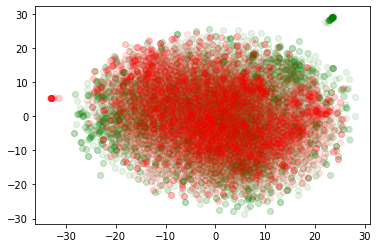

<Figure size 720x576 with 0 Axes>

In [37]:
plt.scatter(tsne_xpos,tsne_ypos,color='green',alpha=0.1)
plt.scatter(tsne_xneg,tsne_yneg,color='red',alpha=0.1)
plt.figure(figsize=(10,8))
plt.show()

## Creating DataLoader

In [20]:
class MyDataset(Dataset):
    def __init__(self,ip,transform=transforms.ToTensor()): # removed label
        self.data=ip[:,:-1]
        self.label=ip[:,-1]
        self.transform=transform
    def __getitem__(self,index):
        x=self.data[index]
        return x,self.label[index]
    
    def __len__(self):
        return len(self.data)      

In [21]:
# For Positive
tmp=len(pos)
col=torch.ones(tmp,1)
pos_data=torch.cat([pos,col],1)
print(pos.shape)
print(pos_data.shape)

torch.Size([4852, 300])
torch.Size([4852, 301])


In [22]:
# For Negative
tmp=len(neg)
print(tmp)
col=torch.zeros(tmp,1)
neg_data=torch.cat([neg,col],1)
print(neg.shape)
print(neg_data.shape)

4850
torch.Size([4850, 300])
torch.Size([4850, 301])


In [23]:
print(pos_data[0])
print(neg_data[0])

tensor([ 1.4790e-02,  4.9778e-02, -1.0656e-02,  1.4362e-01,  3.9475e-02,
        -4.0445e-02,  2.8465e-02, -1.3616e-01,  9.4141e-02,  3.0651e-02,
        -4.0947e-02, -1.7449e-01,  8.9417e-03,  3.1700e-02, -5.9462e-02,
         6.6025e-02,  4.9690e-02,  9.6548e-02,  3.8918e-02, -1.4133e-03,
        -6.1357e-02,  1.2249e-02,  8.0429e-02, -2.5284e-02, -2.2692e-02,
         6.0993e-02, -7.5733e-02,  1.0665e-01,  3.8734e-02, -4.6806e-02,
        -3.4198e-02,  9.0179e-02, -4.3179e-02,  2.7199e-02, -3.2431e-02,
         3.6964e-03,  1.5663e-03,  3.2162e-02,  9.4117e-02,  8.2220e-02,
         6.6566e-03, -7.3130e-02,  1.6568e-01,  1.2016e-02,  1.3177e-02,
        -2.5203e-02, -1.6399e-02,  2.7806e-02,  3.2524e-02,  3.3020e-02,
        -2.0854e-02,  5.2536e-02, -2.5059e-02, -5.5222e-02, -4.0785e-02,
         4.3205e-02, -2.1999e-02, -4.4106e-02,  2.7462e-02, -7.1121e-02,
        -8.2340e-03, -3.3855e-03, -1.0921e-01, -4.0215e-02, -5.4535e-02,
        -9.0580e-02, -3.8532e-02,  2.5253e-03, -5.0

In [24]:
mydata=torch.concat([pos_data,neg_data],0)
print(mydata.shape)
# 5565+5420
4852+4849

torch.Size([9702, 301])


9701

In [25]:
train_dataset=MyDataset(mydata)

print(len(train_dataset))

train_dataset_size=int(len(train_dataset)*0.6)
valid_dataset_size=len(train_dataset)-train_dataset_size

train_dataset,valid_dataset=random_split(train_dataset, [train_dataset_size, valid_dataset_size])

print(len(train_dataset))
print(len(valid_dataset))

9702
5821
3881


In [26]:
batch_size=64

In [27]:
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True,num_workers=0)
valid_loader=DataLoader(dataset=valid_dataset,batch_size=batch_size,shuffle=True,num_workers=0)

## Classification Using DAN

In [28]:
class DAN(nn.Module):
    def __init__(self,input_size=300,output_size=1):
        super(DAN,self).__init__()
        self.fc1=nn.Linear(input_size,600)
        self.fc2=nn.Linear(600,300)
        self.fc3=nn.Linear(300,output_size)
        
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        x=torch.sigmoid(x)
        return x

In [29]:
# Test Network

model=DAN()
v=pos[0]
print(v.shape)
print(model(v).shape)

torch.Size([300])
torch.Size([1])


In [30]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [31]:
input_size=300
num_classes=1
learning_rate=0.001
num_epochs=100

In [32]:
model=DAN(input_size=input_size,output_size=num_classes).to(device)

# criterion=nn.BCEWithLogitsLoss()
criterion=nn.BCELoss()

optimiser=optim.Adam(model.parameters(),lr=learning_rate)

In [33]:
def save_checkpoint(state, filename="checkpoint/DAN.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)
    print(" Saved!")


def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    print("Loaded!")

In [34]:
min_valid_loss=np.inf

for epochs in range(num_epochs):
    epoch_loss=0
    num_correct=0
    num_samples=0
    model.train()
    for batch_idx,(data,targets) in enumerate(train_loader):
        
        # send to device
        data=data.to(device=device)
        targets=targets.to(device=device)
        
        #forward pass
        scores=model(data).squeeze(1)
        
        loss=criterion(scores,targets)
#         acc=binary_acc(scores,targets)
        
        #backward pass
        optimiser.zero_grad()
        loss.backward()
        
        #GD step
        optimiser.step()
        
        epoch_loss+=loss.item()
#         epoch_acc=acc.item()
        
        num_correct+=(torch.round(scores)==targets).sum()
        num_samples+=targets.size(0)
#         num_samples+=1
        
    valid_loss=0.0
    valid_samples=0
    valid_correct=0
    model.eval()
    for data,targets in valid_loader:
        
        data=data.to(device=device)
        targets=targets.to(device=device)
        
        scores=model(data).squeeze(1)
        loss=criterion(scores,targets)
        
#         valid_loss=loss.item()*data.size(0)
        valid_loss+=loss.item()
        valid_samples+=targets.size(0)
#         valid_samples+=1
        valid_correct+=(torch.round(scores)==targets).sum()
        
        
        
    print(f'Epoch : {epochs+1} \nTraining Loss: {epoch_loss}/{num_samples} = {epoch_loss/num_samples:.5f}')
    print(f'Train Accuracy: {num_correct}/{num_samples} = {float(num_correct/num_samples * 100):.5f}')
    print(f'Validation Loss: {valid_loss}/{valid_samples} = {valid_loss/valid_samples:.5f}')
    print(f'Valid Accuracy:{valid_correct}/{valid_samples} = {float(valid_correct/valid_samples * 100):.5f}')
    
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        best_acc= float(valid_correct/valid_samples * 100)
        # Saving State Dict
        checkpoint = {"state_dict": model.state_dict(), "optimizer": optimiser.state_dict()}
        save_checkpoint(checkpoint)
        
        

Epoch : 1 
Training Loss: 50.1553658246994/5821 = 0.00862
Train Accuracy: 4156/5821 = 71.39667
Validation Loss: 29.764591217041016/3881 = 0.00767
Valid Accuracy:2961/3881 = 76.29477
Validation Loss Decreased(inf--->29.764591) 	 Saving The Model
=> Saving checkpoint
 Saved!
Epoch : 2 
Training Loss: 43.2436338365078/5821 = 0.00743
Train Accuracy: 4487/5821 = 77.08298
Validation Loss: 29.846737176179886/3881 = 0.00769
Valid Accuracy:2954/3881 = 76.11440
Epoch : 3 
Training Loss: 42.43888455629349/5821 = 0.00729
Train Accuracy: 4511/5821 = 77.49528
Validation Loss: 29.457068383693695/3881 = 0.00759
Valid Accuracy:2953/3881 = 76.08864
Validation Loss Decreased(29.764591--->29.457068) 	 Saving The Model
=> Saving checkpoint
 Saved!
Epoch : 4 
Training Loss: 40.37712225317955/5821 = 0.00694
Train Accuracy: 4592/5821 = 78.88679
Validation Loss: 30.589516311883926/3881 = 0.00788
Valid Accuracy:2932/3881 = 75.54754
Epoch : 5 
Training Loss: 38.51130819320679/5821 = 0.00662
Train Accuracy: 4668/

Epoch : 45 
Training Loss: 0.025392549730895553/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 161.79790604114532/3881 = 0.04169
Valid Accuracy:2937/3881 = 75.67638
Epoch : 46 
Training Loss: 0.023132056812755764/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 165.00954061746597/3881 = 0.04252
Valid Accuracy:2939/3881 = 75.72791
Epoch : 47 
Training Loss: 0.021427858308015857/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 172.54307329654694/3881 = 0.04446
Valid Accuracy:2934/3881 = 75.59908
Epoch : 48 
Training Loss: 0.019815334635495674/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 172.116881608963/3881 = 0.04435
Valid Accuracy:2935/3881 = 75.62484
Epoch : 49 
Training Loss: 0.018322652322240174/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 173.07101565599442/3881 = 0.04459
Valid Accuracy:2936/3881 = 75.65061
Epoch : 50 
Training Loss: 0.017050545124220662/5821 = 0.00000

Epoch : 89 
Training Loss: 0.0005687536149707739/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 273.85748195648193/3881 = 0.07056
Valid Accuracy:2935/3881 = 75.62484
Epoch : 90 
Training Loss: 0.0005244404019322246/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 274.67058551311493/3881 = 0.07077
Valid Accuracy:2932/3881 = 75.54754
Epoch : 91 
Training Loss: 0.0004885986443241563/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 276.79030215740204/3881 = 0.07132
Valid Accuracy:2931/3881 = 75.52177
Epoch : 92 
Training Loss: 0.000458093881888999/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 277.0082404613495/3881 = 0.07138
Valid Accuracy:2932/3881 = 75.54754
Epoch : 93 
Training Loss: 0.00042467622768072033/5821 = 0.00000
Train Accuracy: 5821/5821 = 100.00000
Validation Loss: 279.43866485357285/3881 = 0.07200
Valid Accuracy:2939/3881 = 75.72791
Epoch : 94 
Training Loss: 0.0003938289061125033/5821 = 

In [37]:
print(best_acc)

76.08863830566406


## On Test Data

In [38]:
# model = CBOW(vocab_size, EMDEDDING_DIM)

    # Try load checkpoint
load_checkpoint(torch.load("checkpoint/DAN.pth.tar"), model, optimiser)

=> Loading checkpoint
Loaded!


In [46]:
filename='TestData'
text=[]
test=[]
with open(filename,'r') as f:
    line=f.readline()
    while(line):
#         print(line)
        text.append([line])
        line=f.readline()
    
print(len(text))

662


In [47]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

In [48]:
for t in text:
#     print(listToString(sent))
    s=str(listToString(t))
    s = re.sub("'s","",s)
    s = re.sub("'nt"," not ",s)
    doc=nlp(s)
    for sent in doc.sents:
        i=0
        sent_repr=torch.zeros(300)
        s=preprocessor.preprocess_text(s)
        for text in s.split():
            if len(text) > 1:
                try:
                    v=torch.FloatTensor(w2vmodel[text])
                    sent_repr=sent_repr+v
                    i+=1
                except KeyError:
                    sent_repr=sent_repr
        if i!=0:
            test+=sent_repr/i
                    
#     print(f'{i} -> {s} ')

In [49]:
test=torch.tensor(test).reshape(-1,300)
print(type(test))
print(test.shape)

<class 'torch.Tensor'>
torch.Size([662, 300])


In [50]:
one=torch.ones(331,1)
zero=torch.zeros(331,1)
col=torch.cat([one,zero],0)
print(col.shape)
print(col[330][0])
print(col[331][0])
print(col[332][0])

torch.Size([662, 1])
tensor(1.)
tensor(0.)
tensor(0.)


In [51]:
tmp=len(test)
test_data=torch.cat([test,col],1)
print(test.shape)
print(test_data.shape)

torch.Size([662, 300])
torch.Size([662, 301])


In [52]:
class MyDataset(Dataset):
    def __init__(self,ip,transform=transforms.ToTensor()): # removed label
        self.data=ip[:,:-1]
        self.label=ip[:,-1]
        self.transform=transform
    def __getitem__(self,index):
        x=self.data[index]
        return x,self.label[index]
    
    def __len__(self):
        return len(self.data) 

In [53]:
test_dataset=MyDataset(test_data)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,num_workers=0)

In [54]:
for data,targets in test_loader:
    print(data.shape)
    print(targets.shape)

torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([64, 300])
torch.Size([64])
torch.Size([22, 300])
torch.Size([22])


In [55]:
min_valid_loss=np.inf
    
valid_loss=0.0
valid_samples=0
valid_correct=0
model.eval()
for data,targets in test_loader:

    data=data.to(device=device)
    targets=targets.to(device=device)

    scores=model(data).squeeze(1)
    loss=criterion(scores,targets)

#         valid_loss=loss.item()*data.size(0)
    valid_loss+=loss.item()
    valid_samples+=targets.size(0)
#         valid_samples+=1
    valid_correct+=(torch.round(scores)==targets).sum()



# print(f'Epoch : {epochs+1} \nTraining Loss: {epoch_loss}/{num_samples} = {epoch_loss/num_samples:.5f}')
# print(f'Train Accuracy: {num_correct}/{num_samples} = {float(num_correct/num_samples * 100):.5f}')

print(f'Test Loss: {valid_loss}/{valid_samples} = {valid_loss/valid_samples:.5f}')
print(f'Test Accuracy:{valid_correct}/{valid_samples} = {float(valid_correct/valid_samples * 100):.5f}')


# if min_valid_loss > valid_loss:
#     print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
#     min_valid_loss = valid_loss
#     best_acc= float(valid_correct/valid_samples * 100)
#     # Saving State Dict
#     checkpoint = {"state_dict": model.state_dict(), "optimizer": optimiser.state_dict()}
#     save_checkpoint(checkpoint)

Test Loss: 5.380916059017181/662 = 0.00813
Test Accuracy:497/662 = 75.07553


## Test Model Using Custom Sentences

In [212]:
# model = CBOW(vocab_size, EMDEDDING_DIM)

    # Try load checkpoint
load_checkpoint(torch.load("checkpoint/DAN.pth.tar"), model, optimiser)

=> Loading checkpoint


In [136]:
filename='test_temp.txt'
with open(filename,'r') as f:
    text=f.read()
    
text = re.sub("'s","",text)
text = re.sub("'nt"," not ",text)

In [137]:
doc=nlp(text)

In [138]:
for sent in doc.sents:
    print(f'->{preprocessor.preprocess_text(str(sent))}')

->movie adequate not enjoy that much
->movie seem fine hate acting overall bad movie
->awesome movie actor music terrific
->great movie in general
->hate movie
->adequate movie
->bad movie
->good movie
->excellent movie
->rather watch paint dry
->too bad thank to lovely comedic moment several fine performance not total loss
->not great movie
->not enjoy movie


In [79]:
test=[]
for sent in doc.sents:
    sent_repr=torch.zeros(300)
    i=0
    
    s=preprocessor.preprocess_text(str(sent))
    for text in s.split():
        try:
#             print(f'{text}: {w2vmodel[text][0:4]}')
            v=torch.FloatTensor(w2vmodel[text])
            sent_repr=sent_repr+v
#             print(len(sent_repr))
            i+=1
            
        except KeyError:
            sent_repr=sent_repr
    if i!=0:
        test+=sent_repr/i
test=torch.tensor(test).reshape(-1,300)
print(test.shape)

torch.Size([14, 300])


In [80]:
class MyTestDataset(Dataset):
    def __init__(self,ip,transform=transforms.ToTensor()):
        self.data=ip
        self.transform=transform
    def __getitem__(self,index):
        x=self.data[index]
        return x,0
    
    def __len__(self):
        return len(self.data)  

In [81]:
test_dataset=MyTestDataset(test)

In [82]:
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,num_workers=0)

In [83]:
for batch_idx,(data,targets) in enumerate(test_loader):
    print(data.shape,targets.shape)

torch.Size([14, 300]) torch.Size([14])


In [85]:
with torch.no_grad():
    for batch_idx,(data,targets) in enumerate(test_loader):
        data=data.to(device)
        
        scores=model(data).squeeze(1)

In [86]:
print(scores)
print(torch.round(scores))

tensor([1.7477e-02, 1.9597e-18, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9911e-01, 2.3982e-25, 1.0000e+00,
        1.0000e+00, 3.8505e-35], device='cuda:0')
tensor([0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       device='cuda:0')


### Temp

In [16]:
from SpacyPreprocessor import SpacyPreprocessor

In [52]:
pos_to_remove=['AUX','CCONJ','DET','PART','PRON','SCONJ']

In [53]:
spacy_model = spacy.load('en_core_web_lg')
preprocessor = SpacyPreprocessor(spacy_model=spacy_model, lemmatize=True,
                                 remove_numbers=True,remove_special=True,pos_to_remove=pos_to_remove)

In [188]:
filename='temp.txt'
with open(filename,'r') as f:
    text=f.read() 
    
text = re.sub("'s","",text)
text = re.sub("'nt"," not ",text)

In [70]:
nlp=spacy.load("en_core_web_lg", exclude=["parser"])

config = {"punct_chars": ['\n']}
nlp.add_pipe("sentencizer", config=config)

In [71]:
#After pos to remove
clean_text = preprocessor.preprocess_text(text)
print(clean_text)
type(clean_text)

rock destine century new conan go make splash even great than arnold schwarzenegger jean claud van damme steven segal gorgeously elaborate continuation of lord of ring trilogy so huge column of word adequately describe co writer director peter jackson expand vision of j r r tolkien middle earth fatalist worldview light cute forgettable masterpiece year in making


str

In [38]:
# before pos to remove
## DO NOT RUN CELL
clean_text = preprocessor.preprocess_text(text)
print(clean_text)
type(clean_text)

the rock be destine to be the century 's new conan and that he be go to make a splash even great than arnold schwarzenegger jean claud van damme or steven segal the gorgeously elaborate continuation of the lord of the ring trilogy be so huge that a column of word can not adequately describe co writer director peter jackson 's expand vision of j r r tolkien 's middle earth fatalist worldview light cute and forgettable


str

In [56]:
doc=nlp(text)
# print(f'-> {doc}')

for sent in doc.sents:
    print(f'->{preprocessor.preprocess_text(str(sent))}')

->rock destine century new conan go make splash even great than arnold schwarzenegger jean claud van damme steven segal
->gorgeously elaborate continuation of lord of ring trilogy so huge column of word adequately describe co writer director peter jackson expand vision of j r r tolkien middle earth
->fatalist worldview
->light cute forgettable
->masterpiece year in making


In [189]:
pos=[]
for sent in doc.sents:
    sent_repr=torch.zeros(300)
    i=0
    s=preprocessor.preprocess_text(str(sent))
    for text in s.split():
        if len(text)>1:
            try:
                print(f'{text}: {w2vmodel[text][0:4]}')
                v=torch.FloatTensor(w2vmodel[text])
                sent_repr=sent_repr+v
    #             print(len(sent_repr))
                i+=1

            except KeyError:
                sent_repr=sent_repr
    if i!=0:
        pos+=sent_repr/i
pos=torch.tensor(pos).reshape(-1,300)
# pos=vectorised_sent_pos.reshape(-1,300)

rock: [ 0.10644531  0.00592041 -0.01843262  0.18652344]
destine: [0.12597656 0.09912109 0.03393555 0.18261719]
century: [0.04418945 0.30273438 0.0234375  0.40234375]
new: [ 0.0112915   0.02893066  0.08349609 -0.04980469]
conan: [ 0.03881836 -0.01477051  0.01098633  0.24902344]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
splash: [ 0.13378906  0.25195312 -0.22753906  0.01544189]
even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
arnold: [0.03759766 0.19921875 0.08642578 0.12890625]
schwarzenegger: [-0.03710938 -0.02661133  0.00020504  0.07275391]
jean: [-0.20703125 -0.05688477 -0.13574219  0.38085938]
van: [ 0.17480469 -0.03881836 -0.00292969 -0.12109375]
steven: [-0.08398438 -0.06835938 -0.02185059  0.07666016]
gorgeously: [ 0.03015137 -0.47460938 -0.06640625 -0.13574219]
elaborate: [ 0.12597656 -0.0050048

easy: [ 0.30664062  0.06835938 -0.16015625  0.11962891]
give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
crush: [ 0.03393555  0.36914062  0.04663086 -0.00631714]
new: [ 0.0112915   0.02893066  0.08349609 -0.04980469]
title: [ 0.06640625 -0.03271484 -0.06079102 -0.19726562]
wedding: [-0.14550781 -0.15136719 -0.43554688  0.14453125]
funeral: [0.16992188 0.05566406 0.11914062 0.16113281]
far: [-0.02539062 -0.00158691 -0.02832031  0.05444336]
more: [ 0.06396484 -0.25585938 -0.08447266  0.15136719]
thoughtful: [ 0.04833984  0.08496094 -0.10595703  0.37304688]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
slice: [-0.00299072 -0.11816406  0.09179688  0.11425781]
hugh: [ 0.1484375   0.09912109 -0.05517578  0.27734375]
grant: [ 0.04833984 -0.11035156  0.03710938  0.09082031]
whimsy: [ 0.2578125  -0.2734375  -0.12890625  0.24804688]
literate: [ 0.16308594 -0.078125   -0.17773438  0.27929688]
smart: [ 0.10449219  0.01379395 

invincible: [ 0.23144531  0.37695312  0.18164062 -0.15527344]
alive: [ 0.05175781  0.01843262  0.1484375  -0.03637695]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
live: [ 0.01696777  0.01733398 -0.04174805  0.12695312]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
la: [0.09570312 0.00360107 0.13183594 0.26367188]
morton: [-0.05297852 -0.03930664 -0.04638672  0.06689453]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
actress: [-0.03295898 -0.140625   -0.14550781 -0.01757812]
portray: [ 0.14355469  0.22949219 -0.25976562 -0.28710938]
complex: [ 0.01397705  0.08984375 -0.0006218   0.03100586]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
grow: [-0.06640625  0.19921875 -0.22460938  0.12988281]
less: [ 0.04492188 -0.25976562 -0.09570312  0.19042969]
compelling: [ 0.05273438 -0.06396484 -0.00759888 -0.09082031]
far: [-0.02539062 -0.00158691 -0.02832031  0.05444336]
meander: [ 0.12988281  0.02868652 -0.20898438  0.40820312]
from: [ 0.05810547 -0.000174

animation: [ 0.10644531 -0.04052734  0.11376953  0.07470703]
lift: [ 0.0065918  -0.02990723 -0.109375   -0.12109375]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
firmly: [-0.02661133 -0.09814453  0.03271484  0.06591797]
above: [-0.12402344 -0.20605469 -0.08886719  0.265625  ]
level: [-0.15039062  0.00260925  0.03735352  0.16992188]
other: [-0.04248047 -0.08251953  0.04394531  0.13183594]
come: [0.02185059 0.06079102 0.04541016 0.12695312]
age: [ 0.15527344  0.20898438 -0.15136719 -0.03271484]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
also: [ 0.0534668   0.01202393 -0.00650024  0.00854492]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
jarring: [ 0.19335938 -0.17773438  0.00793457  0.09912109]
hard: [ 0.25390625  0.03857422 -0.03039551  0.24804688]
get: [ 0.03320312 -0.08984375 -0.29492188  0.11523438]
back: [0.07470703 0.01635742 0.08789062 0.15527344]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
boy: [ 0.23535156  0.16503906  0.09326172 -0.12

pay: [ 0.11523438 -0.01251221 -0.02294922  0.19433594]
buck: [ 0.02685547 -0.15136719 -0.39453125  0.15332031]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
hear: [ 0.06689453 -0.19726562  0.12988281  0.05029297]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
suffer: [-0.0703125   0.15820312 -0.41015625  0.18652344]
afghan: [-0.22070312 -0.2265625  -0.12890625  0.26171875]
refugee: [0.04150391 0.39453125 0.13476562 0.24316406]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
news: [-0.13867188  0.04370117 -0.13085938 -0.16796875]
still: [0.23242188 0.02099609 0.02868652 0.05126953]
unaffected: [ 0.01165771  0.13476562 -0.14941406 -0.00273132]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
human: [0.0559082  0.09228516 0.10791016 0.28320312]
thunderous: [ 0.23828125 -0.08398438  0.03063965 -0.09814453]
ride: [ 0.02990723 -0.1015625  -0.13574219  0

old: [ 0.2578125   0.11669922  0.19824219 -0.17675781]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
lively: [ 0.16308594  0.13574219 -0.04931641  0.12597656]
script: [ 0.08496094 -0.03222656 -0.0534668   0.04711914]
sharp: [ 0.13769531  0.04345703 -0.00598145  0.20800781]
acting: [-0.03369141  0.05200195 -0.09472656 -0.23339844]
partially: [ 0.06835938 -0.16699219  0.16796875  0.19921875]
animate: [ 0.50390625 -0.00848389  0.12060547  0.14453125]
interlude: [ 0.03540039  0.11083984 -0.2109375  -0.00083542]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
kiss: [ 0.10546875 -0.44335938  0.11865234  0.18652344]
seem: [ 0.09375     0.0222168  -0.18652344  0.296875  ]
minty: [-0.12060547 -0.11865234  0.15527344 -0.09277344]
fresh: [-0.04223633  0.01806641  0.22070312 -0.01446533]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
believe: [-0.1640625   0.01080322  0.03320312  0.08007812]
ray: [-0.06298828  0.177

very: [ 0.01660156  0.0456543  -0.11914062  0.06982422]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
aptly: [ 0.27539062 -0.06201172 -0.0014801   0.11572266]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
challenge: [0.01147461 0.01477051 0.0456543  0.1171875 ]
punishment: [-0.02648926 -0.02185059  0.5703125  -0.171875  ]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
actress: [-0.03295898 -0.140625   -0.14550781 -0.01757812]
tear: [0.15136719 0.10351562 0.00405884 0.06835938]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
landmark: [0.05908203 0.11523438 0.13085938 0.13867188]
role: [ 0.16992188  0.03369141 -0.06054688 -0.24902344]
rivet: [-0.09228516  0.05444336  0.03063965  0.0255127 ]
cop: [0.125      0.05615234 0.13183594 0.

purely: [ 0.18945312 -0.06738281 -0.00567627  0.3203125 ]
propaganda: [0.3515625  0.14941406 0.03808594 0.05786133]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
unabashed: [0.30859375 0.02966309 0.03588867 0.04516602]
hero: [0.38085938 0.16113281 0.22558594 0.18457031]
worship: [ 0.33398438 -0.13964844 -0.04370117  0.05932617]
nonetheless: [ 0.14453125 -0.05761719 -0.00315857  0.12988281]
likely: [ 0.16210938  0.15722656 -0.09130859  0.2578125 ]
inadvertently: [0.09375    0.04199219 0.09033203 0.078125  ]
timely: [-0.16992188 -0.03442383 -0.17382812 -0.11181641]
invaluable: [-0.11035156 -0.24316406 -0.11669922 -0.07324219]
implicit: [ 0.20605469 -0.29882812  0.06298828  0.24609375]
reminder: [-0.02001953 -0.12011719 -0.05541992 -0.18164062]
role: [ 0.16992188  0.03369141 -0.06054688 -0.24902344]
foreign: [-0.20117188  0.11425781  0.11425781  0.05053711]
policy: [-0.09179688  0.06982422  0.10009766  0.35351562]
play: [0.01226807 0.06225586 0.10693359 0.05810547]
in: [0.070312

provide: [-0.19824219 -0.18554688 -0.11279297 -0.05639648]
intriguing: [ 0.09082031 -0.06054688  0.11376953  0.01794434]
window: [ 0.09863281  0.08642578 -0.07763672 -0.09326172]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
imagination: [ 0.17675781 -0.12890625  0.11230469 -0.00805664]
hermetic: [ 0.078125   -0.0050354  -0.26953125 -0.00595093]
analysis: [-0.15234375 -0.26953125 -0.1875      0.05688477]
todd: [-0.01055908 -0.06103516  0.00637817  0.18359375]
gratifying: [-0.06298828  0.16015625 -0.16113281  0.10058594]
kind: [0.13476562 0.0456543  0.05541992 0.40429688]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
invite: [-0.18554688  0.19140625  0.24707031  0.15527344]
pick: [ 0.11669922  0.24804688 -0.05664062  0.37695312]
apart: [ 0.02050781 -0.10644531 -0.11523438  0.14746094]
fault: [-0.02490234 -0.37890625  0.33007812  0.19824219]
even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
admit: [-0.1406

be: [-0.22851562 -0.08837891  0.12792969  0.15039062]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
stab: [0.13378906 0.11425781 0.09960938 0.12353516]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
absurdist: [ 0.05688477 -0.36132812  0.05639648  0.4453125 ]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
mostly: [ 0.23925781  0.06884766 -0.14257812  0.19042969]
humor: [ 0.43359375 -0.08544922  0.09912109  0.03393555]
sweet: [ 0.08691406  0.0300293  -0.04589844  0.11767578]
gentle: [0.35546875 0.25976562 0.13183594 0.18164062]
occasionally: [ 0.15625    -0.10205078 -0.18164062  0.17480469]
cloy: [-0.06494141 -0.12304688 -0.13964844  0.23535156]
kind: [0.13476562 0.0456543  0.05541992 0.40429688]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
iranian: [-0.17773438 -0.02783203  0.2890625   0.38085938]
specialty: [-0.24414062  0.05737305 -0.04760742  0.3515625 ]
wonderful: [ 0.0062561   0.01928711 -0.08984375  0.14257812]
character: [ 0.2578125  -0.02

asia: [-0.15332031  0.03112793 -0.28710938  0.28515625]
author: [ 0.12988281 -0.140625    0.04174805  0.09277344]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
anna: [-0.03613281 -0.11230469  0.02282715  0.22558594]
italian: [-0.07861328 -0.04003906  0.27148438  0.22949219]
superstar: [ 0.15234375  0.19238281 -0.05029297  0.03588867]
aspiring: [-0.140625    0.06835938  0.01092529 -0.17285156]
directress: [-0.07275391 -0.25        0.19628906 -0.04443359]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
happen: [-0.09619141 -0.0402832   0.0390625   0.17578125]
own: [ 0.04541016 -0.01977539  0.06494141  0.21777344]
bad: [0.06298828 0.12451172 0.11328125 0.07324219]
enemy: [0.30664062 0.03417969 0.01953125 0.19238281]
roman: [ 0.00296021  0.19042969 -0.00601196  0.15039062]
never: [ 0.02392578 -0.04614258  0.00390625  0.12353516]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
filmmaker: [ 0.00325012 -0.20996094 -0.03125     0.2109375 ]
dad: [ 0.00689697 -0.0262451

even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
pronounce: [-0.03442383  0.04077148  0.203125    0.25      ]
gyro: [ 0.07226562 -0.30859375 -0.09472656  0.21484375]
correctly: [ 0.109375   -0.31445312  0.01733398 -0.06347656]
appreciate: [-0.22851562  0.03173828 -0.26367188  0.109375  ]
much: [ 0.16894531  0.06396484 -0.08447266  0.17382812]
humor: [ 0.43359375 -0.08544922  0.09912109  0.03393555]
transcend: [ 0.21582031 -0.02075195 -0.13574219 -0.05957031]
ethnic: [-0.03149414 -0.03125     0.23242188  0.1640625 ]
boundary: [-0.171875   -0.13769531  0.24609375  0.17675781]
office: [-0.05761719 -0.14160156 -0.19824219 -0.17578125]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
really: [ 0.09619141 -0.02868652 -0.10839844  0.14550781]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
alienate: [0.28515625 0.00579834 0.05371094 0.04589844]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
so: [-0.05712891 -0.0

hey: [0.02160645 0.02172852 0.05029297 0.33789062]
else: [ 0.10791016 -0.23632812  0.02148438  0.17382812]
need: [ 0.00726318  0.10058594 -0.06005859  0.03833008]
shower: [-0.1875      0.16308594 -0.16894531 -0.05566406]
construct: [-0.11083984  0.0005722   0.08349609  0.02966309]
remarkably: [ 0.25        0.12207031 -0.29882812  0.11328125]
coherent: [ 0.03173828 -0.30859375 -0.11669922  0.1953125 ]
horrifically: [0.03710938 0.05932617 0.05249023 0.12890625]
vivid: [ 0.26953125 -0.10449219  0.22070312 -0.09472656]
snapshot: [-0.11279297 -0.09375    -0.04492188  0.01043701]
turbulent: [ 0.09423828  0.21875    -0.27148438 -0.08544922]
day: [-0.15039062  0.07226562  0.03051758  0.04150391]
bang: [ 0.1953125  -0.00260925  0.12304688  0.10791016]
very: [ 0.01660156  0.0456543  -0.11914062  0.06982422]
cliched: [ 0.18652344 -0.04882812  0.04492188  0.171875  ]
drum: [ 0.03515625  0.22460938 -0.14257812 -0.03686523]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
time: [-0.04736328  0.

chalk: [-0.1328125   0.04736328  0.33398438  0.29101562]
up: [ 0.12011719 -0.0201416   0.20703125  0.14550781]
adoration: [0.34960938 0.03637695 0.01068115 0.23632812]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
de: [-0.18945312  0.18164062  0.3359375  -0.02404785]
murphy: [-0.10009766 -0.03759766 -0.02441406  0.10644531]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
myriad: [ 0.09082031  0.03344727 -0.27734375  0.01257324]
flaw: [ 0.22070312 -0.23535156  0.04541016  0.10253906]
scene: [ 0.234375    0.15429688  0.04589844 -0.20214844]
sensibility: [ 0.18652344 -0.16601562  0.05395508  0.20898438]
all: [-0.0078125  -0.0279541   0.04052734  0.11767578]
more: [ 0.06396484 -0.25585938 -0.084

sundance: [-0.03979492 -0.08935547 -0.06030273  0.21777344]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
festival: [ 0.15917969  0.01867676 -0.08984375  0.14160156]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
buzz: [ 0.4375      0.09619141 -0.05102539 -0.2421875 ]
obsess: [0.28320312 0.13183594 0.00613403 0.21679688]
fan: [ 0.28125     0.25390625  0.11279297 -0.03955078]
producer: [-0.01818848 -0.2734375  -0.12792969  0.01013184]
descend: [ 0.07714844  0.20703125 -0.17480469  0.07275391]
utah: [-0.14355469 -0.04663086  0.34375     0.48828125]
january: [-0.05224609 -0.1953125  -0.03149414  0.26367188]
ferret: [-0.08642578 -0.07763672 -0.29101562 -0.02148438]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
next: [ 0.18261719 -0.04492188  0.13867188  0.01165771]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
thing: [0.16992188 0.04907227 0.08154297 0.12011719]
tadpole: [ 0.00375366  0.22167969 

fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
code: [ 0.19921875 -0.1171875   0.34765625 -0.01611328]
talk: [-0.00352478  0.1328125  -0.00250244  0.11083984]
fly: [0.09765625 0.05639648 0.07958984 0.12792969]
right: [ 0.14550781 -0.0189209   0.09619141  0.12890625]
over: [0.08886719 0.09570312 0.01477051 0.06079102]
head: [-0.07128906 -0.07373047  0.19921875 -0.06982422]
bourne: [-0.10742188 -0.14941406  0.02978516  0.08642578]
jason: [-0.08300781  0.046875   -0.04760742  0.25390625]
bourne: [-0.10742188 -0.14941406  0.02978516  0.08642578]
scale: [ 0.07421875  0.18945312 -0.02990723  0.00188446]
building: [-0.00976562  0.02856445  0.05419922  0.01794434]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
super: [0.09619141 0.14746094 0.09130859 0.078125  ]
hero: [0.38085938 0.16113281 0.22558594 0.18457031]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
stealth: [ 0.49414062  0.07373047 -0.2265625  -0.05297852]
agent: [ 0.31835938  0.1015625  -0.14746094 -0.02294

few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
year: [0.06176758 0.2578125  0.00367737 0.14550781]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
resolute: [ 0.16601562  0.30859375  0.05004883 -0.03930664]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
emotional: [ 0.34570312 -0.07714844 -0.09228516  0.07763672]
nakedness: [ 0.28710938 -0.09912109  0.11132812  0.08691406]
exquisitely: [ 0.03088379 -0.22070312 -0.12890625 -0.02868652]
act: [0.15039062 0.14648438 0.06396484 0.02502441]
masterfully: [ 0.31640625 -0.08203125 -0.1484375  -0.17675781]
preciously: [-0.00866699 -0.00315857  0.12988281  0.08935547]
interwoven: [ 0.02612305 -0.2578125  -0.17675781  0.15332031]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
address: [-0.109375   -0.015625    0.05224609 -0.12060547]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
fascinating: [ 0.14453125 -0.06445312  0.00184631 -0.00424194]
intelligent: [ 0.15136

undoubted: [ 0.24316406  0.15722656 -0.11474609  0.07519531]
stylistic: [ 0.30078125 -0.15527344 -0.04638672  0.35742188]
tour: [ 0.19042969  0.09716797 -0.26757812 -0.06201172]
de: [-0.18945312  0.18164062  0.3359375  -0.02404785]
force: [ 0.1640625   0.16503906  0.265625   -0.1953125 ]
manage: [-0.01904297  0.09521484 -0.21582031 -0.24609375]
element: [ 0.2578125  -0.01843262  0.07519531  0.04345703]
such: [ 0.06079102 -0.01379395  0.02172852  0.09179688]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
sound: [-0.02746582 -0.00656128 -0.12255859 -0.0625    ]
cinematography: [-0.03149414 -0.21582031  0.1328125  -0.16992188]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
skill: [ 0.15234375 -0.02416992  0.10839844  0.15625   ]
smith: [-0.23144531  0.1328125  -0.02185059  0.04370117]
point: [ 0.12255859 -0.00653076  0.0625      0.18261719]
simple: [ 0.30664062 -0.07519531 -0.05249023  0.03442383]
obvious: [ 0.2421875   0.06396484 -0.25585938  0.21191406]
people: [ 0.26367

movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
quiet: [0.37890625 0.24023438 0.02355957 0.09716797]
affirmation: [-0.05371094 -0.18457031 -0.04077148  0.00182343]
neighborhood: [-0.0378418   0.12695312  0.15332031  0.17089844]
value: [0.07958984 0.01879883 0.109375   0.01867676]
give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
honest: [0.26367188 0.00668335 0.01470947 0.2578125 ]
live: [ 0.01696777  0.01733398 -0.04174805  0.12695312]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
glow: [ 0.11132812  0.21484375  0.09423828 -0.15527344]
tease: [0.09912109 0.0007515  0.00248718 0.16699219]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
relentless: [ 0.12792969  0.28320312 -0.15527344  0.05859375]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
deed: [ 0.25585938 -0.11621094  0.11621094 -0.2734375 ]
bad: [0.06298828 0.12451172 0.11328125 0.07324219]
deed: [ 0.25585938 -0.11621094  0.11621094 -0.2734375 ]
reversal: [-0.19238281 -0.21972656 -0.25        0.1

editing: [ 0.01092529  0.00744629 -0.26367188 -0.05786133]
tight: [ 0.04199219  0.02856445 -0.33398438  0.20800781]
hush: [ 0.47070312 -0.05859375  0.09619141 -0.23339844]
sympathetically: [-0.07666016  0.09716797 -0.04370117  0.12695312]
capture: [ 0.03369141  0.27929688 -0.13476562 -0.24609375]
often: [ 0.15039062  0.03759766 -0.15917969  0.20410156]
futile: [0.24804688 0.28125    0.03955078 0.14550781]
lifestyle: [ 0.03710938  0.06396484 -0.28125     0.18066406]
young: [ 0.09472656  0.328125   -0.04858398 -0.00665283]
people: [ 0.26367188 -0.01916504  0.02893066  0.234375  ]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
modern: [ 0.08935547 -0.00500488  0.12304688 -0.01696777]
japan: [-0.32226562  0.02307129  0.17773438  0.3359375 ]
gai: [-0.23339844  0.16894531  0.1171875   0.16699219]
come: [0.02185059 0.06079102 0.04541016 0.12695312]
close: [-0.00320435 -0.07080078  0.08984375  0.21191406]
actress: [-0.03295898 -0.140625   -0.14550781 -0.01757812]
remember: [ 0.17382812 -0.0

violence: [ 0.05761719 -0.12890625  0.14941406  0.20410156]
far: [-0.02539062 -0.00158691 -0.02832031  0.05444336]
less: [ 0.04492188 -0.25976562 -0.09570312  0.19042969]
sadistic: [-0.23828125  0.1796875  -0.00337219  0.13574219]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
usual: [ 0.04150391  0.22070312 -0.22753906  0.13769531]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
typical: [ 0.18457031  0.24609375 -0.16210938  0.11865234]
fast: [ 0.14453125 -0.01239014  0.11914062  0.04150391]
furious: [ 0.18652344  0.16601562  0.19238281 -0.21679688]
full: [ 0.1328125  -0.10986328 -0.19726562  0.14941406]
off: [-0.07177734 -0.11035156  0.00823975  0.15136719]
cuff: [-0.05273438 -0.20996094  0.01239014  0.12060547]
imaginative: [ 0.01086426 -0.09912109  0.01672363  0.23144531]
flourish: [-0.09033203  0.23730469 -0.25390625  0.04467773]
compelling: [ 0.05273438 -0.06396484 -0.00759888 -0.09082031]
exotic: [ 0.02185059  0.07177734 -0.11376953  0.16992188]
fast: [ 0.144531

journey: [ 0.05029297  0.265625   -0.15136719 -0.03857422]
interesting: [ 0.11572266 -0.13574219 -0.08789062  0.14453125]
parisian: [-0.06738281  0.0267334   0.05517578  0.14550781]
rebirth: [0.203125   0.13671875 0.03173828 0.1015625 ]
stillborn: [0.01470947 0.11132812 0.14550781 0.16210938]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
address: [-0.109375   -0.015625    0.05224609 -0.12060547]
hungry: [ 0.04394531  0.3515625  -0.20507812  0.17871094]
need: [ 0.00726318  0.10058594 -0.06005859  0.03833008]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
pg: [-0.05908203  0.13769531 -0.09814453  0.38671875]
rate: [-0.02026367  0.05834961  0.03015137  0.36523438]
family: [-0.01879883 -0.11816406 -0.14355469  0.13964844]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
too: [ 0.12988281  0.13183594 -0.03295898  0.1484375 ]
much: [ 0.16894531  0.06396484 -

sam: [-0.13964844  0.30664062 -0.06201172 -0.00811768]
jones: [-0.15332031  0.08984375 -0.11181641  0.3359375 ]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
very: [ 0.01660156  0.0456543  -0.11914062  0.06982422]
lucky: [ 0.05029297 -0.03088379 -0.09912109  0.13574219]
filmmaker: [ 0.00325012 -0.20996094 -0.03125     0.2109375 ]
day: [-0.15039062  0.07226562  0.03051758  0.04150391]
drop: [-0.04272461 -0.1796875   0.02539062  0.16015625]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
record: [ 0.05395508  0.15820312  0.10400391 -0.00028992]
label: [ 0.11767578  0.0177002  -0.1953125   0.22265625]
prove: [-0.24023438 -0.00473022 -0.1875     -0.07958984]
man: [ 0.32617188  0.13085938  0.03466797 -0.08300781]
ruin: [ 0.05517578  0.03735352 -0.07128906  0.1796875 ]
fortune: [ 0.21289062  0.16503906 -0.29882812 -0.06835938]
screenplay: [-0.07324219 -0.28515625 -0.25        0.17480469]
direction: [ 0.0378418  -0.15820312 -0.01782227 -0.15527344]
thankfully: [-0.00076294

aside: [ 0.17480469 -0.0703125   0.12695312  0.26757812]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
year: [0.06176758 0.2578125  0.00367737 0.14550781]
simone: [-0.06884766 -0.02404785  0.0534668   0.0402832 ]
andrew: [-0.06445312  0.12792969 -0.09765625  0.05224609]
brilliant: [0.11621094 0.14160156 0.1171875  0.10595703]
anti: [0.16601562 0.17773438 0.29101562 0.03881836]
hollywood: [-0.265625    0.23925781 -0.16210938  0.33984375]
satire: [ 0.20214844 -0.18066406 -0.06884766  0.21386719]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
wickedly: [-0.06884766 -0.16113281  0.04052734 -0.00059891]
eccentric: [-0.06787109  0.07421875 -0.03393555  0.20019531]
enchantment: [ 0.55078125 -0.08544922 -0.02612305 -0.06542969]
handily: [-0.17675781  0.15820312 -0.10644531 -0.08496094]
direct: [ 0.125      -0.21972656  0.01953125  0.02429199]
edit: [-0.31835938  

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
enjoyable: [-0.11181641 -0.18652344 -0.25        0.08349609]
family: [-0.01879883 -0.11816406 -0.14355469  0.13964844]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
much: [ 0.16894531  0.06396484 -0.08447266  0.17382812]
aim: [ 0.00294495  0.33007812  0.23632812 -0.15625   ]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
youngster: [ 0.16113281  0.14355469 -0.03295898 -0.01940918]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
horse: [ 0.00053406  0.03112793  0.0050354  -0.09179688]
frisky: [ 0.09179688  0.32421875 -0.27148438  0.02941895]
fresh: [-0.04223633  0.01806641  0.22070312 -0.01446533]
romantic: [-0.08886719 -0.20019531 -0.15332031  0.30664062]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
sexual: [-0.01080322  0.05517578  0.06103516  0.05639648]
politic: [0.10400391 0.03271484 0.03393555 0.375     ]
challenge: [0.01147461 0.0

director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
opera: [ 0.33984375 -0.12011719 -0.02783203 -0.10888672]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
translation: [-0.04467773 -0.0213623  -0.01507568  0.08837891]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
convey: [ 0.23535156 -0.22167969 -0.08691406 -0.24609375]
heave: [ 0.20507812 -0.01977539  0.1171875   0.19140625]
passion: [ 0.11572266 -0.16503906  0.14355469  0.02233887]
famous: [0.05737305 0.06445312 0.08544922 0.20703125]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
jealousy: [ 0.12792969 -0.16992188 -0.22460938  0.02355957]
murder: [-0.05395508  0.01263428  0.4140625  -0.05273438]
suicide: [-0.26367188  0.04272461 -0.29492188  0.1875    ]
fandango: [ 0.35546875 -0.1484375   0.16894531  0.0112915 ]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
cinematic: [ 0.045

work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
part: [0.0071106  0.05639648 0.01068115 0.08251953]
avoid: [ 0.28710938  0.15234375  0.00674438 -0.09521484]
stupid: [ 0.16210938 -0.07275391  0.15820312  0.25195312]
cliche: [ 0.39453125 -0.08105469  0.08300781  0.44726562]
formulaic: [ 0.03125    -0.03417969 -0.16601562  0.44140625]
pothole: [ 0.12109375  0.22949219  0.04638672 -0.10253906]
befall: [ 0.0625      0.11474609 -0.0324707   0.02209473]
brother: [-0.0612793  -0.06030273  0.1953125  -0.13769531]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
girl: [ 0.13867188  0.0037384   0.06445312 -0.07617188]
refreshingly: [ 0.22753906 -0.13085938 -0.16894531  0.12792969]
adult: [-0.04589844 -0.23535156 -0.14746094  0.04296875]
take: [-0.05102539  0.004150

enjoy: [-0.00125885 -0.04833984 -0.28320312  0.32421875]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
hate: [0.1328125  0.08007812 0.28710938 0.09863281]
later: [ 0.18847656 -0.17382812  0.15332031  0.05566406]
map: [ 0.14257812 -0.14648438  0.25976562  0.23242188]
inner: [-0.0246582   0.24414062  0.06103516  0.10302734]
rhythm: [ 0.04711914 -0.01495361  0.05004883 -0.17089844]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
jealousy: [ 0.12792969 -0.16992188 -0.22460938  0.02355957]
sacrifice: [ 0.1640625   0.13085938 -0.11376953  0.6015625 ]
draw: [ 0.09570312  0.02880859  0.09863281 -0.08642578]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
master: [-0.05078125 -0.01196289  0.02502441  0.08789062]
steady: [ 0.02575684  0.1171875  -0.40820312  0.234375  ]
stroke: [-0.00765991  0.33789062  0.05322266 -0.13085938]
sarc: [ 0.13085938 -0.05102539  0.10498047  0.13671875]
que: [-0.09277344  0.16894531  0.19628906  0.15527344]
su: [-0.09082031  0.5859375  -0.010

mr: [-0.20410156  0.08447266  0.01550293  0.08300781]
zhang: [0.08642578 0.00085831 0.11572266 0.11279297]
subject: [0.06640625 0.02355957 0.1640625  0.10449219]
matter: [0.10791016 0.01660156 0.07617188 0.02026367]
degree: [ 0.03588867 -0.10644531 -0.16015625  0.19140625]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
least: [ 0.08056641 -0.14160156  0.12792969  0.296875  ]
quintessentially: [0.24316406 0.00958252 0.03808594 0.31640625]
american: [-0.18652344  0.01660156  0.25195312  0.515625  ]
approach: [0.09716797 0.11035156 0.02954102 0.24316406]
storytelling: [ 0.26367188 -0.171875   -0.1796875   0.12792969]
call: [-0.11816406  0.08154297  0.15039062  0.03100586]
iranian: [-0.17773438 -0.02783203  0.2890625   0.38085938]
fast: [ 0.14453125 -0.01239014  0.11914062  0.04150391]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
remarkable: [ 0.11572266  0.18261719 -0.08789062  0.01818848]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
appear: [-0.05786133  0.08

beautifully: [ 0.02941895 -0.20019531 -0.2578125  -0.09326172]
accomplish: [-0.07177734  0.14648438 -0.13378906  0.0625    ]
lyrical: [ 0.20507812 -0.20410156  0.11474609 -0.04370117]
meditation: [0.25195312 0.04589844 0.09716797 0.33398438]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
bunch: [ 0.05419922  0.1953125  -0.01098633  0.28125   ]
despondent: [ 0.31445312  0.21972656 -0.18066406 -0.25195312]
vulnerable: [ 0.01733398  0.3203125  -0.265625    0.09765625]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
live: [ 0.01696777  0.01733398 -0.04174805  0.12695312]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
renown: [ 0.03369141  0.0859375  -0.14746094  0.13085938]
chelsea: [-0.3984375  -0.03222656  0.01556396  0.3359375 ]
hotel: [ 0.02612305  0.0144043  -0.03442383 -0.00582886]
total: [ 0.10400391 -0.14257812  0.12060547  0.07519531]
success: [-0.046875    0.00448608 -0.14160156 -0.09082031]
no: [ 0.08251953 -0.15136719  0.06591797  0.02001953]
true: [0.127

at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
convey: [ 0.23535156 -0.22167969 -0.08691406 -0.24609375]
young: [ 0.09472656  0.328125   -0.04858398 -0.00665283]
angst: [ 0.4140625   0.109375   -0.15234375  0.14941406]
indeed: [0.08300781 0.0324707  0.00466919 0.16601562]
feel: [-0.05566406  0.01373291 -0.14160156 -0.05151367]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
reason: [0.20507812 0.00421143 0.08447266 0.09130859]
picture: [ 0.09667969  0.22949219 -0.09277344 -0.04711914]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
predecessor: [ 0.0279541  -0.09375     0.16601562 -0.00680542]
no: [ 0.08251953 -0.15136719  0.06591797  0.02001953]
long: [-0.14355469  0.10449219 -0.19042969  0.33007812]
simply: [0.203125   0.00245667 0.06347656 0.27734375]
spoof: [ 0.2421875   0.00805664 -0.03112793  0.06152344]
mini: [-0.00982666  0.08642578  0.08154297  

am: [-0.16699219 -0.06640625  0.05737305 -0.05957031]
radio: [ 0.09521484 -0.10107422 -0.10205078 -0.02636719]
soundtrack: [ 0.20800781 -0.19824219 -0.13964844  0.04150391]
game: [0.11474609 0.05273438 0.04296875 0.00448608]
cast: [ 0.17675781  0.07324219 -0.12988281 -0.15429688]
inimitable: [0.29101562 0.05712891 0.13476562 0.11669922]
especially: [ 0.10546875  0.15722656 -0.08154297  0.0612793 ]
keep: [ 0.06054688 -0.01293945 -0.10888672  0.14355469]
unusual: [ 0.03466797  0.05151367 -0.1953125   0.19921875]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
choke: [ 0.05981445 -0.05273438  0.00286865 -0.06054688]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
own: [ 0.04541016 -0.01977539  0.06494141  0.21777344]
conceit: [ 0.40429688 -0.1875      0.03491211  0.35351562]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
fine: [ 0.24316406 -0.02770996  0.16113281 -0.08007812]
job: [-0.0145874  -0.04833984 -0.136718

power: [ 0.13769531  0.1640625   0.22070312 -0.12060547]
team: [-0.25390625  0.02856445  0.10449219 -0.07568359]
fashion: [-0.10449219  0.05395508 -0.2578125   0.16992188]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
more: [ 0.06396484 -0.25585938 -0.08447266  0.15136719]
laugh: [ 0.24511719 -0.11230469  0.16601562  0.3125    ]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
many: [ 0.19335938 -0.0043335  -0.03222656  0.13964844]
question: [ 0.10107422  0.09912109 -0.03759766  0.265625  ]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
there: [ 0.09423828 -0.02282715  0.05224609  0.02636719]
mold: [ 0.00674438  0.4140625  -0.08105469 -0.14160156]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
gold: [-0.20800781 -0.02819824  0.02185059  0.16015625]
surprisingly: [ 0.18164062  0.07128906 -0.15429688 -0.03662109]
sincere: [0.0065918  0.14746094 0.21679688 0.21484375]
average: [ 0.08544922 -0.106445

terrific: [-0.04833984  0.11669922 -0.07714844  0.09472656]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
study: [-0.05981445 -0.04223633 -0.07910156  0.06884766]
probe: [-0.26953125 -0.01300049  0.11328125 -0.4609375 ]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
life: [-0.06787109  0.09521484  0.03564453  0.171875  ]
complex: [ 0.01397705  0.08984375 -0.0006218   0.03100586]
man: [ 0.32617188  0.13085938  0.03466797 -0.08300781]
impress: [ 0.06347656  0.21972656 -0.04516602 -0.21972656]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
open: [-0.0378418  -0.07568359  0.13085938  0.06738281]
surprise: [ 0.02575684 -0.06542969  0.16210938  0.01623535]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
narrative: [ 0.40625    -0.24804688 -0.16796875 -0.0612793 ]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
know: [-0.05493164 -0.1171875   0.02783203  0.07470703]
possible: [-0.07714844  0

subversive: [ 0.08691406 -0.14550781  0.20410156  0.20410156]
meditative: [ 0.41015625 -0.09814453  0.14746094  0.13769531]
clinical: [-0.40234375  0.24902344 -0.08984375  0.06445312]
poetic: [ 0.31835938 -0.30664062  0.20605469  0.03735352]
piano: [ 0.15917969 -0.17578125 -0.10449219 -0.06640625]
teacher: [ 0.26367188 -0.16113281  0.10791016  0.14453125]
daring: [0.08642578 0.06030273 0.02722168 0.02233887]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
genius: [ 0.26367188 -0.12597656  0.15429688  0.3203125 ]
weak: [ 0.09570312  0.19335938 -0.1484375   0.26171875]
harry: [ 0.03613281  0.07421875 -0.20996094  0.09667969]
potter: [-0.01422119 -0.06933594 -0.07861328  0.28320312]
book: [ 0.11279297 -0.02612305 -0.04492188  0.06982422]
transform: [-0.2578125   0.2578125  -0.07324219 -0.17675781]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
strong: [ 0.02575684  0.11474609 -0.02075195  0.11083984]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
by: [-0.11572266

be: [-0.22851562 -0.08837891  0.12792969  0.15039062]
kind: [0.13476562 0.0456543  0.05541992 0.40429688]
attentive: [ 0.00735474  0.07763672 -0.19042969  0.24316406]
concern: [-0.02905273  0.07324219  0.09765625  0.17675781]
hoffman: [-0.00056076 -0.03955078 -0.02746582  0.02050781]
bring: [-0.05322266  0.06640625  0.07617188 -0.04956055]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
private: [-0.07861328 -0.03491211  0.02807617  0.07666016]
lesson: [ 0.2578125   0.03759766  0.16894531 -0.0189209 ]
now: [0.02648926 0.01916504 0.02197266 0.05981445]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
public: [-0.01757812  0.00579834 -0.02575684  0.05078125]
recital: [ 0.20898438 -0.08886719 -0.0065918  -0.00358582]
comic: [ 0.24414062 -0.03735352 -0.13476562  0.21386719]
gem: [0.04174805 0.19433594 0.14453125 0.15527344]
with: [-0.02490234  0.02197266 -0.035

as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
surreal: [0.11523438 0.08496094 0.046875   0.1015625 ]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
dream: [-0.07470703 -0.1015625   0.12988281  0.02258301]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
detailed: [-0.17675781 -0.18457031 -0.11572266 -0.12109375]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
photograph: [ 0.05859375  0.31054688 -0.06835938  0.00369263]
visually: [ 0.06201172 -0.203125   -0.20507812  0.00939941]
dexterous: [-0.04199219  0.0480957  -0.30078125  0.11767578]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
imaginatively: [ 0.00354004 -0.08251953 -0.10693359  0.09814453]
overwhelming: [ 0.08251953  0.14453125 -0.25585938  0.02148438]
lawrence: [-0.140625    0.04394531 -0.11083984  0.36914062]
bounce: [-0.08886719  0.13085938 -0.10351562  0.06298828]
all: [-0.0078125  -0.0279541   0.04052734  0.11767578]
over: [0.08886719

stoically: [ 0.14941406  0.20800781 -0.2578125   0.23632812]
deliver: [-0.03466797 -0.0546875  -0.08642578 -0.00473022]
hokum: [ 0.30078125  0.06347656 -0.03027344  0.22265625]
hart: [-0.42382812  0.15429688  0.02478027  0.40625   ]
war: [0.33984375 0.3046875  0.09863281 0.16796875]
never: [ 0.02392578 -0.04614258  0.00390625  0.12353516]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
still: [0.23242188 0.02099609 0.02868652 0.05126953]
worthy: [-0.02001953  0.1875     -0.01171875  0.29296875]
addition: [ 0.04541016  0.11523438 -0.17578125 -0.0133667 ]
grow: [-0.06640625  0.19921875 -0.22460938  0.12988281]
canon: [0.3125     0.11035156 0.19433594 0.30664062]
post: [-0.02148438 -0.00379944 -0.11474609 -0.046875  ]
saving: [ 0.14550781  0.12988281 -0.04614258  0.06396484]
private: [-0.07861328 -0.03491211  0.02807617  0.07666016]
ryan: [-0.29492188  0.30273438  0.06884766  0.359375  ]
tribute: [0.26171875 0.07763672 0.1484375  0.4296875 ]
great: [ 0.07177734  0.20800781 -0.02844

far: [-0.02539062 -0.00158691 -0.02832031  0.05444336]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
series: [-0.12792969  0.09326172 -0.02087402 -0.12255859]
assure: [-0.38085938  0.02880859 -0.02404785 -0.15332031]
wonderfully: [-0.03564453 -0.14941406 -0.11962891  0.05834961]
respectful: [0.22460938 0.09570312 0.13574219 0.41015625]
past: [ 0.01049805  0.09277344 -0.17773438  0.03088379]
thrill: [ 0.265625   -0.08886719  0.15429688 -0.06103516]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
abundantly: [ 0.04589844 -0.10449219 -0.08154297  0.11425781]
clear: [-0.00024414 -0.10205078 -0.14941406 -0.04248047]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
phenomenon: [ 0.32617188  0.02502441 -0.17675781  0.16015625]
once: [-0.02502441  0.03320312  0.06201172  0.08203125]
again: [ 0.08691406  0.15136719 -0.02319336  0.22949219]
reinvent: [ 0.201

suffer: [-0.0703125   0.15820312 -0.41015625  0.18652344]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
lack: [ 0.08154297 -0.03149414 -0.2578125  -0.17773438]
compelling: [ 0.05273438 -0.06396484 -0.00759888 -0.09082031]
comprehensible: [-0.06591797 -0.26953125  0.01672363  0.16894531]
narrative: [ 0.40625    -0.24804688 -0.16796875 -0.0612793 ]
still: [0.23242188 0.02099609 0.02868652 0.05126953]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
visual: [ 0.24902344 -0.20800781 -0.04394531 -0.08251953]
treat: [-0.16113281  0.20410156  0.16894531  0.28710938]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
almost: [ 0.18652344 -0.14941406  0.05883789  0.12011719]
unsurpassed: [-0.03198242  0.14355469 -0.04370117  0.08398438]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
unassuming: [ 0.41796875  0.17675781 -0.04760742  0.13671875]
pure: [ 0.23046875 -0.09228516  0.05883789  0.0390625 ]
heart: [-0.15039062  0.24316406  0.06396484  0.11132812]
not: [ 0.0849

director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
michael: [-0.17382812  0.2109375  -0.17089844  0.35742188]
dowse: [ 0.15332031  0.19140625 -0.07470703 -0.07080078]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
superficially: [ 0.21191406  0.15917969 -0.03442383  0.27734375]
understand: [-0.08935547 -0.04980469 -0.19726562 -0.05834961]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
hold: [ 0.01245117 -0.05322266  0.13476562  0.03491211]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
contempt: [ 0.20019531 -0.06396484  0.4609375  -0.12060547]
taste: [-0.05224609  0.22265625  0.05786133  0.05493164]
run: [-0.07324219  0.08398438 -0.00744629  0.03979492]
difficult: [ 0.3046875   0.10498047 -0.05444336  0.19335938]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
absolutely: [-0.04370117 -0.27929688  0.09277344 -0.07373047]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
miss: [ 0.200

deserve: [-0.23730469  0.04882812 -0.1484375   0.2265625 ]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
pass: [ 0.23828125 -0.12304688 -0.09130859  0.04516602]
interest: [0.13574219 0.07080078 0.03173828 0.11767578]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
event: [-0.0201416  -0.06933594 -0.03564453  0.05493164]
shape: [-0.078125    0.36914062 -0.08203125 -0.17285156]
world: [-0.06396484  0.06835938  0.22460938  0.13183594]
beyond: [ 0.05541992 -0.00035858 -0.01477051  0.21679688]
own: [ 0.04541016 -0.01977539  0.06494141  0.21777344]
horizon: [ 0.14648438  0.19726562 -0.02160645 -0.06689453]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
remind: [-0.0456543  -0.0456543   0.08496094 -0.05957031]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
exciting: [-0.24609375 -0.171875    0.066894

ahhhh: [ 0.05078125 -0.17773438  0.24902344  0.13183594]
revenge: [-0.02233887  0.23339844  0.19628906 -0.45898438]
sweet: [ 0.08691406  0.0300293  -0.04589844  0.11767578]
create: [-0.03857422  0.02062988 -0.03149414 -0.05688477]
engaging: [ 0.15136719  0.10986328  0.0625     -0.04882812]
characterization: [-0.0480957   0.10400391 -0.06030273  0.0050354 ]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
lively: [ 0.16308594  0.13574219 -0.04931641  0.12597656]
enjoyable: [-0.11181641 -0.18652344 -0.25        0.08349609]
cultural: [-0.07519531  0.13964844  0.18261719  0.14550781]
mix: [-0.00031662  0.23242188  0.0071106   0.10986328]
emerge: [-0.14257812  0.2265625  -0.36914062 -0.03369141]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
clear: [-0.00024414 -0.10205078 -0.14941406 -0.04248047]
view: [-0.0703125  -0.02441406 -0.18847656  0.17285156]
gear: [-0.07617188  0.16601562 -0.28125     0.08496094]
justice: [-0.08105469  0.19921875  0.12597656  0.16015625]
grind: [ 0.0717

far: [-0.02539062 -0.00158691 -0.02832031  0.05444336]
future: [-0.08056641 -0.01281738  0.14355469  0.05175781]
awesome: [ 0.07470703 -0.09033203 -0.0559082   0.12011719]
consider: [-0.06347656  0.09082031  0.1953125   0.09326172]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
period: [-0.0456543   0.14746094 -0.00314331  0.140625  ]
detail: [ 0.00897217  0.02478027 -0.03369141 -0.18945312]
matter: [0.10791016 0.01660156 0.07617188 0.02026367]
heart: [-0.15039062  0.24316406  0.06396484  0.11132812]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
transporting: [ 0.203125    0.20605469 -0.04443359 -0.06591797]
stay: [-0.00958252 -0.08447266 -0.10888672  0.20996094]
put: [-0.01422119  0.10058594  0.00034332  0.06494141]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
past: [ 0.01049805  0.09277344 -0.17773438  0.03088379]
inspire: [ 0.05249023  0.30273438  0.22558594 -0.12988281]
continue: [-0.04467773  0.1132812

american: [-0.18652344  0.01660156  0.25195312  0.515625  ]
remake: [ 0.17480469 -0.12890625  0.09521484  0.28515625]
weight: [ 0.05053711  0.14453125  0.07226562 -0.09765625]
piece: [ 0.1796875  -0.09130859 -0.15527344 -0.08642578]
professionalism: [-0.06201172  0.01916504 -0.0213623  -0.14453125]
chilly: [0.01708984 0.1953125  0.00518799 0.10595703]
production: [ 0.04248047 -0.03344727 -0.04931641  0.05566406]
fascination: [0.3828125  0.16113281 0.01843262 0.21582031]
embed: [-0.24121094 -0.12988281 -0.24609375  0.28320312]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
lurid: [ 0.14453125 -0.00393677  0.05151367 -0.1796875 ]
topic: [ 0.14941406  0.01159668 -0.01330566  0.26953125]
prove: [-0.24023438 -0.00473022 -0.1875     -0.07958984]
recommendation: [-0.2890625  -0.23535156  0.22851562  0.16699219]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
absurdist: [ 0.05688477 -0.36132812  0.05639648  0.4453125 ]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
abou

deepen: [-0.1640625   0.12597656  0.06884766  0.06689453]
cq: [ 0.04467773 -0.1484375   0.00958252 -0.08691406]
reflection: [-0.07421875  0.09472656  0.01208496  0.09082031]
artist: [ 0.15722656 -0.14941406 -0.20703125  0.09667969]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
cinema: [ 0.00866699 -0.08203125  0.07714844  0.26367188]
self: [ 0.08544922  0.140625   -0.01806641  0.08789062]
suggest: [-0.17773438 -0.03955078 -0.16503906  0.08398438]
less: [ 0.04492188 -0.25976562 -0.09570312  0.19042969]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
new: [ 0.0112915   0.02893066  0.08349609 -0.04980469]
voice: [ 0.21875    -0.0090332  -0.11816406 -0.11865234]
deserve: [-0.23730469  0.04882812 -0.1484375   0.2265625 ]
consider: [-0.06347656  0.09082031  0.1953125   0.09326172]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
possible: [-0.07714844  0.10644531  0.04223633 -0.00567627]
successor: [ 0.16894531 -0.16601562  0.01080322  0.10546875]
good: [ 0.04052734  0

give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
steady: [ 0.02575684  0.1171875  -0.40820312  0.234375  ]
pulse: [-0.09912109 -0.08886719  0.01953125 -0.14941406]
life: [-0.06787109  0.09521484  0.03564453  0.171875  ]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
beautiful: [-0.01831055  0.05566406 -0.01153564  0.07275391]
city: [-0.0100708   0.05737305  0.18359375 -0.04003906]
view: [-0.0703125  -0.02441406 -0.18847656  0.17285156]
through: [ 0.01599121  0.06835938 -0.16992188  0.18847656]
eye: [ 0.16210938  0.08642578 -0.03344727 -0.22167969]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
spite: [ 0.14941406  0.203125   -0.25390625 -0.11962891]
tragic: [-0.01031494  0.01507568  0.1875      0.09423828]
loss: [ 0.07470703  0.15527344 -0.00069427 -0.06030273]
increase: [-0.10595703 -0.12304688 -0.15820312  0.20507812]
decrepitude: [ 0.3359375   0.20703125 -0.23144531  0.33203125]
know: [-0.05493164 -0.1171875  

animation: [ 0.10644531 -0.04052734  0.11376953  0.07470703]
wild: [ 0.07177734  0.09472656 -0.0402832   0.15625   ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
surprisingly: [ 0.18164062  0.07128906 -0.15429688 -0.03662109]
cinematic: [ 0.04541016 -0.12792969  0.09863281  0.16308594]
experience: [ 0.0378418  -0.06005859 -0.05810547 -0.15332031]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
little: [ 0.18945312  0.13671875 -0.09472656  0.2421875 ]
timewaster: [ 0.18847656 -0.03930664 -0.06445312  0.12402344]
help: [0.04980469 0.06640625 0.03833008 0.02355957]
especially: [ 0.10546875  0.15722656 -0.08154297  0.0612793 ]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
cool: [ 0.1640625   0.1875     -0.04101562  0.125     ]
presence: [ 0.16210938  0.203125   -0.04003906 -0.03466797]
jean: [-0.20703125 -0.05688477 -0.13574219  0.38085938]
reno: [-0.208

regard: [ 0.0480957   0.20605469 -0.05761719  0.05151367]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
key: [ 0.06396484 -0.08203125  0.07177734 -0.10009766]
turning: [-0.05053711  0.24414062  0.03930664  0.02685547]
point: [ 0.12255859 -0.00653076  0.0625      0.18261719]
century: [0.04418945 0.30273438 0.0234375  0.40234375]
return: [ 0.05126953  0.12597656 -0.13769531  0.08837891]
again: [ 0.08691406  0.15136719 -0.02319336  0.22949219]
again: [ 0.08691406  0.15136719 -0.02319336  0.22949219]
image: [ 0.26171875  0.55859375  0.00524902 -0.09814453]
dissident: [-0.05517578  0.10888672  0.07910156  0.22265625]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
street: [0.09814453 0.07568359 0.03088379 0.17871094]
alarmingly: [ 0.23925781 -0.01373291 -0.14160156  0.00726318]
current: [-0.09619141  0.03515625  0.01086426  0.06225586]
feature: [-0.04467773  0.140625   -0.15234375  0.00946045]
debuter: [-0.00872803 -0.00891113 -0.00921631 -0.03808594]
direct: [ 0.125      -0.21972

utterly: [ 0.21386719 -0.06835938  0.02575684  0.11914062]
charming: [0.19140625 0.01647949 0.06835938 0.0456543 ]
hilarious: [ 0.01782227 -0.20605469  0.06103516  0.10888672]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
remind: [-0.0456543  -0.0456543   0.08496094 -0.05957031]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
disney: [-0.14648438  0.07666016 -0.05834961  0.36132812]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
preach: [ 0.3125     -0.00231934  0.23632812 -0.02648926]
completely: [ 0.06201172 -0.13769531  0.1171875   0.07519531]
different: [ 0.02685547 -0.07617188  0.02697754  0.13671875]
choir: [ 0.17578125 -0.02575684 -0.27148438 -0.24902344]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
same: [ 0.17089844 -0.01208496  0.03613281  0.17285156]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
amazing: [ 0.0737304

ever: [-0.22558594 -0.0324707   0.0402832   0.12695312]
wonder: [ 0.05883789 -0.03015137  0.02038574  0.17089844]
ending: [-0.125       0.03417969 -0.16601562  0.22167969]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
input: [-0.29296875 -0.20898438 -0.26367188  0.04614258]
studio: [ 0.15332031 -0.00500488 -0.22753906  0.01074219]
executive: [-0.03417969 -0.22363281 -0.03125    -0.20117188]
test: [-0.14257812 -0.03686523  0.13574219 -0.06201172]
audience: [ 0.34375    -0.05517578 -0.01721191  0.06738281]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
here: [-0.02734375  0.04492188  0.07666016  0.13378906]
exciting: [-0.24609375 -0.171875    0.06689453 -0.02429199]
direct: [ 0.125      -0.21972656  0.01953125  0.02429199]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
ghost: [ 0.2265625   0.15625     0.00312805 -0.10546875]
imagery: [0.28125    0.03015137 0.07275391 0.28320312]
show: [-0.01867676 -0.0

moody: [ 0.25585938  0.00939941 -0.13183594  0.00799561]
multi: [-0.10205078 -0.06030273 -0.11230469  0.12597656]
dimensional: [-0.07861328 -0.05200195  0.04467773 -0.07275391]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
sci: [-0.07519531 -0.09716797  0.265625    0.33984375]
fi: [-0.02209473  0.1640625  -0.12597656  0.25      ]
mystery: [0.359375   0.07617188 0.04174805 0.08349609]
solaris: [ 0.04736328 -0.03955078 -0.08154297  0.11914062]
thought: [-0.06787109  0.09960938  0.1015625   0.25      ]
provoking: [ 0.20507812  0.07177734  0.24511719 -0.13671875]
haunt: [0.11083984 0.3359375  0.32617188 0.22949219]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
allow: [-0.13769531 -0.00121307  0.1640625   0.07421875]
seed: [-0.18261719  0.33007812  0.14257812  0.12695312]
imagination: [ 0.17675781 -0.12890625  0.11230469 -0.00805664]
germinate: [-0.0291748   0.16210938 -0.06689453  0.27929688]
very: [ 0.01660156  0

wild: [ 0.07177734  0.09472656 -0.0402832   0.15625   ]
surreal: [0.11523438 0.08496094 0.046875   0.1015625 ]
stuff: [ 0.15332031  0.19921875 -0.12255859  0.23535156]
brilliant: [0.11621094 0.14160156 0.1171875  0.10595703]
camera: [-0.08349609  0.05273438 -0.01867676 -0.03369141]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
kind: [0.13476562 0.0456543  0.05541992 0.40429688]
sit: [ 0.06933594 -0.05249023  0.16308594  0.34765625]
there: [ 0.09423828 -0.02282715  0.05224609  0.02636719]
let: [0.20800781 0.03979492 0.25       0.24414062]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
room: [ 0.02624512  0.1328125  -0.0234375   0.09130859]
next: [ 0.18261719 -0.04492188  0.13867188  0.01165771]
none: [-0.11865234 -0.15625     0.06982422  0.07177734]
ha

impression: [ 0.06005859  0.34960938 -0.06884766 -0.31835938]
show: [-0.01867676 -0.06079102 -0.140625    0.01025391]
sign: [-0.04370117  0.04443359 -0.09814453  0.05810547]
rich: [ 0.20898438  0.09326172 -0.12109375  0.14746094]
detail: [ 0.00897217  0.02478027 -0.03369141 -0.18945312]
condense: [-0.10449219 -0.00897217 -0.09960938 -0.14355469]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
evocative: [ 0.24511719 -0.0859375   0.03442383 -0.02636719]
image: [ 0.26171875  0.55859375  0.00524902 -0.09814453]
striking: [0.22167969 0.08544922 0.04760742 0.04614258]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
trait: [ 0.2734375   0.24121094 -0.171875    0.2890625 ]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
excellent: [-0.21289062 -0.00430298 -0.18066406 -0.00756836]
principal: [ 0.046875   -0.23046875  0.328125   -0.16308594]
singer: [ 0.16210938 -0.16210938 -0.03808594 -0.09179688]
youthful: [ 0

fan: [ 0.28125     0.25390625  0.11279297 -0.03955078]
series: [-0.12792969  0.09326172 -0.02087402 -0.12255859]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
probably: [0.12011719 0.02075195 0.07128906 0.39453125]
want: [0.13671875 0.1484375  0.11474609 0.06982422]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
twice: [ 0.02685547  0.05517578 -0.04296875  0.09082031]
celebrate: [-0.04345703 -0.13574219  0.11816406  0.20605469]
group: [-0.02197266  0.01519775 -0.02990723  0.00085449]
playful: [ 0.28320312 -0.00059509 -0.08496094  0.09716797]
spark: [ 0.22851562  0.18554688  0.32226562 -0.07324219]
nonconformity: [-0.05249023  0.0612793   0.07226562  0.24121094]
glance: [ 0.03100586  0.20117188 -0.17285156  0.22070312]
vividly: [ 0.18847656  0.06152344  0.12402344 -0.10498047]
back: [0.07470703 0.01635742 0.08789062 0.15527344]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
hibiscus: [-0.26367188  0.07421875 -0.10107422  0.17675781]
grandly: [0.15136719 0.117187

most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
remarkable: [ 0.11572266  0.18261719 -0.08789062  0.01818848]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
epic: [ 0.30859375  0.00976562 -0.03442383  0.08935547]
scope: [-0.12353516  0.28515625  0.06298828  0.04052734]
startling: [ 0.19140625 -0.08789062  0.1796875  -0.01611328]
intimacy: [ 0.31054688 -0.13574219 -0.16015625 -0.01477051]
achieve: [-0.22753906  0.06054688 -0.1171875   0.05664062]
breadth: [-0.22363281  0.11279297 -0.07910156 -0.12988281]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
monster: [0.21777344 0.10107422 0.00370789 0.203125  ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
pay: [ 0.11523438 -0.01251221 -0.02294922  0.19433594]
matinee: [ 0.25976562 -0.06542969 -0.19140625  0.20410156]
price: [ 0.14160156 -0.02709961 -0.18457031  0.17480469]
buy: [ 0.06030273 -0.17871094 -0.09716797  0.27539062]
big: [ 0.11132812  0.1059

strong: [ 0.02575684  0.11474609 -0.02075195  0.11083984]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
always: [0.0559082  0.05761719 0.01519775 0.25195312]
no: [ 0.08251953 -0.15136719  0.06591797  0.02001953]
hold: [ 0.01245117 -0.05322266  0.13476562  0.03491211]
bar: [-0.12988281 -0.06835938 -0.05200195  0.26171875]
cinematic: [ 0.04541016 -0.12792969  0.09863281  0.16308594]
treat: [-0.16113281  0.20410156  0.16894531  0.28710938]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
hard: [ 0.25390625  0.03857422 -0.03039551  0.24804688]
hearted: [0.13378906 0.38085938 0.22265625 0.0546875 ]
person: [ 0.27539062 -0.24707031  0.01721191  0.16796875]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
allen: [ 0.02307129  0.16894531 -0.0859375   0.05517

shortcoming: [0.18164062 0.09326172 0.04345703 0.02307129]
girl: [ 0.13867188  0.0037384   0.06445312 -0.07617188]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
swim: [-0.10058594  0.17089844  0.11865234  0.02624512]
represent: [-0.19921875 -0.12451172  0.28710938 -0.06982422]
engaging: [ 0.15136719  0.10986328  0.0625     -0.04882812]
intimate: [ 0.06347656 -0.1796875  -0.15917969 -0.05078125]
feature: [-0.04467773  0.140625   -0.15234375  0.00946045]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
talented: [-0.29882812  0.35351562  0.09765625  0.06835938]
director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
worthy: [-0.02001953  0.1875     -0.01171875  0.29296875]
entry: [-0.12792969 -0.07714844 -0.26367188 -0.08935547]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
french: [-0.03588867  0.09960938  0.3515625   0.47460938]
coming: [ 0.11035156  0.24804688 -0.00769043 -0.03149414]
age: [ 0.15527344  0.20898

old: [ 0.2578125   0.11669922  0.19824219 -0.17675781]
fashioned: [-0.14941406  0.37695312 -0.12207031  0.10888672]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
substance: [ 0.11132812 -0.01300049  0.32421875 -0.19238281]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
teacher: [ 0.26367188 -0.16113281  0.10791016  0.14453125]
slide: [-0.02355957  0.01239014 -0.18359375  0.06884766]
down: [ 0.02453613 -0.10498047  0.26171875  0.18554688]
slippery: [ 0.21679688  0.01464844 -0.12988281 -0.04248047]
slope: [-0.0390625  -0.171875    0.10742188 -0.19921875]
dishonesty: [ 0.08544922 -0.00276184 -0.01397705  0.06054688]
after: [ 0.09375    -0.05004883  0.17480469 -0.125     ]
encounter: [ 0.01745605  0.27734375 -0.0189209  -0.15234375]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
rich: [ 0.20898438  0.09326172 -0.12109375  0.14746094]
powerful: [ 0.21582031 -0.05029297  0.01916504 -0.03015137]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
disdain: [0.2812

even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
know: [-0.05493164 -0.1171875   0.02783203  0.07470703]
band: [ 0.13476562 -0.14550781 -0.23730469  0.15917969]
album: [ 0.22070312 -0.25195312 -0.20410156  0.29492188]
song: [ 0.23730469 -0.16796875  0.12695312  0.1015625 ]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
heart: [-0.15039062  0.24316406  0.06396484  0.11132812]
enjoy: [-0.00125885 -0.04833984 -0.28320312  0.32421875]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
evolve: [-0.12158203  0.125      -0.31445312  0.27929688]
also: [ 0.0534668   0.01202393 -0.00650024  0.00854492]
learn: [-0.09716797  0.03088379 -0.15136719  0.05029297]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
deal: [ 0.12695312  0.26367188 -0.06982422 -0.0859375 ]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
state: [ 0.0144043  -0.04907227  0.07373047 -0.0065918 ]
music: [ 0.03881836 -0.21679688 -0.0534668  

craft: [-0.012146    0.04785156 -0.29492188 -0.02734375]
engaging: [ 0.15136719  0.10986328  0.0625     -0.04882812]
fantasy: [ 0.30664062 -0.16992188  0.06640625  0.06542969]
emotion: [ 0.45507812 -0.1796875   0.18164062 -0.04150391]
part: [0.0071106  0.05639648 0.01068115 0.08251953]
romance: [ 0.23730469 -0.1875     -0.25        0.14453125]
novel: [ 0.05493164 -0.11572266 -0.03662109  0.17480469]
part: [0.0071106  0.05639648 0.01068115 0.08251953]
recipe: [-0.17382812  0.03930664  0.11132812  0.26953125]
book: [ 0.11279297 -0.02612305 -0.04492188  0.06982422]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
sex: [ 0.04663086  0.05615234 -0.08447266  0.06347656]
wonderful: [ 0.0062561   0.01928711 -0.08984375  0.14257812]
tale: [ 0.2578125   0.13476562 -0.1875      0.05493164]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
destiny: [ 0.05566406 -0.00558472  0.08935547  0.03417969]
tell: [-0.04125977 -0.2080078

fisher: [-0.00653076  0.11083984 -0.3203125  -0.02075195]
certainly: [ 0.10791016  0.03051758 -0.09667969  0.2265625 ]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
trick: [0.38085938 0.05419922 0.15917969 0.12597656]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
care: [-0.19726562  0.25        0.05224609  0.02941895]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
protagonist: [ 0.33398438 -0.16015625  0.02563477  0.17675781]
celebrate: [-0.04345703 -0.13574219  0.11816406  0.20605469]
victory: [ 0.32421875  0.15722656  0.1953125  -0.24511719]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
exception: [ 0.00346375 -0.10205078 -0.07080078  0.14941406]
rarely: [ 0.20605469 -0.03588867 -0.21289062  0.08496094]
stoop: [ 0.21289062  0.02490234 -0.12695312  0.12304688]
cheap: [ 0.06738281 -0.08105469 -0.10302734  0.25390625]
manipulation: [ 0.08935547  0.04956055 -0.34375    -0.08935547]
corny: [ 0.1220703

make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
cannes: [-0.01953125 -0.00136566 -0.04541016  0.22265625]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
festival: [ 0.15917969  0.01867676 -0.08984375  0.14160156]
annual: [ 0.0390625   0.01586914 -0.07373047  0.18554688]
riviera: [-0.02111816 -0.04785156 -0.04858398  0.10742188]
spree: [ 0.20117188  0.34570312 -0.11328125  0.16796875]
flesh: [-0.00150299  0.01184082  0.03417969  0.0625    ]
buzz: [ 0.4375      0.09619141 -0.05102539 -0.2421875 ]
blab: [ 0.0050354   0.05151367 -0.17480469  0.37304688]
money: [0.15820312 0.05126953 0.06640625 0.2109375 ]
charming: [0.19140625 0.01647949 0.06835938 0.0456543 ]
result: [-0.02832031 -0.08886719 -0.01831055 -0.00026321]
festival: [ 0.15917969  0.01867676 -0.08984375  0.14160156]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
cannes: [-0.01953125 -0.00136566 -0.04541016  0.22265625]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
for: [-0.01177979 -0.04736328  0.044

droll: [ 0.43554688  0.07519531 -0.07666016  0.12695312]
bitchy: [-0.2890625  -0.23339844 -0.0177002  -0.11328125]
frolic: [ 0.06591797  0.01055908 -0.17480469  0.35351562]
poke: [ 0.17773438  0.10351562 -0.08984375  0.32421875]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
price: [ 0.14160156 -0.02709961 -0.18457031  0.17480469]
popularity: [ 0.5234375  -0.08056641 -0.16308594 -0.03125   ]
small: [ 0.15917969  0.09570312 -0.125       0.10253906]
town: [ 0.12353516  0.15917969  0.0300293  -0.16113281]
pretension: [ 0.3046875  -0.25195312 -0.09814453  0.15625   ]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
lone: [ 0.18261719  0.18945312 -0.07666016 -0.0062561 ]
star: [ 0.1640625   0.18847656  0.14160156 -0.02941895]
state: [ 0.0144043  -0.04907227  0.07373047 -0.0065918 ]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
protagonist: [ 0.33398438 -0.16015625  0.02563477  0.17675781]
miller: [-0.06884766  0.148437

satisfying: [-0.23339844 -0.00360107 -0.06201172 -0.00430298]
summer: [ 0.06835938  0.31445312 -0.1953125   0.0378418 ]
blockbuster: [ 0.2109375   0.0025177  -0.15527344  0.11181641]
worth: [ 0.16992188  0.01428223 -0.04541016  0.08447266]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
boomer: [ 0.21289062 -0.08007812 -0.16503906  0.1640625 ]
kid: [0.18457031 0.14941406 0.09082031 0.31054688]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
barrie: [-0.11425781 -0.05541992  0.1328125   0.0703125 ]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
real: [ 0.11523438 -0.08056641 -0.078125    0.12060547]
woman: [ 0.24316406 -0.07714844 -0.10302734 -0.10742188]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
curve: [ 0.01049805 -0.04370117 -0.12158203  0.06591797]
wear: [-0.20800781 -0.15234375 -0.06494141  0.33398438]
empowerment: [-0.22167969  0.04492188 -0.08544922 -0.09228516]
on: [ 0.0267334  -0.0908

read: [-0.03173828 -0.10986328 -0.11669922  0.17773438]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
discard: [-0.06689453  0.29296875  0.26757812  0.20898438]
house: [ 0.15722656 -0.07080078  0.05395508 -0.0189209 ]
beautiful: [-0.01831055  0.05566406 -0.01153564  0.07275391]
spread: [0.28125    0.1328125  0.02954102 0.22460938]
uplifting: [ 0.11523438 -0.08837891  0.08642578 -0.13476562]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
document: [ 0.03930664  0.01452637  0.06298828 -0.01019287]
bad: [0.06298828 0.12451172 0.11328125 0.07324219]
possibility: [0.0213623  0.140625   0.0859375  0.16699219]
mankind: [0.21679688 0.10986328 0.25       0.33203125]
among: [0.09082031 0.22070312 0.14941406 0.02868652]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
year: [0.06176758 0.2578125  0.00367737 0.14550781]
director: [-0.0402832  -0.32226562  0.040527

mr: [-0.20410156  0.08447266  0.01550293  0.08300781]
company: [-0.03564453 -0.13378906 -0.07324219 -0.09375   ]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
want: [0.13671875 0.1484375  0.11474609 0.06982422]
enjoy: [-0.00125885 -0.04833984 -0.28320312  0.32421875]
yourself: [0.38476562 0.07226562 0.18359375 0.36132812]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
con: [ 0.05786133  0.08789062 -0.02868652  0.02233887]
succeed: [-0.03833008  0.04223633 -0.1484375  -0.09912109]
merrily: [ 0.21875     0.12695312 -0.04858398  0.1796875 ]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
noble: [0.1171875  0.28125    0.04467773 0.38085938]
endeavor: [-0.05029297  0.08203125 -0.05908203  0.15136719]
melodrama: [ 0.47070312 -0.22460938 -0.16015625  0.06054688]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
message: [ 0.11767578  0.09082031  0.01977539 -0.06445312]
en: [-0.09716797  0.14453125  0.1875      0.06030273]
mismo: [-0.05639648  0.04418945  0.13

plenty: [ 0.25585938  0.11816406 -0.17089844  0.0038147 ]
enjoy: [-0.00125885 -0.04833984 -0.28320312  0.32421875]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
small: [ 0.15917969  0.09570312 -0.125       0.10253906]
part: [0.0071106  0.05639648 0.01068115 0.08251953]
thank: [-0.24707031 -0.16015625 -0.06347656  0.12695312]
lau: [-0.14453125  0.19628906 -0.00244141 -0.02600098]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
romantic: [-0.08886719 -0.20019531 -0.15332031  0.30664062]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
plotline: [ 0.43359375 -0.04907227 -0.01049805  0.08935547]
straight: [0.02636719 0.0300293  0.03295898 0.24511719]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
age: [ 0.15527344  0.20898438 -0.15136719 -0.03271484]
cinderella: [ 0.04516602 -0.19335938  0.04321289  0.12109375]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
have: [-0.13964844 -0.03466797 -0.05371

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
jolt: [ 0.1171875  -0.03613281  0.20800781 -0.15332031]
laugh: [ 0.24511719 -0.11230469  0.16601562  0.3125    ]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
audience: [ 0.34375    -0.05517578 -0.01721191  0.06738281]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
cattle: [ 0.03613281  0.20898438 -0.36914062  0.13769531]
prod: [ 0.1484375   0.26367188  0.06005859 -0.02856445]
sexy: [ 0.04785156 -0.26757812  0.07324219  0.09814453]
surprising: [0.10009766 0.03759766 0.01782227 0.05664062]
romance: [ 0.23730469 -0.1875     -0.25        0.14453125]
kim: [-0.31445312  0.31445312  0.18457031  0.03112793]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
gorgeous: [-0.000144    0.00066757 -0.07226562  0.09082031]
pair: [-0.09863281 -0.08740234 -0.26367188  0.05322266]
scene: [ 0.234375    0.15429688  0.04589844 -0.20214844]
brim: [-0.11083984 -0.00753784  0.08691406 -0.09863281]
with: [-0.02490234  0.02197266 -0.

movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
melancholic: [ 0.30859375 -0.00089645  0.00570679  0.17285156]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
noir: [-0.06591797 -0.24121094  0.03515625  0.30664062]
remind: [-0.0456543  -0.0456543   0.08496094 -0.05957031]
lot: [ 0.17285156  0.13574219 -0.16113281  0.17089844]
memento: [ 0.05737305 -0.0189209   0.00817871  0.15429688]
simple: [ 0.30664062 -0.07519531 -0.05249023  0.03442383]
poignant: [ 0.25976562 -0.06298828  0.11181641 -0.01031494]
leaven: [ 0.36328125  0.09326172 -0.16601562  0.05737305]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
humor: [ 0.43359375 -0.08544922  0.09912109  0.03393555]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
affirm: [-0.18554688 -0.01794434 -0.06982422  0.34570312]
nourishing: [-0.17773438  0.19726562  0.03515625  0.22363281]
aspect: [ 0.14746094 -0.01165771 -0.05639648 -0.00543213]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
companionship: [ 

ride: [ 0.02990723 -0.1015625  -0.13574219  0.15722656]
roughshod: [0.08837891 0.4375     0.07568359 0.24414062]
over: [0.08886719 0.09570312 0.01477051 0.06079102]
incompetent: [-0.18359375 -0.07421875  0.09667969  0.08251953]
cop: [0.125      0.05615234 0.13183594 0.15917969]
get: [ 0.03320312 -0.08984375 -0.29492188  0.11523438]
man: [ 0.32617188  0.13085938  0.03466797 -0.08300781]
part: [0.0071106  0.05639648 0.01068115 0.08251953]
seem: [ 0.09375     0.0222168  -0.18652344  0.296875  ]
lift: [ 0.0065918  -0.02990723 -0.109375   -0.12109375]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
terry: [-0.07568359 -0.06494141 -0.00213623  0.22753906]
subconscious: [ 0.09619141 -0.24902344  0.00294495  0.24804688]
press: [-0.02197266  0.16992188 -0.19726562 -0.24414062]
through: [ 0.01599121  0.06835938 -0.16992188  0.18847656]
meat: [-0.25390625  0.13769531  0.08447266  0.22167969]
grinder: [0.12402344 0.23046875 0.08691406 0.24511719]
into: [ 0.0111084  -0.13574219  0.10644531 

square: [-0.02331543 -0.07568359  0.36523438 -0.00442505]
sentimental: [ 0.31445312  0.16894531 -0.00927734  0.25195312]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
satisfy: [-0.33984375  0.05883789  0.07324219 -0.03393555]
comfort: [ 0.22949219 -0.00102234  0.06933594  0.10546875]
food: [-0.18164062  0.16503906 -0.16601562  0.35742188]
often: [ 0.15039062  0.03759766 -0.15917969  0.20410156]
pure: [ 0.23046875 -0.09228516  0.05883789  0.0390625 ]
cinematic: [ 0.04541016 -0.12792969  0.09863281  0.16308594]
intoxication: [ 0.3203125  -0.22363281  0.1171875  -0.21972656]
wildly: [ 0.21191406 -0.16210938 -0.11132812  0.28320312]
inventive: [-0.01342773 -0.21484375 -0.08789062  0.15527344]
mixture: [0.17675781 0.1875     0.15820312 0.05102539]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
melodrama: [ 0.47070312 -0.22460938 -0.16015625  0.06054688]
tastelessness: [-0.0859375  -0.09716797  0.125       0.09716797]
swoon: [ 0.22460938  0.18945312 -0.17675781  0.36132812]

part: [0.0071106  0.05639648 0.01068115 0.08251953]
targeted: [ 0.03466797  0.20996094  0.14355469 -0.04077148]
audience: [ 0.34375    -0.05517578 -0.01721191  0.06738281]
cheer: [0.06689453 0.00567627 0.24609375 0.05615234]
otherwise: [ 0.00671387 -0.11523438 -0.02734375  0.21875   ]
maybe: [0.08642578 0.0100708  0.05786133 0.38671875]
animation: [ 0.10644531 -0.04052734  0.11376953  0.07470703]
increasingly: [ 0.18164062 -0.13867188 -0.52734375  0.08789062]
emphasize: [ 0.00166321  0.02746582 -0.14453125  0.01318359]
computer: [ 0.10742188 -0.20117188  0.12304688  0.21191406]
cool: [ 0.1640625   0.1875     -0.04101562  0.125     ]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
take: [-0.05102539  0.00415039  0.02490234 -0.03515625]
stand: [-0.0213623   0.05932617  0.03271484  0.12402344]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
favor: [ 0.08203125  0.02587891  0.05981445 -0.12207031]
tradition: [0.33984375 0.33203125 0.11132812 0.22167969]
warmth: [0.24902344 0.1367

gorgeously: [ 0.03015137 -0.47460938 -0.06640625 -0.13574219]
strange: [ 0.22558594  0.07275391 -0.0255127   0.10058594]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
heaven: [ 0.09912109 -0.20507812 -0.01794434  0.06152344]
deeply: [ 0.20214844 -0.04907227  0.16503906  0.12792969]
concerned: [ 0.01843262  0.14941406  0.01782227 -0.18945312]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
morality: [0.50390625 0.00720215 0.28125    0.19335938]
refuse: [ 0.09277344  0.1796875   0.20996094 -0.00032425]
spell: [ 0.10302734  0.06738281 -0.16894531 -0.08544922]
thing: [0.16992188 0.04907227 0.08154297 0.12011719]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
viewer: [ 0.24511719 -0.04980469 -0.09716797  0.06884766]
emperor: [0.421875   0.20703125 0.11669922 0.1328125 ]
club: [-0.04907227 -0.07421875 -0.0390625  -0.04101562]
ruthless: [-0.03100586  0.3046875  -0.08251953 -0.03637695]
in: [0.0703125  0.08691406

lead: [ 0.02697754  0.25195312  0.14355469 -0.28515625]
actress: [-0.03295898 -0.140625   -0.14550781 -0.01757812]
ga: [-0.14453125  0.41796875  0.00982666  0.03027344]
impossibly: [ 0.04125977 -0.01348877 -0.07568359  0.14746094]
long: [-0.14355469  0.10449219 -0.19042969  0.33007812]
limb: [ 0.22851562  0.11083984 -0.08251953  0.20410156]
sweetly: [ 0.15429688 -0.10400391 -0.12890625  0.08105469]
conspiratorial: [ 0.14550781 -0.13476562 -0.00244141  0.07910156]
smile: [ 0.26171875 -0.06225586  0.35351562  0.07470703]
tower: [-0.13476562 -0.15722656 -0.08496094 -0.03295898]
siren: [ 0.26367188 -0.12695312 -0.07568359  0.06689453]
even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
stomp: [ 0.359375   -0.06396484  0.22167969  0.25195312]
stage: [ 0.03637695  0.16601562 -0.05371094 -0.02722168]
show: [-0.01867676 -0.06079102 -0.140625    0.01025391]
still: [0.23242188 0.02099609 0.02868652 0.05126953]
have: [-0.13964844 -0.03466

call: [-0.11816406  0.08154297  0.15039062  0.03100586]
full: [ 0.1328125  -0.10986328 -0.19726562  0.14941406]
monty: [ 0.11230469 -0.06738281  0.10595703  0.17480469]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
ice: [-0.16015625 -0.0090332  -0.05737305  0.04541016]
underdog: [ 0.25       -0.01818848  0.14355469 -0.13574219]
sport: [-0.12597656 -0.09423828  0.24804688 -0.17285156]
team: [-0.25390625  0.02856445  0.10449219 -0.07568359]
formula: [0.38085938 0.04174805 0.00180817 0.234375  ]
redux: [ 0.34570312  0.04272461 -0.00805664  0.26953125]
unfold: [ 0.13867188  0.07275391 -0.10107422  0.16210938]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
low: [ 0.19921875 -0.08056641 -0.21191406  0.20019531]
key: [ 0.06396484 -0.08203125  0.07177734 -0.10009766]
organic: [-0.05810547  0.05639648  0.05761719  0.25585938]
way: [ 0.15332031  0.07177734 -0.02416992  0.13183594]
encourage: [-0.17285156  0.2421875   0.03637695 -0.0703125 ]
accept: [-0.23144531 -0.09277344  0.05712891

ready: [ 0.04394531  0.17675781  0.09472656 -0.08349609]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
midnight: [-0.05712891 -0.00897217 -0.06176758  0.1015625 ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
probably: [0.12011719 0.02075195 0.07128906 0.39453125]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
stand: [-0.0213623   0.05932617  0.03271484  0.12402344]
cold: [-0.0189209   0.11865234 -0.0625      0.07861328]
light: [ 0.12988281  0.17382812  0.10302734 -0.25195312]
day: [-0.15039062  0.07226562  0.03051758  0.04150391]
under: [-0.078125   -0.21289062  0.16113281 -0.17089844]
right: [ 0.14550781 -0.0189209   0.09619141  0.12890625]
condition: [ 0.10302734  0.03149414 -0.0625     -0.10839844]
goofy: [ 0.13671875 -0.07861328  0.0559082   0.34375   ]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
entirely: [ 0.15722656 -0.24316406  0.05395508  0.26953125]
wholesome: [-0.140625    0.13085938  0.05249023  0.14746094]
fun: [ 0.07910156 -0.12011

return: [ 0.05126953  0.12597656 -0.13769531  0.08837891]
never: [ 0.02392578 -0.04614258  0.00390625  0.12353516]
land: [ 0.20507812  0.00561523  0.1484375  -0.16015625]
reliable: [-0.09326172 -0.14648438 -0.08642578 -0.0859375 ]
standard: [-0.10302734  0.07861328  0.12158203  0.26367188]
disney: [-0.14648438  0.07666016 -0.05834961  0.36132812]
animate: [ 0.50390625 -0.00848389  0.12060547  0.14453125]
fare: [ 0.01782227  0.24023438 -0.0456543   0.23242188]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
creative: [ 0.06591797 -0.140625   -0.14257812  0.23144531]
energy: [-0.10351562  0.16113281  0.1171875  -0.25390625]
wit: [ 0.31835938 -0.08789062  0.00299072  0.21484375]
entertain: [ 0.10205078  0.24902344  0.16699219 -0.00579834]
age: [ 0.15527344  0.20898438 -0.15136719 -0.03271484]
michael: [-0.17382812  0.2109375  -0.17089844  0.35742188]
moore: [-0.13769531 -0.10449219 -0.02868652  0.078125  ]
late: [0.13769531

zinger: [0.09228516 0.05712891 0.20117188 0.20703125]
fill: [ 0.05883789 -0.06445312 -0.09082031 -0.11230469]
crowd: [0.30664062 0.17871094 0.07177734 0.04492188]
pleaser: [ 0.17675781 -0.11376953  0.02880859  0.31835938]
open: [-0.0378418  -0.07568359  0.13085938  0.06738281]
minded: [ 0.09716797  0.2890625  -0.07617188  0.265625  ]
elvis: [-0.04394531 -0.12353516 -0.0378418   0.30859375]
fan: [ 0.28125     0.25390625  0.11279297 -0.03955078]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
means: [ 0.10595703 -0.06030273  0.15527344  0.13085938]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
diggs: [ 0.22363281 -0.08447266  0.05078125  0.08203125]
among: [0.09082031 0.22070312 0.14941406 0.02868652]
chief: [-0.05517578 -0.06591797  0.23144531 -0.24609375]
reason: [0.20507812 0.00421143 0.08447266 0.09130859]
brown: [0.00787354 0.12890625 0.02734375 0.15234375]


leigh: [ 0.02441406  0.14160156  0.00695801 -0.08691406]
succeed: [-0.03833008  0.04223633 -0.1484375  -0.09912109]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
deliver: [-0.03466797 -0.0546875  -0.08642578 -0.00473022]
dramatic: [ 0.17089844  0.04443359 -0.10595703  0.02258301]
slap: [ 0.17871094 -0.13671875  0.09130859  0.27148438]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
face: [ 0.15039062  0.12109375  0.25195312 -0.19042969]
simultaneously: [ 0.10351562 -0.08007812  0.02258301  0.09375   ]
painful: [ 0.171875    0.10546875 -0.04492188  0.24316406]
refreshing: [ 0.13964844  0.07958984 -0.00933838  0.0559082 ]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
scare: [0.12890625 0.234375   0.13769531 0.0055542 ]
mood: [ 0.32226562  0.21289062  0.02124023 -0.11035156]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
ominous: [ 0.26171875 -0.04101562  0.04956055 -0.16113281]
pervasive: [ 0.16015625 -0.07177734 

in: [0.0703125  0.08691406 0.08789062 0.0625    ]
depth: [-0.08935547  0.25195312 -0.01153564 -0.16699219]
study: [-0.05981445 -0.04223633 -0.07910156  0.06884766]
important: [ 0.08203125 -0.07910156  0.05053711 -0.02392578]
development: [-0.15722656  0.03076172 -0.00695801 -0.04760742]
computer: [ 0.10742188 -0.20117188  0.12304688  0.21191406]
industry: [-0.10888672 -0.24804688 -0.12451172 -0.1796875 ]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
require: [-0.12597656 -0.09326172  0.08447266  0.04785156]
viewing: [0.06030273 0.02294922 0.00860596 0.06396484]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
university: [-0.15234375 -0.11669922  0.17089844  0.2890625 ]
computer: [ 0.10742188 -0.20117188  0.12304688  0.21191406]
science: [0.0090332  0.12158203 0.3984375  0.21386719]
department: [-0.12988281 -0.04785156  0.01525879 -0.02636719]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
year: [0.06176758 0.2578125  0.00367737 0.14550781]
come: [0.02185059 0.060791

few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
capture: [ 0.03369141  0.27929688 -0.13476562 -0.24609375]
chaos: [ 0.22265625 -0.078125   -0.11474609  0.07763672]
urban: [ 0.06542969  0.23535156 -0.0625      0.15234375]
conflagration: [0.5390625  0.08740234 0.24414062 0.34765625]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
such: [ 0.06079102 -0.01379395  0.02172852  0.09179688]
fury: [4.29687500e-01 3.92913818e-04 1.03027344e-01 1.25000000e-01]
audience: [ 0.34375    -0.05517578 -0.01721191  0.06738281]
member: [ 0.17871094 -0.22363281  0.15234375 -0.04443359]
leave: [0.18554688 0.00817871 0.03295898 0.17675781]
feeling: [ 0.10498047  0.16308594 -0.18164062 -0.12695312]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
shake: [-0.08300781 -0.11474609 -0.05664062  0.10888672]
cooper: [-0.36914062 -0.05102539 -0.10888672  0.13867188]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
bullet: [0.06591797 

generous: [ 0.06591797  0.03491211 -0.11523438  0.45507812]
inspiring: [0.03735352 0.125      0.1875     0.01281738]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
unfold: [ 0.13867188  0.07275391 -0.10107422  0.16210938]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
grace: [ 0.21289062  0.08935547 -0.09472656  0.14355469]
humor: [ 0.43359375 -0.08544922  0.09912109  0.03393555]
gradually: [ 0.2265625   0.1484375  -0.10009766  0.16601562]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
testament: [-0.14355469  0.07861328 -0.13183594  0.0177002 ]
faith: [ 0.26367188 -0.04150391  0.1953125   0.13476562]
deliver: [-0.03466797 -0.0546875  -0.08642578 -0.00473022]
sexy: [ 0.04785156 -0.26757812  0.07324219  0.09814453]
razzle: [0.359375   0.28320312 0.27539062 0.09277344]
dazzle: [0.22265625 0.04956055 0.24121094 0.01000977]
especially: [ 0.10546875  0.15722656 -0.08154297  0.0612793 ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
musical: [ 0.1108398

movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
craft: [-0.012146    0.04785156 -0.29492188 -0.02734375]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
execute: [-0.30078125  0.03369141 -0.08447266  0.03588867]
pay: [ 0.11523438 -0.01251221 -0.02294922  0.19433594]
attention: [ 0.17773438 -0.03710938  0.00558472  0.03149414]
big: [ 0.11132812  0.10595703 -0.07373047  0.18847656]
twist: [ 0.33398438 -0.07128906 -0.02832031  0.05957031]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
easy: [ 0.30664062  0.06835938 -0.16015625  0.11962891]
guess: [ 0.02368164 -0.19042969  0.078125    0.34960938]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
less: [ 0.04492188 -0.25976562 -0.09570312  0.19042969]
entertaining: [-0.09765625 -0.05957031 -0.00185394  0.07226562]
unassuming: [ 0.41796875  0.

unexpected: [ 0.08349609  0.07080078 -0.10302734  0.109375  ]
moment: [0.16308594 0.02709961 0.14453125 0.14355469]
authentically: [-0.05224609 -0.25585938 -0.00668335  0.05273438]
impulsive: [-0.07324219 -0.13867188 -0.25585938  0.40625   ]
humor: [ 0.43359375 -0.08544922  0.09912109  0.03393555]
hallmark: [ 0.12304688  0.15234375 -0.13183594  0.19433594]
bittersweet: [ 0.25390625 -0.16015625  0.07666016  0.07568359]
uncommonly: [ 0.23925781 -0.01208496 -0.21582031  0.14355469]
sincere: [0.0065918  0.14746094 0.21679688 0.21484375]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
portray: [ 0.14355469  0.22949219 -0.25976562 -0.28710938]
frank: [0.03369141 0.01928711 0.05834961 0.16308594]
humanity: [0.19335938 0.23730469 0.46679688 0.15234375]
emotional: [ 0.34570312 -0.07714844 -0.09228516  0.07763672]
recovery: [-0.10742188  0.14257812 -0.359375    0.33789062]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
opera: [ 0.33984375 -0.12011719 -0.02783203 -0.10888672]
ex

hour: [-0.21582031  0.01434326 -0.07910156  0.19335938]
half: [ 0.02685547 -0.00622559 -0.06005859  0.08349609]
joyful: [ 0.18066406 -0.0090332   0.12988281  0.08398438]
solo: [-0.06982422  0.00512695 -0.296875   -0.15429688]
performance: [-0.01074219  0.08886719  0.05053711 -0.08056641]
strange: [ 0.22558594  0.07275391 -0.0255127   0.10058594]
beautiful: [-0.01831055  0.05566406 -0.01153564  0.07275391]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
no: [ 0.08251953 -0.15136719  0.06591797  0.02001953]
bad: [0.06298828 0.12451172 0.11328125 0.07324219]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
break: [-0.06298828  0.17578125 -0.27929688  0.04907227]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
break: [-0.06298828  0.17578125 -0.27929688  0.04907227]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
utterly: [ 0.21386719 -0.06835938  0.02575684  0.11914062]
charming: [0.19140625 0.01647949 0.

personal: [ 0.1875      0.01574707 -0.05859375  0.08349609]
velocity: [ 0.20410156  0.10498047 -0.08056641 -0.07714844]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
frill: [-0.15136719 -0.00053406 -0.25585938  0.38476562]
docu: [0.05981445 0.03686523 0.10888672 0.08007812]
dogma: [ 0.32226562 -0.12060547  0.17773438  0.5546875 ]
plainness: [0.39453125 0.02954102 0.08789062 0.24023438]
miller: [-0.06884766  0.1484375  -0.30273438  0.04492188]
linger: [ 0.1875      0.17285156 -0.18554688  0.2578125 ]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
invisible: [ 0.39648438 -0.14648438 -0.33789062  0.1484375 ]
nearly: [ 0.16113281 -0.19726562  0.06298828  0.05957031]
psychic: [ 0.35742188  0.03369141 -0.03881836  0.07666016]
nuance: [ 0.52734375 -0.22753906  0.08740234  0.0168457 ]
leap: [ 0.140625    0.01452637 -0.03613281  0.1640625 ]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
digression: [ 0.21386719  0.05761719 -0.20703125  0.37109375]
memory: [-0.05273438 

aid: [0.25976562 0.05371094 0.04199219 0.25390625]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
cast: [ 0.17675781  0.07324219 -0.12988281 -0.15429688]
seem: [ 0.09375     0.0222168  -0.18652344  0.296875  ]
include: [-0.20605469 -0.06689453  0.12060547  0.01281738]
top: [-0.10791016  0.02001953  0.11425781 -0.08496094]
notch: [-0.33203125  0.04296875 -0.05737305  0.171875  ]
british: [-0.08886719  0.02429199  0.07470703  0.359375  ]
actor: [ 0.16308594 -0.10693359 -0.16894531  0.07128906]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
appear: [-0.05786133  0.08447266 -0.26367188  0.11816406]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
park: [ 0.16699219 -0.05371094  0.09228516  0.04760742]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
ms: [-0.11328125  0.17675781  0.00372314  0.23632812]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
succeed: 

home: [-0.01184082  0.07958984  0.0168457  -0.08984375]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
haywire: [-0.10205078 -0.04272461 -0.07373047  0.4609375 ]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
enjoyable: [-0.11181641 -0.18652344 -0.25        0.08349609]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
sexual: [-0.01080322  0.05517578  0.06103516  0.05639648]
manifesto: [-0.03112793  0.08398438  0.40820312  0.18261719]
rather: [0.13964844 0.03271484 0.08837891 0.39453125]
listen: [ 0.03198242 -0.125       0.18652344  0.18164062]
old: [ 0.2578125   0.11669922  0.19824219 -0.17675781]
tori: [-0.05102539 -0.03198242  0.15136719  0.14160156]
amos: [ 0.02099609 -0.09326172 -0.06054688  0.08251953]
record: [ 0.05395508  0.15820312  0.10400391 -0.00028992]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
treatment: [-0.24023438  0.37890625  0.08105469  0.13378906]
dehumanizing: [-0.1015625   0.0839

just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
honest: [0.26367188 0.00668335 0.01470947 0.2578125 ]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
provide: [-0.19824219 -0.18554688 -0.11279297 -0.05639648]
pleasure: [ 0.11669922 -0.08642578  0.08740234  0.10253906]
slightly: [ 0.03027344 -0.02270508 -0.03637695  0.20800781]
naughty: [ 0.13964844 -0.10302734  0.28710938  0.17871094]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
above: [-0.12402344 -0.20605469 -0.08886719  0.265625  ]
average: [ 0.08544922 -0.10644531 -0.171875    0.21679688]
off: [-0.07177734 -0.11035156  0.00823975  0.15136719]
broadway: [ 0.08398438 -0.1328125  -0.20703125  0.19628906]
play: [0.01226807 0.06225586 0.10693359 0.05810547]
topic: [ 0.14941406  0.01159668 -0.01330566  0.26953125]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
sailor: [ 0.14355469  0.12207031 -0.01104736 -0.02807617]
blush: [-0.0201416   0.27148438  0.00549316  0.33789062]
lot: [ 0.17285156  0.135742

secretary: [-0.05981445 -0.12597656  0.15234375 -0.2421875 ]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
too: [ 0.12988281  0.13183594 -0.03295898  0.1484375 ]
original: [ 0.06640625 -0.02416992  0.23242188 -0.03857422]
ignore: [ 0.18847656 -0.07080078  0.08984375  0.11425781]
rare: [ 0.21386719  0.17285156 -0.17675781  0.19433594]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
real: [ 0.11523438 -0.08056641 -0.078125    0.12060547]
life: [-0.06787109  0.09521484  0.03564453  0.171875  ]
basis: [-0.03051758 -0.18261719 -0.01245117  0.17773438]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
fact: [ 0.10058594  0.10009766 -0.17382812  0.03540039]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
interesting: [ 0.11572266 -0.13574219 -0.08789062  0.14453125]
embellishment: [ 0.3203125  -0.04882812 -0.16894531  0.07275391]
need: [ 0.00726318  0.10058594 -0.06005859  0.03833008]
smart: [ 0.10449219  0.01379395 -0.06030273  0.09960938]
fun: [ 0.07910156 -0.1201171

stomach: [-0.00320435  0.10742188  0.09082031  0.05175781]
turn: [-0.06298828  0.10693359 -0.00549316  0.08154297]
violence: [ 0.05761719 -0.12890625  0.14941406  0.20410156]
colorful: [ 0.03344727 -0.0234375  -0.0112915   0.07373047]
new: [ 0.0112915   0.02893066  0.08349609 -0.04980469]
york: [-0.5625      0.10107422 -0.02648926  0.04931641]
gang: [-0.296875    0.04614258 -0.00939941  0.12158203]
lore: [ 0.3984375   0.1953125  -0.06787109  0.00823975]
other: [-0.04248047 -0.08251953  0.04394531  0.13183594]
hallmark: [ 0.12304688  0.15234375 -0.13183594  0.19433594]
personal: [ 0.1875      0.01574707 -0.05859375  0.08349609]
cinema: [ 0.00866699 -0.08203125  0.07714844  0.26367188]
paint: [ 0.09521484  0.19726562 -0.00311279  0.109375  ]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
large: [ 0.04492188  0.1484375  -0.12695312  0.16992188]
ever: [-0.22558594 -0.0324707   0.0402832   0.12695312]
historical: [ 0.10400391 -0.09423828  0.09570312  0.20117188]
canvas: [-0.01000977 

poignant: [ 0.25976562 -0.06298828  0.11181641 -0.01031494]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
offer: [-0.26367188 -0.02819824 -0.09765625  0.15136719]
food: [-0.18164062  0.16503906 -0.16601562  0.35742188]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
thought: [-0.06787109  0.09960938  0.1015625   0.25      ]
series: [-0.12792969  0.09326172 -0.02087402 -0.12255859]
tale: [ 0.2578125   0.13476562 -0.1875      0.05493164]
tell: [-0.04125977 -0.20800781  0.06445312  0.03173828]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
intricate: [ 0.26367188 -0.140625   -0.20800781  0.00157928]
preciseness: [ 0.17871094 -0.05615234  0.12597656 -0.05078125]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
short: [-0.06982422 -0.13085938 -0.078125    0.25195312]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
writing: [ 0.05761719 -0.04101562 -0.0456543   0.04907227]
content: [ 0.01330566 -0.00099945  0.08007812  0.00445557]
with: [-0.0249023

thought: [-0.06787109  0.09960938  0.1015625   0.25      ]
provoking: [ 0.20507812  0.07177734  0.24511719 -0.13671875]
often: [ 0.15039062  0.03759766 -0.15917969  0.20410156]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
isolation: [-0.16992188 -0.07617188 -0.09814453  0.20996094]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
political: [-0.02868652  0.02929688 -0.0625      0.35351562]
edge: [-0.04931641 -0.00167847  0.01342773 -0.31054688]
beautiful: [-0.01831055  0.05566406 -0.01153564  0.07275391]
filmmaking: [-0.02050781 -0.17382812 -0.20703125  0.17382812]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
french: [-0.03588867  0.09960938  0.3515625   0.47460938]
cinema: [ 0.00866699 -0.08203125  0.07714844  0.26367188]
master: [-0.05078125 -0.01196289  0.02502441  0.08789062]
craftsman: [ 0.30859375 -0.01782227 -0.09863281  0.11376953]
mama: [-

not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
least: [ 0.08056641 -0.14160156  0.12792969  0.296875  ]
afghan: [-0.22070312 -0.2265625  -0.12890625  0.26171875]
tragedy: [ 0.13574219 -0.02502441  0.17871094  0.13964844]
noble: [0.1171875  0.28125    0.04467773 0.38085938]
warlord: [-0.11914062 -0.02587891  0.12255859 -0.03027344]
consign: [-0.06689453  0.16601562  0.03515625  0.32421875]
dustbin: [-0.20214844  0.22949219  0.27148438  0.52734375]
history: [0.09619141 0.13574219 0.13574219 0.11523438]
lovely: [ 0.00060272  0.06176758 -0.125       0.171875  ]
sad: [ 0.18945312  0.04589844  0.06689453 -0.04467773]
dance: [ 0.18359375 -0.31835938  0.20507812  0.203125  ]
highlight: [-0.17675781  0.1484375  -0.0534668  -0.08349609]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
kwan: [-0.12109375  0.12792969  0.16894531 -0.05249023]
unique: [-0.00823975 -0.08447266 -0.08349609  0.05761719]
direct: [ 0.125      -0.21972656  0.01953125  0.02429199]
style: [0.13574219 0.10253906

assure: [-0.38085938  0.02880859 -0.02404785 -0.15332031]
glossy: [ 0.0189209   0.33203125 -0.19628906 -0.11816406]
shoot: [0.1484375  0.06225586 0.07617188 0.15136719]
through: [ 0.01599121  0.06835938 -0.16992188  0.18847656]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
brittle: [-0.03295898  0.296875   -0.328125    0.02770996]
desperation: [ 0.38476562  0.04956055 -0.20605469 -0.05883789]
bottom: [-0.09863281  0.06591797 -0.01416016  0.12792969]
line: [-0.09765625  0.05712891 -0.00921631  0.08837891]
piece: [ 0.1796875  -0.09130859 -0.15527344 -0.08642578]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
brilliantly: [ 0.12988281 -0.03491211 -0.125      -0.140625  ]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
matter: [0.10791016 0.01660156 0.07617188 0.02026367]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
savvy: [ 0.3515625   0.06933594 -0.31835938  0.08447266]
producer: [-0.01818848 -0.2734375  -0.12792969  0.01013184]
see: [-0.05566406  0.

minute: [ 0.02441406  0.17675781 -0.01428223  0.0279541 ]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
white: [ 0.02697754  0.06933594  0.02416992 -0.07324219]
knuckled: [-0.16699219  0.27929688 -0.0025177  -0.01074219]
unable: [ 0.30078125  0.03173828 -0.05908203 -0.09912109]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
away: [ 0.05883789 -0.08105469 -0.07226562  0.08789062]
beautiful: [-0.01831055  0.05566406 -0.01153564  0.07275391]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
full: [ 0.1328125  -0.10986328 -0.19726562  0.14941406]
elaborate: [ 0.12597656 -0.00500488 -0.14941406 -0.02148438]
twisted: [-0.00915527 -0.11425781  0.0003376   0.14355469]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
also: [ 0.0534668   0.01202393 -0.00650024  0.00854492]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
major: [-0.1308593

put: [-0.01422119  0.10058594  0.00034332  0.06494141]
refreshing: [ 0.13964844  0.07958984 -0.00933838  0.0559082 ]
comical: [ 0.20214844 -0.02770996 -0.10107422  0.09082031]
spin: [ 0.14648438 -0.20410156 -0.01123047  0.03710938]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
all: [-0.0078125  -0.0279541   0.04052734  0.11767578]
too: [ 0.12988281  0.13183594 -0.03295898  0.1484375 ]
familiar: [ 0.42773438  0.08740234 -0.16796875  0.00674438]
saga: [ 0.328125    0.08691406 -0.16503906 -0.16796875]
contemporary: [ 0.05273438 -0.0246582   0.04101562 -0.03369141]
single: [ 0.02087402 -0.2890625  -0.00396729  0.13671875]
woman: [ 0.24316406 -0.07714844 -0.10302734 -0.10742188]
grow: [-0.06640625  0.19921875 -0.22460938  0.12988281]
up: [ 0.12011719 -0.0201416   0.20703125  0.14550781]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
scooby: [-0.00390625 -0.0703125   0.04199219  0.1875    ]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
movie: [ 0.17480469 -0.10986328

kind: [0.13476562 0.0456543  0.05541992 0.40429688]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
aside: [ 0.17480469 -0.0703125   0.12695312  0.26757812]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
robert: [-0.29882812 -0.0088501  -0.04956055  0.28710938]
spike: [-0.00188446 -0.12402344 -0.26757812  0.14160156]
lee: [-0.22949219  0.05444336  0.10351562 -0.08935547]
brother: [-0.0612793  -0.06030273  0.1953125  -0.13769531]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
other: [-0.04248047 -0.08251953  0.04394531  0.13183594]
moviemaker: [ 0.1171875  -0.21972656 -0.12988281  0.18359375]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
often: [ 0.15039062  0.03759766 -0.15917969  0.20410156]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
modicum: [ 0.38867188  0.15625    -0.14453125  0.12695312]
patience: [ 0.24511719  0.14941406

chicago: [-0.13476562  0.18164062  0.09326172  0.4140625 ]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
ser: [0.02648926 0.18945312 0.12402344 0.13867188]
um: [0.06933594 0.00671387 0.09375    0.21679688]
filme: [-0.0189209  -0.07910156  0.00131989  0.00360107]
como: [ 0.17871094 -0.125       0.12988281  0.03088379]
mas: [-0.19140625 -0.05395508  0.14257812  0.3203125 ]
um: [0.06933594 0.00671387 0.09375    0.21679688]
que: [-0.09277344  0.16894531  0.19628906  0.15527344]
vai: [-0.03466797 -0.02587891  0.16503906  0.12890625]
na: [-0.08496094  0.23046875  0.29882812  0.14648438]
dire: [ 0.2421875   0.06884766 -0.17675781 -0.0625    ]
contr: [-0.00952148 -0.00020504  0.00613403  0.0255127 ]
ria: [-0.21972656  0.00396729  0.03759766  0.00854492]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
commander: [ 0.0546875   0.16601562  0.09130859 -0.16503906]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
chief: [-0.05517578 -

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
darkly: [ 0.30664062 -0.23730469  0.13085938  0.04882812]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
observation: [-0.109375   -0.02734375 -0.02819824  0.11035156]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
much: [ 0.16894531  0.06396484 -0.08447266  0.17382812]
more: [ 0.06396484 -0.25585938 -0.08447266  0.15136719]
grueling: [-0.05493164  0.33984375 -0.10693359  0.06591797]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
consume: [ 0.06787109 -0.25        0.04199219  0.14550781]
illusion: [ 0.296875    0.04956055 -0.09619141 -0.01263428]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
actual: [ 0.07324219 -0.17382812  0.0255127   0.11376953]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
smart: [ 0.10449219  0.01379395 -0.06030273  0.09960938]
compelling: [ 0.05273438 -0.06

accident: [ 0.11376953 -0.09570312  0.08691406 -0.375     ]
accidental: [-0.01092529  0.012146    0.06689453  0.10400391]
spy: [0.10400391 0.05981445 0.06787109 0.09814453]
solid: [-0.01342773  0.19238281 -0.04125977  0.13671875]
action: [-0.03320312  0.15136719  0.04443359  0.02514648]
pic: [ 0.00460815  0.16308594 -0.17675781  0.07617188]
return: [ 0.05126953  0.12597656 -0.13769531  0.08837891]
martial: [0.19335938 0.11328125 0.46679688 0.13085938]
art: [ 0.02331543 -0.06396484  0.00552368  0.21484375]
master: [-0.05078125 -0.01196289  0.02502441  0.08789062]
top: [-0.10791016  0.02001953  0.11425781 -0.08496094]
form: [ 0.08349609 -0.0072937  -0.02648926 -0.05957031]
leave: [0.18554688 0.00817871 0.03295898 0.17675781]
french: [-0.03588867  0.09960938  0.3515625   0.47460938]
truly: [-0.08447266 -0.08691406 -0.02612305  0.15136719]
capture: [ 0.03369141  0.27929688 -0.13476562 -0.24609375]
terrifying: [-0.00244141 -0.17773438  0.15039062  0.04858398]
angst: [ 0.4140625   0.109375  

poignant: [ 0.25976562 -0.06298828  0.11181641 -0.01031494]
lyricism: [ 0.26757812 -0.43945312  0.06591797  0.06445312]
run: [-0.07324219  0.08398438 -0.00744629  0.03979492]
through: [ 0.01599121  0.06835938 -0.16992188  0.18847656]
little: [ 0.18945312  0.13671875 -0.09472656  0.2421875 ]
chinese: [-0.23535156  0.00787354  0.31054688  0.35546875]
seamstress: [ 0.18359375 -0.41992188 -0.20410156 -0.07421875]
transform: [-0.2578125   0.2578125  -0.07324219 -0.17675781]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
culture: [-0.13964844  0.19628906  0.13476562  0.06738281]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
cinematic: [ 0.04541016 -0.12792969  0.09863281  0.16308594]
poem: [ 0.12353516 -0.00463867  0.33789062  0.1640625 ]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
de: [-0.18945312  0.18164062  0.3359375  -0.02404785]
love: [ 0.103027

fiercely: [ 0.02319336 -0.07958984 -0.19140625  0.10107422]
clever: [ 0.36914062 -0.09863281 -0.1796875   0.19628906]
subtle: [ 0.33984375 -0.17480469 -0.08300781  0.11816406]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
capture: [ 0.03369141  0.27929688 -0.13476562 -0.24609375]
precarious: [ 0.29296875 -0.0088501  -0.28320312  0.0378418 ]
balance: [ 0.3203125   0.05029297 -0.00762939 -0.11083984]
between: [ 0.09375    -0.08642578  0.15429688  0.07080078]
extravagant: [ 0.15136719  0.06494141 -0.06347656  0.27734375]
confidence: [ 0.15722656  0.1328125   0.10888672 -0.20898438]
exile: [ 0.00134277  0.12109375 -0.00014591 -0.03857422]
aristocracy: [ 0.08154297 -0.08740234 -0.37695312  0.171875  ]
cruel: [0.02587891 0.22167969 0.06787109 0.06884766]
earnestness: [ 0.4375     -0.03173828  0.03881836  0.23339844]
victorious: [ 0.06982422  0.21875     0.24804688 -0.2265625 ]
revolutionary: [0.05151367 0.12792969 0.25976562 0.21972656]
ok: [ 0.00193787 -0.00878906 -0.01385498  0.1

cultural: [-0.07519531  0.13964844  0.18261719  0.14550781]
wildcard: [-0.00842285 -0.265625    0.09423828 -0.15234375]
experience: [ 0.0378418  -0.06005859 -0.05810547 -0.15332031]
wacky: [-0.11132812  0.0177002  -0.07324219  0.19433594]
different: [ 0.02685547 -0.07617188  0.02697754  0.13671875]
unusual: [ 0.03466797  0.05151367 -0.1953125   0.19921875]
even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
nutty: [-0.06542969 -0.11621094  0.04223633  0.36523438]
daughter: [ 0.02966309 -0.12792969 -0.00328064 -0.10986328]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
reveal: [-0.02319336 -0.19824219 -0.16699219 -0.15332031]
effort: [ 0.15625     0.20214844 -0.08300781  0.07324219]
toward: [ 0.05053711 -0.10253906 -0.02160645  0.15527344]
closure: [-0.26757812 -0.14160156  0.328125    0.14941406]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
open: [-0.0378418  -0.07568359  0.13085938  0.06738281]
new: [ 0.0112915   0.02893066  0.08349609 -0.04980469]
wound: [ 0.0

poignant: [ 0.25976562 -0.06298828  0.11181641 -0.01031494]
japanese: [-0.00270081  0.04345703  0.16015625  0.44921875]
epic: [ 0.30859375  0.00976562 -0.03442383  0.08935547]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
adolescent: [ 0.00059891  0.23339844 -0.06591797  0.14941406]
anomie: [ 0.31640625 -0.20410156 -0.16992188  0.15722656]
heartbreak: [ 0.3359375   0.1484375  -0.12890625  0.07861328]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
before: [ 0.04541016 -0.04711914  0.06738281 -0.04589844]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
form: [ 0.08349609 -0.0072937  -0.02648926 -0.05957031]
director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
hoffman: [-0.00056076 -0.03955078 -0.02746582  0.02050781]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
great: [ 0.07177734  0.20800781 -0.02844238  0.17871094]
help: [0.04980469 0.06640625 0.03833008 0.02355957]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
kevin: [-0.26171875  0.037

girl: [ 0.13867188  0.0037384   0.06445312 -0.07617188]
walk: [ 2.4795532e-04 -8.7280273e-03 -1.2500000e-01  4.5703125e-01]
tricky: [ 0.453125   -0.03515625  0.05834961  0.12304688]
tightrope: [ 0.49609375 -0.07958984 -0.27539062  0.12402344]
between: [ 0.09375    -0.08642578  0.15429688  0.07080078]
wickedly: [-0.06884766 -0.16113281  0.04052734 -0.00059891]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
plain: [ 0.11083984  0.01531982 -0.265625    0.17285156]
wicked: [0.22949219 0.06201172 0.09179688 0.07128906]
muted: [ 0.24023438  0.08447266 -0.07958984  0.27734375]
freak: [ 0.20507812 -0.00708008  0.0055542   0.12890625]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
enjoyable: [-0.11181641 -0.18652344 -0.25        0.08349609]
undercover: [ 0.08496094 -0.00897217  0.00628662 -0.00747681]
brother: [-0.0612793  -0.06030273  0.1953125  -0.13769531]
zany: [ 0.05615234  0.00738525 -0.04345703  0.15625   ]
mix: [-

earnest: [ 0.19824219  0.30078125 -0.09912109  0.09960938]
unsubtle: [ 0.38085938 -0.19140625 -0.24511719 -0.08203125]
hollywood: [-0.265625    0.23925781 -0.16210938  0.33984375]
predictable: [ 0.06738281 -0.06005859 -0.19042969  0.26953125]
green: [ 0.05908203  0.20214844  0.1796875  -0.04956055]
dragon: [ 0.171875    0.17089844 -0.0612793   0.10058594]
still: [0.23242188 0.02099609 0.02868652 0.05126953]
deeply: [ 0.20214844 -0.04907227  0.16503906  0.12792969]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
effort: [ 0.15625     0.20214844 -0.08300781  0.07324219]
put: [-0.01422119  0.10058594  0.00034332  0.06494141]
human: [0.0559082  0.09228516 0.10791016 0.28320312]
face: [ 0.15039062  0.12109375  0.25195312 -0.19042969]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
travail: [ 0.09960938  0.09912109 -0.31445312  0.12451172]
thousand: [ 0.07910156 -0.06030273 -0.01574707  0.28125   ]
vietnamese: [0.09960938 0.03320312 0.23144531 0.38867188]
ambitious: [-0.0358886

powerful: [ 0.21582031 -0.05029297  0.01916504 -0.03015137]
flawed: [-0.13671875  0.140625    0.16503906  0.00735474]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
guarantee: [-0.19628906 -0.13867188  0.30664062  0.00209045]
put: [-0.01422119  0.10058594  0.00034332  0.06494141]
lump: [0.17285156 0.1875     0.125      0.03808594]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
throat: [ 0.05688477  0.07421875  0.04321289 -0.10693359]
reaffirm: [-0.24609375  0.12988281  0.18457031  0.33398438]
washington: [-0.24316406  0.0390625  -0.06787109  0.47460938]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
possibly: [0.07373047 0.08740234 0.15625    0.22949219]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
actor: [ 0.16308594 -0.10693359 -0.16894531  0.07128906]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
today: [-0.07470703 -0.05883789  0.045654

quite: [ 0.04614258  0.05615234 -0.18261719  0.10986328]
simply: [0.203125   0.00245667 0.06347656 0.27734375]
joy: [ 0.4453125  -0.20019531  0.20019531 -0.03149414]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
especially: [ 0.10546875  0.15722656 -0.08154297  0.0612793 ]
listen: [ 0.03198242 -0.125       0.18652344  0.18164062]
flawed: [-0.13671875  0.140625    0.16503906  0.00735474]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
admirable: [ 0.07861328  0.11816406 -0.11669922  0.12158203]
try: [0.24023438 0.20117188 0.16210938 0.20898438]
immerse: [ 0.01055908  0.34570312  0.03710938 -0.10302734]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
world: [-0.06396484  0.06835938  0.22460938  0.13183594]
artistic: [ 0.17382812 -0.32617188 -0.09277344  0.0255127 ]
abandon: [0.00765991 0.07861328 0.109375   0.33984375]
political: [-0.02868652  0.02929688 -0.0625      0.35351562]
madness: [ 0.22363281 -0.01647949 -0.03344727  0.25      ]
very: [ 0.01660156  0.0456543  -0.

incredible: [ 0.11474609  0.06689453 -0.15234375  0.03662109]
number: [ 0.13964844 -0.04101562  0.09277344 -0.03564453]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
holocaust: [0.30273438 0.10009766 0.37695312 0.16796875]
generate: [ 0.14648438  0.01928711  0.03063965 -0.12207031]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
think: [-0.046875    0.06689453  0.00933838  0.26367188]
possible: [-0.07714844  0.10644531  0.04223633 -0.00567627]
angle: [-0.05004883 -0.06835938 -0.265625   -0.02539062]
exhaust: [-0.00585938  0.16796875  0.01483154  0.07763672]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
documentarian: [-0.0168457   0.0090332   0.0625      0.18261719]
new: [ 0.0112915   0.02893066  0.08349609 -0.04980469]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
emerge: [-0.14257812  0.2265625  -0.36914062 -0.03369141]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
yet: [ 0.125      -0.13867188  0.10302734  0.03735352]
remarkable: [ 0.11

half: [ 0.02685547 -0.00622559 -0.06005859  0.08349609]
burst: [ 0.15722656  0.34375     0.16601562 -0.09130859]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
goofy: [ 0.13671875 -0.07861328  0.0559082   0.34375   ]
energy: [-0.10351562  0.16113281  0.1171875  -0.25390625]
previous: [ 0.00108337 -0.00190735  0.01953125 -0.01855469]
disney: [-0.14648438  0.07666016 -0.05834961  0.36132812]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
use: [ 0.11279297 -0.13085938  0.06689453  0.13867188]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
minute: [ 0.02441406  0.17675781 -0.01428223  0.0279541 ]
here: [-0.02734375  0.04492188  0.07666016  0.13378906]
there: [ 0.09423828 -0.02282715  0.05224609  0.02636719]
quite: [ 0.04614258  0.05615234 -0.18261719  0.10986328]
divert: [-0.0534668   0.11132812  0.05175781  0.23925781]
nonsense: [ 0.16210938 -0.10449219 

fred: [-0.03149414 -0.20898438 -0.05224609  0.23535156]
tale: [ 0.2578125   0.13476562 -0.1875      0.05493164]
englishman: [-0.04956055 -0.11523438 -0.00320435  0.02258301]
face: [ 0.15039062  0.12109375  0.25195312 -0.19042969]
prospect: [0.02368164 0.19042969 0.23339844 0.26953125]
own: [ 0.04541016 -0.01977539  0.06494141  0.21777344]
mortality: [-0.10791016  0.453125    0.16992188  0.32421875]
view: [-0.0703125  -0.02441406 -0.18847656  0.17285156]
youthful: [ 0.29101562  0.48828125  0.21777344 -0.19335938]
affluence: [ 0.30859375  0.02490234 -0.27539062  0.3359375 ]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
lost: [ 0.25585938  0.10791016 -0.03759766 -0.04736328]
ideal: [-0.07324219 -0.00793457 -0.17578125 -0.01391602]
starting: [ 0.08691406  0.14746094 -0.07617188  0.11572266]
point: [ 0.12255859 -0.00653076  0.0625      0.18261719]
directive: [0.02502441 0.09228516 0.27148438 0.01501465]
protect: [-0.18066406  0.

trick: [0.38085938 0.05419922 0.15917969 0.12597656]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
catch: [0.07324219 0.02612305 0.05712891 0.06542969]
pitch: [-0.09082031  0.09912109  0.21191406 -0.21484375]
poetic: [ 0.31835938 -0.30664062  0.20605469  0.03735352]
savor: [-0.01733398  0.00283813  0.03808594  0.18847656]
pleasure: [ 0.11669922 -0.08642578  0.08740234  0.10253906]
sound: [-0.02746582 -0.00656128 -0.12255859 -0.0625    ]
image: [ 0.26171875  0.55859375  0.00524902 -0.09814453]
ponder: [0.17675781 0.17089844 0.06738281 0.16894531]
historical: [ 0.10400391 -0.09423828  0.09570312  0.20117188]
philosophical: [ 0.484375   -0.07421875  0.10253906  0.4140625 ]
ethical: [-0.05883789 -0.00610352 -0.09912109  0.14160156]
issue: [ 0.14355469  0.0456543  -0.17675781  0.2734375 ]
intersect: [-0.01153564 -0.04858398 -0.16113281  0.22851562]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
good: [ 0.04052734  0.0625 

drive: [-0.02587891  0.09765625  0.00897217 -0.09765625]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
fantastic: [-0.12255859 -0.0378418  -0.12402344  0.02648926]
dual: [-0.13964844  0.09863281 -0.24902344 -0.01483154]
performance: [-0.01074219  0.08886719  0.05053711 -0.08056641]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
ian: [0.40039062 0.28320312 0.12988281 0.09375   ]
holm: [-0.00109863  0.05615234 -0.18554688  0.0246582 ]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
insightfully: [ 0.12890625  0.05664062 -0.04345703  0.02441406]
human: [0.0559082  0.09228516 0.10791016 0.28320312]
delightful: [ 0.12792969 -0.13183594 -0.09765625  0.13671875]
lark: [ 0.08105469 -0.03271484 -0.34765625  0.15234375]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
history: [0.09619141 0.13574219 0.13574219 0.11523438]
buff: [0.42382812 0.19238281 0.0111084  0.14453125]
well: [-0.08251953  0.02246094 -0.14

inventive: [-0.01342773 -0.21484375 -0.08789062  0.15527344]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
intoxicatingly: [ 0.04614258 -0.0480957   0.02648926  0.10888672]
sexy: [ 0.04785156 -0.26757812  0.07324219  0.09814453]
violent: [-0.03320312 -0.0703125   0.28710938  0.21972656]
self: [ 0.08544922  0.140625   -0.01806641  0.08789062]
indulgent: [ 0.02111816 -0.02172852 -0.03027344  0.44726562]
maddening: [0.2578125  0.11083984 0.02490234 0.20410156]
hard: [ 0.25390625  0.03857422 -0.03039551  0.24804688]
resist: [0.17480469 0.06103516 0.02685547 0.05053711]
comedian: [0.16699219 0.02587891 0.07128906 0.21679688]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
subject: [0.06640625 0.02355957 0.1640625  0.10449219]
deliver: [-0.03466797 -0.0546875  -0.08642578 -0.00473022]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
audience: [ 0.34375    -0.05517578 -0.01721191  0.06738281]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
fun: [ 0.07910156 -0.

depend: [0.24902344 0.00315857 0.00604248 0.09228516]
reaction: [ 0.07568359 -0.125       0.06054688 -0.00424194]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
never: [ 0.02392578 -0.04614258  0.00390625  0.12353516]
again: [ 0.08691406  0.15136719 -0.02319336  0.22949219]
able: [ 0.1875      0.06835938 -0.01123047  0.17871094]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
red: [ 0.09716797 -0.08496094  0.27148438  0.22167969]
feel: [-0.05566406  0.01373291 -0.14160156 -0.05151367]
sharpie: [ 0.17089844  0.05786133 -0.21582031  0.16308594]
pen: [ 0.00149536  0.06152344 -0.22460938 -0.00952148]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
disgust: [ 0.28320312 -0.17285156  0.28125     0.13964844]
thrill: [ 0.265625   -0.08886719  0.15429688 -0.06103516]
giggle: [ 0.109375   -0.21679688  0.03466797  0.28515625]
bollywood: [-0.15234375 -0.1953125   0.06738281  0.48828125]
hollywood: [-0.265625    0.23

proof: [-0.18359375 -0.09814453 -0.13964844 -0.2578125 ]
once: [-0.02502441  0.03320312  0.06201172  0.08203125]
again: [ 0.08691406  0.15136719 -0.02319336  0.22949219]
filmmaker: [ 0.00325012 -0.20996094 -0.03125     0.2109375 ]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
follow: [-0.09277344 -0.00799561  0.20117188  0.07763672]
book: [ 0.11279297 -0.02612305 -0.04492188  0.06982422]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
wrong: [ 0.1484375  -0.15136719  0.24707031 -0.07226562]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
effect: [-0.01708984  0.11474609 -0.14160156  0.02587891]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
acting: [-0.03369141  0.05200195 -0.09472656 -0.23339844]
hilarious: [ 0.01782227 -0.20605469  0.06103516  0.10888672]
kenneth: [-0.0625     -0.09082031 -0.05688477  0.03393555]
excellent: [-0.21289062 -0.00430298 -0.18066406 -0.00756836]
sequel: [ 0.31835938 -0.

finely: [ 0.03369141 -0.28710938 -0.10302734  0.11621094]
write: [-0.03930664 -0.18164062  0.03759766 -0.04150391]
superbly: [ 0.00848389 -0.01275635 -0.26757812 -0.13183594]
act: [0.15039062 0.14648438 0.06396484 0.02502441]
offbeat: [-0.04223633 -0.09423828 -0.17382812  0.234375  ]
thriller: [ 0.18554688 -0.02026367  0.01086426  0.16308594]
tre: [-0.13867188 -0.00201416 -0.08740234  0.18359375]
greek: [-0.02978516 -0.20117188 -0.13867188  0.22558594]
writer: [ 0.01806641 -0.11523438 -0.09082031  0.26367188]
star: [ 0.1640625   0.18847656  0.14160156 -0.02941895]
nia: [ 0.01257324 -0.10058594  0.29101562 -0.02587891]
craft: [-0.012146    0.04785156 -0.29492188 -0.02734375]
here: [-0.02734375  0.04492188  0.07666016  0.13378906]
worldly: [ 0.28320312  0.15625    -0.24902344  0.10009766]
wise: [0.24121094 0.16601562 0.00653076 0.31640625]
very: [ 0.01660156  0.0456543  -0.11914062  0.06982422]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
script: [ 0.08496094 -0.03222656 -0.0

dark: [ 0.12109375  0.14550781  0.14550781 -0.20605469]
quirky: [ 0.11865234  0.01495361 -0.12207031  0.27148438]
road: [ 0.11181641  0.26367188  0.0859375  -0.08398438]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
constantly: [0.08203125 0.06347656 0.00125885 0.11083984]
defy: [ 0.19335938 -0.06396484  0.03417969 -0.02807617]
expectation: [-0.05712891  0.15917969  0.01928711  0.31640625]
be: [-0.22851562 -0.08837891  0.12792969  0.15039062]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
hit: [ 0.1640625  -0.0144043   0.02319336  0.08740234]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
scene: [ 0.234375    0.15429688  0.04589844 -0.20214844]
know: [-0.05493164 -0.1171875   0.02783203  0.07470703]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
trip: [ 0.03759766  0.29101562 -0.11816406 -0.04907227]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
down: [ 0.02453613 -0.10498047  0.26171875  0.18554688]
movie: [ 0.17480469 -0.10986328 -0.200195

in: [0.0703125  0.08691406 0.08789062 0.0625    ]
between: [ 0.09375    -0.08642578  0.15429688  0.07080078]
emotional: [ 0.34570312 -0.07714844 -0.09228516  0.07763672]
seesawing: [ 0.35351562  0.23632812 -0.39257812  0.04638672]
hard: [ 0.25390625  0.03857422 -0.03039551  0.24804688]
figure: [0.36328125 0.07470703 0.07519531 0.16699219]
depth: [-0.08935547  0.25195312 -0.01153564 -0.16699219]
literary: [0.05834961 0.01501465 0.02600098 0.30859375]
figure: [0.36328125 0.07470703 0.07519531 0.16699219]
even: [ 0.03637695 -0.02148438 -0.03540039  0.15722656]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
live: [ 0.01696777  0.01733398 -0.04174805  0.12695312]
fascinate: [ 0.11572266  0.13867188 -0.03369141 -0.11816406]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
recklessness: [ 2.3535156e-01 -2.1743774e-04 -1.2158203e-01  3.1640625e-01]
death: [-0.04467773  0.05712891  0.328125    0.06298828]
smoochy: [ 0.16992188  0.00567

have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
pleasing: [ 0.05981445  0.13574219 -0.11425781 -0.06005859]
way: [ 0.15332031  0.07177734 -0.02416992  0.13183594]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
metaphor: [ 0.49023438 -0.09082031 -0.01745605  0.1484375 ]
pure: [ 0.23046875 -0.09228516  0.05883789  0.0390625 ]
participatory: [-0.04956055 -0.17089844  0.02026367  0.06445312]
event: [-0.0201416  -0.06933594 -0.03564453  0.05493164]
malnourished: [ 0.07080078  0.5        -0.11181641  0.10595703]
intellectual: [0.16210938 0.1171875  0.12890625 0.45703125]
gulp: [0.10302734 0.01391602 0.20410156 0.13769531]
down: [ 0.02453613 -0.10498047  0.26171875  0.18554688]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
frenzy: [ 0.296875    0.11816406 -0.15625    -0.08154297]
cast: [ 0.17675781  0.07324219 -0.12988281 -0.15429688]
deliver: [-0.03466797 -0.0546875  -0.08642578 -0.00473022]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
sham: [-0.18457031  0

kind: [0.13476562 0.0456543  0.05541992 0.40429688]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
come: [0.02185059 0.06079102 0.04541016 0.12695312]
along: [ 0.10546875 -0.00262451  0.0010376   0.15625   ]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
occasionally: [ 0.15625    -0.10205078 -0.18164062  0.17480469]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
unconventional: [ 0.06884766  0.01599121 -0.07470703  0.15820312]
gutsy: [ 0.12988281  0.07373047  0.19042969 -0.11523438]
perfectly: [-0.05786133 -0.21777344 -0.1484375   0.16699219]
execute: [-0.30078125  0.03369141 -0.08447266  0.03588867]
take: [-0.05102539  0.00415039  0.02490234 -0.03515625]
breath: [-0.01757812 -0.05541992  0.34570312 -0.16894531]
away: [ 0.05883789 -0.08105469 -0.07226562  0.08789062]
unlike: [ 0.16894531 -0.0144043  -0.07128906  0.10449219]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
surf: [-0.02758789 -0.32421875 -0.18261719 -0.01635742]
movie: [ 0.17480469 -0.10

good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
documentary: [-0.11914062  0.02978516  0.03491211  0.08154297]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
interesting: [ 0.11572266 -0.13574219 -0.08789062  0.14453125]
subject: [0.06640625 0.02355957 0.1640625  0.10449219]
think: [-0.046875    0.06689453  0.00933838  0.26367188]
leave: [0.18554688 0.00817871 0.03295898 0.17675781]
cold: [-0.0189209   0.11865234 -0.0625      0.07861328]
case: [ 0.05786133  0.07714844 -0.06201172  0.06079102]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
point: [ 0.12255859 -0.00653076  0.0625      0.18261719]
doug: [0.00656128 0.05444336 0.04516602 0.21777344]
pray: [0.08544922 0.01147461 0.1796875  0.27148438]
scratch: [-0.03295898  0.00738525  0.08105469  0.17675781]
wait: [0.05004883 0.15429688 0.15039062 0.16992188]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
happiness: [ 0.27148438 -0.13183594  0.12890625  0.22070312]
elegiac: [ 0.33203125 -0.05810547  0.01696777 -

solid: [-0.01342773  0.19238281 -0.04125977  0.13671875]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
people: [ 0.26367188 -0.01916504  0.02893066  0.234375  ]
life: [-0.06787109  0.09521484  0.03564453  0.171875  ]
touch: [ 0.28320312  0.06982422 -0.03759766 -0.04516602]
too: [ 0.12988281  0.13183594 -0.03295898  0.1484375 ]
arthouse: [ 0.02807617 -0.29101562 -0.08007812  0.52734375]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
poetic: [ 0.31835938 -0.30664062  0.20605469  0.03735352]
symbolism: [0.73046875 0.00915527 0.01818848 0.03515625]
heaven: [ 0.09912109 -0.20507812 -0.01794434  0.06152344]
prove: [-0.24023438 -0.00473022 -0.1875     -0.07958984]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
match: [-0.15527344  0.02502441  0.06494141 -0.12451172]
sensibility: [ 0.18652344 -0.16601562  0.05395508  0.20898438]
director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
simply: [0.203125   0.00245

world: [-0.06396484  0.06835938  0.22460938  0.13183594]
bizarre: [-0.02746582  0.0612793  -0.03125     0.06298828]
credible: [-0.15722656 -0.10888672  0.0025177  -0.20996094]
real: [ 0.11523438 -0.08056641 -0.078125    0.12060547]
turn: [-0.06298828  0.10693359 -0.00549316  0.08154297]
magical: [ 0.34570312  0.01916504 -0.01806641 -0.078125  ]
ong: [-0.12890625  0.21972656  0.07373047  0.22460938]
promising: [-0.09570312  0.38085938  0.14648438 -0.1875    ]
debut: [ 0.08984375  0.00427246 -0.36914062 -0.0559082 ]
warm: [ 0.04052734  0.19921875 -0.03320312  0.01977539]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
tell: [-0.04125977 -0.20800781  0.06445312  0.03173828]
tale: [ 0.2578125   0.13476562 -0.1875      0.05493164]
recent: [ 0.10351562  0.04516602 -0.22167969 -0.05175781]
chinese: [-0.23535156  0.00787354  0.31054688  0.35546875]
immigrant: [-0.07568359  0.16210938  0.02099609  0.07080078]
experience: [ 0.0378418  -0.06005859 -0.05810547 -0.15332031]
in: [0.0703125  

direct: [ 0.125      -0.21972656  0.01953125  0.02429199]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
purpose: [0.10742188 0.01269531 0.328125   0.02441406]
finesse: [ 0.43554688  0.11914062  0.10693359 -0.02868652]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
england: [-0.3671875  -0.03491211  0.11083984  0.40039062]
roger: [-0.15527344 -0.05761719  0.02441406  0.1328125 ]
mitchell: [ 0.07861328 -0.08349609 -0.1875      0.19238281]
handily: [-0.17675781  0.15820312 -0.10644531 -0.08496094]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
pleasing: [ 0.05981445  0.13574219 -0.11425781 -0.06005859]
relatively: [ 0.296875    0.22949219 -0.2578125   0.12451172]
lightweight: [-0.19335938  0.13574219 -0.05761719 -0.18359375]
commercial: [-0.10351562 -0.07861328 -0.11572266  0.00787354]
fare: [ 0.01782227  0.24023438 -0.0456543   0.23242188]
such: [ 0.06

like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
rudy: [-0.03588867  0.0291748   0.01623535  0.234375  ]
yellow: [-0.07324219  0.02636719  0.07617188  0.18945312]
lodge: [-0.03686523 -0.24023438  0.03686523 -0.21972656]
need: [ 0.00726318  0.10058594 -0.06005859  0.03833008]
take: [-0.05102539  0.00415039  0.02490234 -0.03515625]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
sweat: [ 0.22460938  0.03015137 -0.06787109  0.00585938]
clarify: [-0.21972656 -0.14941406  0.08984375 -0.32226562]
cinematic: [ 0.04541016 -0.12792969  0.09863281  0.16308594]
vision: [-0.09716797 -0.15234375  0.12597656 -0.01660156]
before: [ 0.04541016 -0.04711914  0.06738281 -0.04589844]
next: [ 0.18261719 -0.04492188  0.13867188  0.01165771]
creation: [-0.02087402 -0.03271484 -0.08447266  0.01287842]
remember: [ 0.17382812 -0.07275391  0.22558594  0.20214844]
lesson: [ 0.2578125   0.03759766  0.16894531 -0.0189209 ]
trickster: [0.36132812 0.12890625 0.08154297 0.07958984]
spider: [ 0.13574219 

immersive: [ 0.13378906 -0.26953125 -0.17871094 -0.16210938]
power: [ 0.13769531  0.1640625   0.22070312 -0.12060547]
giant: [ 0.01000977  0.09716797 -0.06347656  0.14355469]
screen: [ 0.01904297  0.13183594 -0.04418945  0.05786133]
hyper: [ 0.09765625 -0.07958984 -0.29492188  0.09716797]
realistic: [0.12597656 0.00616455 0.00114441 0.09228516]
image: [ 0.26171875  0.55859375  0.00524902 -0.09814453]
put: [-0.01422119  0.10058594  0.00034332  0.06494141]
perfect: [ 0.03881836 -0.06640625 -0.09423828 -0.01733398]
use: [ 0.11279297 -0.13085938  0.06689453  0.13867188]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
breathtakingly: [ 0.11425781 -0.06640625  0.18554688 -0.22167969]
beautiful: [-0.01831055  0.05566406 -0.01153564  0.07275391]
outer: [-0.18164062 -0.02709961 -0.09667969 -0.14746094]
space: [-0.11914062  0.078125    0.05566406 -0.06542969]
documentary: [-0.11914062  0.02978516  0.03491211  0.08154297]
space: [-0.11914062  0.078125    0.05566406 -0.06542969]
station: [-0.141

death: [-0.04467773  0.05712891  0.328125    0.06298828]
especially: [ 0.10546875  0.15722656 -0.08154297  0.0612793 ]
suicide: [-0.26367188  0.04272461 -0.29492188  0.1875    ]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
different: [ 0.02685547 -0.07617188  0.02697754  0.13671875]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
apple: [-0.06445312 -0.16015625 -0.01208496  0.13476562]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
striking: [0.22167969 0.08544922 0.04760742 0.04614258]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
encourage: [-0.17285156  0.2421875   0.03637695 -0.0703125 ]
see: [-0.05566406  0.00891113 -0.09228516  0.21484375]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
very: [ 0.01660156  0.0456543  -0.11914062  0.06982422]
distinctive: [ 0.01879883  0.03173828 -0.08544922  0.19628906]
sensibility: [ 0.18652344 -0.16601562  0.05395508  0.20898438]
work: [-0.07568359  

cold: [-0.0189209   0.11865234 -0.0625      0.07861328]
nervy: [ 0.10742188 -0.06494141 -0.14160156 -0.01251221]
memorable: [-0.02075195 -0.02441406  0.1484375   0.07324219]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
fascinating: [ 0.14453125 -0.06445312  0.00184631 -0.00424194]
study: [-0.05981445 -0.04223633 -0.07910156  0.06884766]
isolation: [-0.16992188 -0.07617188 -0.09814453  0.20996094]
frustration: [ 0.27148438 -0.02001953 -0.0088501  -0.02783203]
successfully: [-0.17871094  0.06347656 -0.22363281 -0.05883789]
recreate: [ 0.02038574  0.0703125  -0.02905273 -0.12695312]
physical: [-0.06640625  0.10742188 -0.19921875  0.00166321]
setting: [-0.03125     0.3125      0.09033203  0.13476562]
emotional: [ 0.34570312 -0.07714844 -0.09228516  0.07763672]
tension: [ 0.37109375  0.07714844 -0.03857422 -0.10449219]
sister: [-0.23632812 -0.07177734  0.13085938 -0.0546875 ]
spend: [ 0.26171875 -0.04858398 -0.02246094  0.40429688]
benjamin: [-0.08007812 -0.00952148 -0.13964844

heartbreakingly: [ 0.22265625 -0.0267334  -0.03735352 -0.16894531]
thoughtful: [ 0.04833984  0.08496094 -0.10595703  0.37304688]
minor: [ 0.22265625  0.06640625 -0.00228882  0.00402832]
classic: [0.2890625  0.06982422 0.16210938 0.29101562]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
genuine: [ 0.06982422  0.17382812 -0.00787354  0.12890625]
singular: [ 0.07763672 -0.08251953 -0.06176758  0.18164062]
artist: [ 0.15722656 -0.14941406 -0.20703125  0.09667969]
affectionately: [-0.06835938  0.0135498   0.3359375   0.11035156]
goofy: [ 0.13671875 -0.07861328  0.0559082   0.34375   ]
satire: [ 0.20214844 -0.18066406 -0.06884766  0.21386719]
unafraid: [0.50390625 0.35546875 0.18359375 0.08691406]
throw: [ 0.29492188 -0.01794434  0.05883789  0.19726562]
elbow: [ 0.04980469 -0.10107422 -0.07861328 -0.06445312]
necessary: [-0.15332031  0.00704956  0.01965332 -0.21777344]
between: [ 0.09375    -0.08642578  0.15429688  0.07080078]
de: [-0.18945312  0.18164062  0.3359375  -0.02404785]
m

writer: [ 0.01806641 -0.11523438 -0.09082031  0.26367188]
director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
bart: [-0.03417969 -0.09716797 -0.03564453  0.03271484]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
ultimately: [-0.01831055 -0.0378418  -0.00213623  0.14746094]
become: [-0.14160156  0.06738281 -0.296875    0.15332031]
simplistic: [ 0.3203125  -0.21582031 -0.0144043   0.23730469]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
dysfunctional: [-0.13964844  0.12597656 -0.34765625  0.06933594]
parent: [-0.11376953 -0.33398438 -0.02954102  0.078125  ]
child: [ 0.16503906 -0.06396484 -0.00178528  0.18457031]
relationship: [ 0.02868652 -0.05810547 -0.13183594 -0.05102539]
have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
special: [-0.0559082   0.05297852 -0.02819824  0.11816406]
quality: [-0.25976562  0.27148438  0.11962891  0.00723267]
soulful: [ 0.25976562 -0.14648438  0.01544189  0.0605468

terrific: [-0.04833984  0.11669922 -0.07714844  0.09472656]
date: [0.02832031 0.01855469 0.20703125 0.0534668 ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
orientation: [-0.1796875   0.04541016 -0.11767578  0.16015625]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
one: [ 0.0456543  -0.14550781  0.15625     0.16601562]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
thin: [ 0.03881836  0.24804688  0.02734375 -0.03515625]
scatter: [ 0.37695312  0.18164062 -0.00561523  0.35546875]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
work: [-0.07568359  0.03369141 -0.06494141  0.13183594]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
enough: [ 0.10546875  0.12255859 -0.01586914  0.05786133]
make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
worth: [ 0.16992188  0.01428223 -0.04541016  0.08447266]
watch: [0.0078125  0.02050781 0.18945312 

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
effective: [-0.02893066 -0.03491211 -0.12597656  0.07861328]
aspect: [ 0.14746094 -0.01165771 -0.05639648 -0.00543213]
soundtrack: [ 0.20800781 -0.19824219 -0.13964844  0.04150391]
neurasthenic: [ 0.18652344 -0.00375366 -0.09082031  0.18359375]
regret: [0.01928711 0.07519531 0.34179688 0.02087402]
create: [-0.03857422  0.02062988 -0.03149414 -0.05688477]
effective: [-0.02893066 -0.03491211 -0.12597656  0.07861328]
moment: [0.16308594 0.02709961 0.14453125 0.14355469]
discomfort: [ 0.20605469  0.08642578 -0.23632812  0.12792969]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
viewer: [ 0.24511719 -0.04980469 -0.09716797  0.06884766]
alike: [ 0.0267334   0.07617188 -0.07080078  0.15332031]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
appeal: [0.05834961 0.11816406 0.0088501  0.02905273]
have: [-0.139

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
gamble: [0.36132812 0.0267334  0.01843262 0.24804688]
occasionally: [ 0.15625    -0.10205078 -0.18164062  0.17480469]
break: [-0.06298828  0.17578125 -0.27929688  0.04907227]
up: [ 0.12011719 -0.0201416   0.20703125  0.14550781]
live: [ 0.01696777  0.01733398 -0.04174805  0.12695312]
action: [-0.03320312  0.15136719  0.04443359  0.02514648]
scene: [ 0.234375    0.15429688  0.04589844 -0.20214844]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
animate: [ 0.50390625 -0.00848389  0.12060547  0.14453125]
sequence: [-0.08300781  0.02331543  0.20996094  0.09912109]
pay: [ 0.11523438 -0.01251221 -0.02294922  0.19433594]
off: [-0.07177734 -0.11035156  0.00823975  0.15136719]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
sensitive: [ 0.20703125  0.18554688 -0.13574219  0.05981445]
handling: [ 0.21777344  0.35546875 -0.12597656 -0.18847656]
delicate: [ 0.36914062  0.05908203 -0.10302734  0.07128906]
subject: [0.06640625 0.02355

soundtrack: [ 0.20800781 -0.19824219 -0.13964844  0.04150391]
alone: [ 0.23535156 -0.07568359 -0.04272461  0.23925781]
worth: [ 0.16992188  0.01428223 -0.04541016  0.08447266]
price: [ 0.14160156 -0.02709961 -0.18457031  0.17480469]
admission: [-0.09521484 -0.02111816 -0.16796875 -0.03759766]
rodriguez: [-0.10009766 -0.02636719 -0.02172852  0.11816406]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
splendid: [ 0.14941406  0.23632812 -0.03710938  0.07861328]
job: [-0.0145874  -0.04833984 -0.13671875 -0.17675781]
racial: [ 0.00176239  0.07128906  0.265625   -0.00604248]
profiling: [-0.09130859  0.08886719  0.203125    0.12451172]
hollywood: [-0.265625    0.23925781 -0.16210938  0.33984375]
style: [0.13574219 0.10253906 0.17578125 0.12597656]
cast: [ 0.17675781  0.07324219 -0.12988281 -0.15429688]
excellent: [-0.21289062 -0.00430298 -0.18066406 -0.00756836]
latin: [ 0.10253906 -0.14941406  0.36523438  0.21289062]
actor: [ 0.16308594 -0.10693359 -0.16894531  0.07128906]
age: [ 0.1552734

fairly: [ 0.13183594  0.0625     -0.28515625  0.13964844]
basic: [ 0.17285156 -0.01867676  0.0189209   0.12792969]
comedic: [ 0.14257812 -0.09082031 -0.11279297  0.24511719]
construct: [-0.11083984  0.0005722   0.08349609  0.02966309]
cinematic: [ 0.04541016 -0.12792969  0.09863281  0.16308594]
pratfall: [0.03088379 0.15429688 0.16894531 0.29101562]
give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
working: [-0.09082031  0.10742188  0.0055542   0.03393555]
over: [0.08886719 0.09570312 0.01477051 0.06079102]
cast: [ 0.17675781  0.07324219 -0.12988281 -0.15429688]
spot: [-0.04199219  0.0625      0.00244141 -0.07421875]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
mood: [ 0.32226562  0.21289062  0.02124023 -0.11035156]
lay: [ 0.09619141 -0.10986328  0.32226562  0.22949219]
back: [0.07470703 0.01635742 0.08789062 0.15527344]
match: [-0.15527344  0.02502441  0.06494141 -0.12451172]
neorealism: [ 0.20898438 -0.01202393  0.171875    0.12304688]
impact: [ 0.05688477  0.10742188 

in: [0.0703125  0.08691406 0.08789062 0.0625    ]
capture: [ 0.03369141  0.27929688 -0.13476562 -0.24609375]
understated: [ 0.3203125  -0.03222656 -0.109375   -0.02661133]
comedic: [ 0.14257812 -0.09082031 -0.11279297  0.24511719]
agony: [0.27148438 0.09375    0.04370117 0.29492188]
ever: [-0.22558594 -0.0324707   0.0402832   0.12695312]
ruminating: [ 0.12451172  0.22558594 -0.14746094  0.1484375 ]
genteel: [ 0.12597656  0.10058594 -0.06542969  0.23144531]
decadent: [-0.08203125 -0.00152588  0.10986328  0.33789062]
aristocracy: [ 0.08154297 -0.08740234 -0.37695312  0.171875  ]
no: [ 0.08251953 -0.15136719  0.06591797  0.02001953]
long: [-0.14355469  0.10449219 -0.19042969  0.33007812]
pay: [ 0.11523438 -0.01251221 -0.02294922  0.19433594]
bill: [ 0.04785156  0.15429688 -0.11767578  0.12988281]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
well: [-0.08251953  0.0224609

most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
original: [ 0.06640625 -0.02416992  0.23242188 -0.03857422]
american: [-0.18652344  0.01660156  0.25195312  0.515625  ]
production: [ 0.04248047 -0.03344727 -0.04931641  0.05566406]
year: [0.06176758 0.2578125  0.00367737 0.14550781]
find: [-0.00695801 -0.04370117 -0.16796875  0.17675781]
remember: [ 0.17382812 -0.07275391  0.22558594  0.20214844]
refreshing: [ 0.13964844  0.07958984 -0.00933838  0.0559082 ]
visit: [-0.12597656  0.12451172  0.00358582  0.015625  ]
sunshine: [ 0.00823975  0.07373047  0.04321289 -0.02600098]
state: [ 0.0144043  -0.04907227  0.07373047 -0.0065918 ]
meld: [ 0.078125   -0.04467773 -0.22753906  0.00178528]
derivative: [-0.04003906  0.12792969 -0.04614258  0.18554688]
element: [ 0.2578125  -0.01843262  0.07519531  0.04345703]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
often: [ 0.15039062  0.03759766 -0.15917969  0.20410156]
quite: [ 0.04614258  0.05615234 -0.18261719  0.10986328]
rich: [ 0.2

highly: [ 0.05078125 -0.22753906 -0.13085938  0.0625    ]
irritate: [ 0.171875   -0.04980469  0.1875      0.21289062]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
mr: [-0.20410156  0.08447266  0.01550293  0.08300781]
passive: [ 0.2109375  -0.00173187 -0.00680542  0.06640625]
technique: [ 0.22851562  0.12597656  0.30859375 -0.00408936]
eventually: [ 0.11035156 -0.08398438  0.0703125   0.18066406]
begin: [0.05566406 0.12695312 0.16308594 0.15039062]
yield: [ 0.13476562 -0.01177979  0.09667969 -0.00384521]
interesting: [ 0.11572266 -0.13574219 -0.08789062  0.14453125]
result: [-0.02832031 -0.08886719 -0.01831055 -0.00026321]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
schmidt: [ 0.01257324  0.0291748  -0.13671875  0.0055542 ]
belong: [ 0.0559082  -0.09521484  0.28710938  0.15332031]
nicholson: [-0.0246582   0.04907227 -0.02624512  0.01013184]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
flamboyant: [ 0.10058594 -0.04199219  0.07861328 -0.06835938]
mannerism:

reynolds: [-0.11279297 -0.01086426  0.03027344  0.1640625 ]
take: [-0.05102539  0.00415039  0.02490234 -0.03515625]
classic: [0.2890625  0.06982422 0.16210938 0.29101562]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
cast: [ 0.17675781  0.07324219 -0.12988281 -0.15429688]
attractive: [-0.16308594  0.125      -0.26953125  0.0324707 ]
talented: [-0.29882812  0.35351562  0.09765625  0.06835938]
actor: [ 0.16308594 -0.10693359 -0.16894531  0.07128906]
use: [ 0.11279297 -0.13085938  0.06689453  0.13867188]
magnificent: [ 4.5898438e-02  1.8750000e-01 -7.5683594e-03 -9.5367432e-06]
landscape: [ 0.10595703  0.24609375 -0.13085938 -0.14550781]
create: [-0.03857422  0.02062988 -0.03149414 -0.05688477]
feature: [-0.04467773  0.140625   -0.15234375  0.00946045]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
wickedly: [-0.06884766 -0.16113281  0.04052734 -0.00059891]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
be: [

have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
choose: [ 0.08496094  0.125      -0.0300293   0.30078125]
between: [ 0.09375    -0.08642578  0.15429688  0.07080078]
gorgeous: [-0.000144    0.00066757 -0.07226562  0.09082031]
animation: [ 0.10644531 -0.04052734  0.11376953  0.07470703]
lame: [ 0.27148438  0.08935547 -0.00836182  0.18554688]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
say: [-0.03613281 -0.12109375  0.13378906  0.11425781]
treasure: [0.14746094 0.10742188 0.14355469 0.22558594]
planet: [-0.01550293  0.20703125  0.18554688  0.11523438]
so: [-0.05712891 -0.03051758 -0.00552368  0.078125  ]
animation: [ 0.10644531 -0.04052734  0.11376953  0.07470703]
exciting: [-0.24609375 -0.171875    0.06689453 -0.02429199]
clever: [ 0.36914062 -0.09863281 -0.1796875   0.19628906]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
batch: [-0.09033203  0

as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
rude: [-0.0612793  -0.02746582  0.26757812  0.14648438]
profane: [-0.00066376 -0.20019531  0.33984375 -0.04443359]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
ever: [-0.22558594 -0.0324707   0.0402832   0.12695312]
always: [0.0559082  0.05761719 0.01519775 0.25195312]
hilarious: [ 0.01782227 -0.20605469  0.06103516  0.10888672]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
absolutely: [-0.04370117 -0.27929688  0.09277344 -0.07373047]
right: [ 0.14550781 -0.0189209   0.09619141  0.12890625]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
sting: [ 0.30273438  0.3203125  -0.16796875 -0.26953125]
social: [ 0.09912109 -0.09765625 -0.12353516  0.16308594]
observation: [-0.109375   -0.02734375 -0.02819824  0.11035156]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
read: [-0.03173828 -0.10986328 -0.11669922  0.17773438]
book: [ 0.11279297 -0.02612305 -0.04

have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
rather: [0.13964844 0.03271484 0.08837891 0.39453125]
unique: [-0.00823975 -0.08447266 -0.08349609  0.05761719]
approach: [0.09716797 0.11035156 0.02954102 0.24316406]
documentary: [-0.11914062  0.02978516  0.03491211  0.08154297]
think: [-0.046875    0.06689453  0.00933838  0.26367188]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
just: [ 0.10107422 -0.0038147   0.01818848  0.12988281]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
much: [ 0.16894531  0.06396484 -0.08447266  0.17382812]
document: [ 0.03930664  0.01452637  0.06298828 -0.01019287]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
subject: [0.06640625 0.02355957 0.1640625  0.10449219]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
guarded: [-0.05664062  0.23535156  0.16894531  0.00976562]
resentful: [ 0.09765625  0.11669922 

return: [ 0.05126953  0.12597656 -0.13769531  0.08837891]
never: [ 0.02392578 -0.04614258  0.00390625  0.12353516]
land: [ 0.20507812  0.00561523  0.1484375  -0.16015625]
shameless: [ 0.35546875  0.15722656 -0.17871094  0.22851562]
attempt: [ 0.20410156  0.15820312 -0.05419922 -0.00970459]
by: [-0.11572266 -0.03149414  0.15917969  0.13867188]
disney: [-0.14648438  0.07666016 -0.05834961  0.36132812]
rake: [ 0.3828125   0.29101562 -0.16699219  0.07470703]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
dough: [ 0.08105469  0.12695312 -0.00393677  0.27734375]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
baby: [ 0.03393555  0.08349609 -0.12402344 -0.0002327 ]
boomer: [ 0.21289062 -0.08007812 -0.16503906  0.1640625 ]
family: [-0.01879883 -0.11816406 -0.14355469  0.13964844]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
half: [ 0.02685547 -0.00622559 -0.06005859  0.08349609]
bad: [0.06298828 0.12451172 0.11328125 0.07324219]
wise: [0.24121094 0.16601562 0.00653076 0.31

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
performance: [-0.01074219  0.08886719  0.05053711 -0.08056641]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
between: [ 0.09375    -0.08642578  0.15429688  0.07080078]
heartbreak: [ 0.3359375   0.1484375  -0.12890625  0.07861328]
rebellion: [ 0.28710938 -0.05224609  0.02832031  0.24121094]
continually: [-0.07958984  0.14257812 -0.0032196   0.10693359]
try: [0.24023438 0.20117188 0.16210938 0.20898438]
accommodate: [-0.2734375   0.16894531  0.16503906  0.01745605]
fit: [-0.18359375  0.20703125 -0.17285156 -0.07617188]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
gain: [ 0.03515625 -0.07470703 -0.28320312 -0.0279541 ]
unconditional: [-0.02539062 -0.12988281  0.32421875  0.15820312]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
seek: [-0.05517578  0.17578125 -0.08349609  0.00296021]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
only: [ 0.09375    -0.09326172  0.05444336  0.00201416]
surface: [-0.20

very: [ 0.01660156  0.0456543  -0.11914062  0.06982422]
ambitious: [-0.03588867  0.23046875  0.10351562  0.16601562]
project: [-0.01806641  0.00854492  0.06982422  0.03076172]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
fairly: [ 0.13183594  0.0625     -0.28515625  0.13964844]
inexperienced: [ 0.06884766  0.28515625  0.04296875 -0.171875  ]
filmmaker: [ 0.00325012 -0.20996094 -0.03125     0.2109375 ]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
actor: [ 0.16308594 -0.10693359 -0.16894531  0.07128906]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
poetry: [ 0.00364685 -0.02526855  0.12695312  0.19335938]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
music: [ 0.03881836 -0.21679688 -0.0534668   0.03881836]
help: [0.04980469 0.06640625 0.03833008 0.02355957]
sustain: [-0.00488281  0.10302734 -0.21191406  0.08496094]
modern: [ 0.08935547 -0.00500488  0.12304688 -0.01696777]
master: [-0.05078125 -0.01196289  0.02502441  0.08789062]
chase: [ 0.2451171

colorful: [ 0.03344727 -0.0234375  -0.0112915   0.07373047]
energetic: [ 0.1640625  -0.02600098  0.13964844 -0.03857422]
sweetly: [ 0.15429688 -0.10400391 -0.12890625  0.08105469]
whimsical: [ 0.10888672 -0.18261719 -0.20410156  0.16796875]
rare: [ 0.21386719  0.17285156 -0.17675781  0.19433594]
sequel: [ 0.31835938 -0.22753906 -0.15136719  0.2109375 ]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
predecessor: [ 0.0279541  -0.09375     0.16601562 -0.00680542]
reno: [-0.20800781  0.15429688 -0.078125    0.25195312]
take: [-0.05102539  0.00415039  0.02490234 -0.03515625]
credit: [-0.01501465  0.19335938  0.01483154  0.07373047]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
success: [-0.046875    0.00448608 -0.14160156 -0.09082031]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
cool: [ 0.1640625 

give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
lot: [ 0.17285156  0.13574219 -0.16113281  0.17089844]
chew: [ 0.04296875 -0.12255859 -0.20214844  0.16503906]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
properly: [-0.2109375  -0.19726562 -0.0279541  -0.10498047]
digest: [-0.05151367  0.00027847 -0.27148438 -0.05004883]
exhilarating: [ 0.15332031 -0.25390625  0.07910156 -0.01525879]
place: [-0.20703125  0.203125    0.04199219 -0.11572266]
visit: [-0.12597656  0.12451172  0.00358582  0.015625  ]
laboratory: [-0.35742188  0.00473022  0.234375    0.07128906]
laughter: [ 0.31835938 -0.25976562  0.19628906  0.484375  ]
simone: [-0.06884766 -0.02404785  0.0534668   0.0402832 ]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
funky: [-0.00805664 -0.18554688  0.01965332  0.19921875]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
artificial: [ 0.03198242

for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
part: [0.0071106  0.05639648 0.01068115 0.08251953]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
hold: [ 0.01245117 -0.05322266  0.13476562  0.03491211]
up: [ 0.12011719 -0.0201416   0.20703125  0.14550781]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
well: [-0.08251953  0.02246094 -0.14941406  0.09912109]
together: [-0.10839844 -0.13769531 -0.05712891  0.27539062]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
out: [ 0.11083984 -0.15820312  0.02075195  0.16699219]
human: [0.0559082  0.09228516 0.10791016 0.28320312]
resource: [-0.00946045 -0.19726562  0.19628906 -0.04101562]
establish: [-0.328125    0.11669922 -0.21484375  0.02355957]
mr: [-0.20410156  0.08447266  0.01550293  0.08300781]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
france: [-0.20605469 -0.16699219  0.19238281  0.24902344]
foremost: [-0.18261719  0.17285156  0.27539062

smith: [-0.23144531  0.1328125  -0.02185059  0.04370117]
examine: [-0.41210938  0.01312256 -0.02880859 -0.03344727]
intimate: [ 0.06347656 -0.1796875  -0.15917969 -0.05078125]
unguarded: [ 0.30078125 -0.09326172  0.12792969 -0.04638672]
moment: [0.16308594 0.02709961 0.14453125 0.14355469]
folk: [ 0.25195312  0.11425781 -0.02185059  0.12451172]
live: [ 0.01696777  0.01733398 -0.04174805  0.12695312]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
unusual: [ 0.03466797  0.05151367 -0.1953125   0.19921875]
home: [-0.01184082  0.07958984  0.0168457  -0.08984375]
pop: [-0.0168457   0.09521484 -0.13085938  0.14160156]
up: [ 0.12011719 -0.0201416   0.20703125  0.14550781]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
nearly: [ 0.16113281 -0.19726562  0.06298828  0.05957031]
corner: [-0.07324219 -0.08251953 -0.0703125   0.21386719]
country: [-0.08007812  0.13378906  0.14355469  0.09472656]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
admirably: [ 0.17089844  0.08251953 -0.373

art: [ 0.02331543 -0.06396484  0.00552368  0.21484375]
house: [ 0.15722656 -0.07080078  0.05395508 -0.0189209 ]
core: [-0.05102539  0.07617188  0.22753906  0.25      ]
read: [-0.03173828 -0.10986328 -0.11669922  0.17773438]
lip: [0.16503906 0.03088379 0.12304688 0.08740234]
genre: [ 0.16015625 -0.24609375  0.05786133  0.21289062]
curling: [-0.07470703 -0.13476562  0.15039062  0.11425781]
crime: [-0.13671875  0.01123047  0.06176758 -0.03637695]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
revive: [0.15625    0.2578125  0.06640625 0.05029297]
free: [ 0.15722656 -0.07275391 -0.02770996  0.20214844]
wheel: [ 0.13671875 -0.11962891 -0.06005859  0.00205994]
noir: [-0.06591797 -0.24121094  0.03515625  0.30664062]
spirit: [ 0.21679688  0.20214844  0.27929688 -0.06591797]
old: [ 0.2578125   0.11669922  0.19824219 -0.17675781]
french: [-0.03588867  0.09960938  0.3515625   0.47460938]
cinema: [ 0.00866699 -0.08203125  0.07714844  0.26367188]
grant: [ 0.04833984 -0.11035156  0.03710938

not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
sentimental: [ 0.31445312  0.16894531 -0.00927734  0.25195312]
resolution: [-0.09863281  0.22070312  0.08886719  0.24316406]
explain: [-0.04516602 -0.06396484 -0.03466797 -0.13671875]
way: [ 0.15332031  0.07177734 -0.02416992  0.13183594]
more: [ 0.06396484 -0.25585938 -0.08447266  0.15136719]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
cal: [-0.12109375  0.11914062  0.2265625   0.28710938]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
world: [-0.06396484  0.06835938  0.22460938  0.13183594]
traveler: [ 0.23242188  0.08398438 -0.14648438  0.48828125]
more: [ 0.06396484 -0.25585938 -0.08447266  0.15136719]
daring: [0.08642578 0.06030273 0.02722168 0.02233887]
surprising: [0.10009766 0.037597

make: [-0.11328125 -0.03686523  0.09423828  0.00799561]
tragedy: [ 0.13574219 -0.02502441  0.17871094  0.13964844]
backdrop: [ 0.06738281  0.11962891 -0.13671875 -0.22851562]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
risk: [-0.06396484  0.05883789  0.08691406  0.3203125 ]
trivialize: [ 0.23339844 -0.01977539  0.07177734  0.09863281]
no: [ 0.08251953 -0.15136719  0.06591797  0.02001953]
doubt: [ 0.06152344  0.06054688 -0.10791016  0.03491211]
intend: [ 0.11376953  0.23925781  0.19042969 -0.09863281]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
affirm: [-0.18554688 -0.01794434 -0.06982422  0.34570312]
love: [ 0.10302734 -0.15234375  0.02587891  0.16503906]
power: [ 0.13769531  0.1640625   0.22070312 -0.12060547]
help: [0.04980469 0.06640625 0.03833008 0.02355957]
people: [ 0.26367188 -0.01916504  0.02893066  0.234375  ]
endure: [-0.12402344  0.25       -0.23925781  0.12597656]
almost: [ 0.18652344 -0.149414

around: [ 0.09472656 -0.11865234  0.11816406  0.25390625]
own: [ 0.04541016 -0.01977539  0.06494141  0.21777344]
ego: [ 0.18457031  0.23632812 -0.12060547  0.1640625 ]
skin: [-0.07714844  0.33984375  0.12011719 -0.27734375]
man: [ 0.32617188  0.13085938  0.03466797 -0.08300781]
get: [ 0.03320312 -0.08984375 -0.29492188  0.11523438]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
cheap: [ 0.06738281 -0.08105469 -0.10302734  0.25390625]
shock: [ 0.05126953  0.05371094  0.30078125 -0.24804688]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
kid: [0.18457031 0.14941406 0.09082031 0.31054688]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
peril: [0.29296875 0.1328125  0.02893066 0.45117188]
theatric: [ 0.10693359 -0.06005859 -0.10986328 -0.09619141]
also: [ 0.0534668   0.01202393 -0.00650024  0.00854492]
tap: [ 0.00192261  0.00239563 -0.06591797 -0.03735352]
into: [ 0.0111084  -0.13574219  0.10644531  0.04248047]
primal: [ 0.37890625 -0.12011719  0.17480469  0.11669922]
fe

original: [ 0.06640625 -0.02416992  0.23242188 -0.03857422]
highly: [ 0.05078125 -0.22753906 -0.13085938  0.0625    ]
cerebral: [0.16796875 0.19433594 0.02319336 0.203125  ]
examination: [-0.265625    0.125      -0.17285156 -0.00360107]
psychopathic: [-0.19238281 -0.0111084  -0.1484375   0.26953125]
mind: [0.23535156 0.1640625  0.03930664 0.15722656]
michel: [-0.05200195 -0.09179688 -0.01519775  0.12255859]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
performance: [-0.01074219  0.08886719  0.05053711 -0.08056641]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
reason: [0.20507812 0.00421143 0.08447266 0.09130859]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
being: [-0.16015625  0.02526855  0.0559082   0.0324707 ]
captivating: [ 0.16308594 -0.07080078  0.04711914 -0.16503906]
intimate: [ 0.06347656 -0.1796875  -0.15917969 -0.05078125]
study: [-0.05981445 -0.04223633 -0.07910156  0.06884766]
about: [ 0.20214844 -0.08105469  0.18359375 -0.13671875]
die: [0.100

sometimes: [ 0.09667969 -0.07080078 -0.06933594  0.21191406]
feel: [-0.05566406  0.01373291 -0.14160156 -0.05151367]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
careen: [ 0.2578125   0.0625     -0.13574219  0.16699219]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
colorful: [ 0.03344727 -0.0234375  -0.0112915   0.07373047]
event: [-0.0201416  -0.06933594 -0.03564453  0.05493164]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
respite: [-0.19921875 -0.06835938 -0.40625    -0.05859375]
sometimes: [ 0.09667969 -0.07080078 -0.06933594  0.21191406]
seem: [ 0.09375     0.0222168  -0.18652344  0.296875  ]
life: [-0.06787109  0.09521484  0.03564453  0.171875  ]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
too: [ 0.12988281  0.13183594 -0.03295898  0.1484375 ]
strength: [0.13671875 0.19238281 0.01171875 0.09912109]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
lie: [ 0.10205078 -0.09765625  0.31640625  0.12597656]
in: [0.0703125  0.08691406 0.0878

finely: [ 0.03369141 -0.28710938 -0.10302734  0.11621094]
craft: [-0.012146    0.04785156 -0.29492188 -0.02734375]
finely: [ 0.03369141 -0.28710938 -0.10302734  0.11621094]
write: [-0.03930664 -0.18164062  0.03759766 -0.04150391]
exquisitely: [ 0.03088379 -0.22070312 -0.12890625 -0.02868652]
perform: [-0.04272461 -0.0324707  -0.14648438 -0.0859375 ]
morton: [-0.05297852 -0.03930664 -0.04638672  0.06689453]
fill: [ 0.05883789 -0.06445312 -0.09082031 -0.11230469]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
study: [-0.05981445 -0.04223633 -0.07910156  0.06884766]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
poetic: [ 0.31835938 -0.30664062  0.20605469  0.03735352]
force: [ 0.1640625   0.16503906  0.265625   -0.1953125 ]
buoyant: [ 0.09912109  0.1953125  -0.38867188 -0.0378418 ]
feeling: [ 0.10498047  0.16308594 -0.18164062 -0.12695312]
submarine: [-0.22265625  0.44726562  0.08447266 -0.0145874 ]
drama: [0.19921875 0.03857422 0.01318359 0.05786133]
earn: [ 0.024

whale: [ 0.08154297  0.41992188 -0.44921875 -0.01794434]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
child: [ 0.16503906 -0.06396484 -0.00178528  0.18457031]
parent: [-0.11376953 -0.33398438 -0.02954102  0.078125  ]
seek: [-0.05517578  0.17578125 -0.08349609  0.00296021]
christian: [ 0.16503906 -0.05541992  0.22167969  0.3984375 ]
themed: [ 0.05859375  0.20703125 -0.08544922  0.328125  ]
fun: [ 0.07910156 -0.12011719 -0.09423828  0.26953125]
begin: [0.05566406 0.12695312 0.16308594 0.15039062]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
tradition: [0.33984375 0.33203125 0.11132812 0.22167969]
graduate: [ 0.06933594  0.08496094 -0.16210938  0.16601562]
quickly: [ 0.19140625 -0.01794434 -0.01489258  0.05615234]
switch: [-0.01745605 -0.06640625 -0.189453

have: [-0.13964844 -0.03466797 -0.05371094  0.1796875 ]
few: [ 0.13867188  0.02941895 -0.18652344  0.15039062]
advantage: [ 0.06396484  0.265625   -0.21679688 -0.203125  ]
never: [ 0.02392578 -0.04614258  0.00390625  0.12353516]
grow: [-0.06640625  0.19921875 -0.22460938  0.12988281]
old: [ 0.2578125   0.11669922  0.19824219 -0.17675781]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
able: [ 0.1875      0.06835938 -0.01123047  0.17871094]
hit: [ 0.1640625  -0.0144043   0.02319336  0.08740234]
on: [ 0.0267334  -0.09082031  0.02783203  0.20410156]
year: [0.06176758 0.2578125  0.00367737 0.14550781]
old: [ 0.2578125   0.11669922  0.19824219 -0.17675781]
over: [0.08886719 0.09570312 0.01477051 0.06079102]
ice: [-0.16015625 -0.0090332  -0.05737305  0.04541016]
age: [ 0.15527344  0.20898438 -0.15136719 -0.03271484]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
drop: [-0.04272461 -0.1796875   0.02539062  0.16015625]
jaw: [-0.06396484 -0.01226807  0.14941406 -0.2265625 ]
warm

story: [ 0.17578125  0.02453613 -0.16894531  0.03442383]
seem: [ 0.09375     0.0222168  -0.18652344  0.296875  ]
pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
unbelievable: [ 0.12255859  0.0098877  -0.06445312  0.03112793]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
time: [-0.04736328  0.1875      0.0022583   0.17382812]
awfully: [ 0.22753906  0.17675781 -0.19042969  0.20800781]
entertaining: [-0.09765625 -0.05957031 -0.00185394  0.07226562]
watch: [0.0078125  0.02050781 0.18945312 0.28515625]
smart: [ 0.10449219  0.01379395 -0.06030273  0.09960938]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
sometimes: [ 0.09667969 -0.07080078 -0.06933594  0.21191406]
superficial: [0.19335938 0.14746094 0.01831055 0.07666016]
cautionary: [ 0.09228516 -0.06054688  0.27539062 -0.046875  ]
tale: [ 0.2578125   0.13476562 -0.1875      0.05493164]
technology: [0.04345703 0.00183105 0.18457031 0.00671387]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
search: [ 0.1455078

film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
occasionally: [ 0.15625    -0.10205078 -0.18164062  0.17480469]
try: [0.24023438 0.20117188 0.16210938 0.20898438]
viewer: [ 0.24511719 -0.04980469 -0.09716797  0.06884766]
patience: [ 0.24511719  0.14941406 -0.04541016  0.16113281]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
slow: [0.31445312 0.3671875  0.15136719 0.22167969]
pacing: [ 0.1171875   0.3359375  -0.11181641  0.13476562]
main: [-0.1640625  -0.06835938  0.16796875 -0.04589844]
character: [ 0.2578125  -0.02587891 -0.00357056  0.01635742]
sometimes: [ 0.09667969 -0.07080078 -0.06933594  0.21191406]
defy: [ 0.19335938 -0.06396484  0.03417969 -0.02807617]
sympathy: [ 0.22949219 -0.12695312  0.14453125  0.26367188]
ultimately: [-0.01831055 -0.0378418  -0.00213623  0.14746094]
satisfy: [-0.33984375  0.05883789  0.07324219 -0.03393555]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
move: [-0.0612793   0.14355469 -0.2109375   0.06884766]
story: [ 0.1757812

symbol: [ 0.12597656  0.23339844 -0.01104736  0.30078125]
float: [ 0.07324219 -0.08496094 -0.22070312  0.09814453]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
butterfly: [-0.03173828  0.26953125  0.0078125   0.16015625]
spin: [ 0.14648438 -0.20410156 -0.01123047  0.03710938]
sting: [ 0.30273438  0.3203125  -0.16796875 -0.26953125]
like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
bee: [-0.22949219  0.03564453 -0.41601562  0.19238281]
want: [0.13671875 0.1484375  0.11474609 0.06982422]
more: [ 0.06396484 -0.25585938 -0.08447266  0.15136719]
unnerving: [0.17871094 0.02111816 0.10742188 0.09570312]
suspense: [ 0.44335938 -0.03198242  0.15136719 -0.08837891]
after: [ 0.09375    -0.05004883  0.17480469 -0.125     ]
find: [-0.00695801 -0.04370117 -0.16796875  0.17675781]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
ring: [-0.17285156 -0.22851562 -0.2109375  -0.19628906]
indisputably: [-0.03466797 -0.01782227  0.07763672  0.00747681]
spooky: [ 0.06982422  0.019287

like: [ 0.10351562  0.13769531 -0.00297546  0.18164062]
before: [ 0.04541016 -0.04711914  0.06738281 -0.04589844]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
touch: [ 0.28320312  0.06982422 -0.03759766 -0.04516602]
planet: [-0.01550293  0.20703125  0.18554688  0.11523438]
skin: [-0.07714844  0.33984375  0.12011719 -0.27734375]
understand: [-0.08935547 -0.04980469 -0.19726562 -0.05834961]
working: [-0.09082031  0.10742188  0.0055542   0.03393555]
spirit: [ 0.21679688  0.20214844  0.27929688 -0.06591797]
much: [ 0.16894531  0.06396484 -0.08447266  0.17382812]
credit: [-0.01501465  0.19335938  0.01483154  0.07373047]
give: [ 0.06201172 -0.12255859  0.0168457   0.08691406]
water: [-0.15136719  0.13671875  0.11669922 -0.17871094]
camera: [-0.08349609  0.05273438 -0.01867676 -0.03369141]
operate: [-0.1875     -0.18945312  0.03100586  0.04394531]
team: [-0.25390625  0.02856445  0.10449219 -0.07568359]
don: [-0.13476562 -0.05273438 -0.29101562  0.36328125]
king: [0.12597656 0.029785

surface: [-0.203125    0.171875    0.18066406 -0.17285156]
film: [-0.0038147  -0.01916504 -0.13085938  0.16992188]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
almost: [ 0.18652344 -0.14941406  0.05883789  0.12011719]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
many: [ 0.19335938 -0.0043335  -0.03222656  0.13964844]
delight: [ 0.20019531 -0.17578125  0.22167969 -0.07080078]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
adult: [-0.04589844 -0.23535156 -0.14746094  0.04296875]
be: [-0.22851562 -0.08837891  0.12792969  0.15039062]
for: [-0.01177979 -0.04736328  0.04467773  0.06347656]
child: [ 0.16503906 -0.06396484 -0.00178528  0.18457031]
dog: [ 0.05126953 -0.02233887 -0.17285156  0.16113281]
lover: [ 0.21289062 -0.12695312  0.03149414  0.17089844]
serious: [0.02587891 0.07324219 0.03271484 0.08154297]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
goer: [ 0.43554688 -0.01556396  0.00756836  0.09912109]
embark: [ 0.06396484  0.3515625  -0.10595703

mel: [-0.08105469  0.171875    0.10009766  0.00726318]
gibson: [-0.11914062  0.16308594 -0.16503906  0.23925781]
fight: [0.00735474 0.09082031 0.1171875  0.01806641]
good: [ 0.04052734  0.0625     -0.01745605  0.07861328]
fight: [0.00735474 0.09082031 0.1171875  0.01806641]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
vietnam: [ 0.04443359  0.171875   -0.07714844  0.25585938]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
director: [-0.0402832  -0.32226562  0.04052734 -0.12988281]
randall: [-0.09375     0.00393677 -0.0390625   0.08544922]
wallace: [-0.05102539 -0.06176758 -0.11181641  0.11572266]
flag: [-0.10351562  0.07714844  0.20800781  0.23925781]
wave: [-0.0480957  -0.02282715  0.01599121 -0.00744629]
war: [0.33984375 0.3046875  0.09863281 0.16796875]
flick: [ 0.20605469 -0.15136719 -0.22363281  0.31054688]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
core: [-0.05102539  0.07617188  0.22753906  0.25      ]
decency: [0.17871094 0.16308594 0.3359375  0.328125  ]
r

other: [-0.04248047 -0.08251953  0.04394531  0.13183594]
than: [-0.07666016 -0.10400391 -0.00175476  0.20996094]
slightly: [ 0.03027344 -0.02270508 -0.03637695  0.20800781]
flawed: [-0.13671875  0.140625    0.16503906  0.00735474]
fairly: [ 0.13183594  0.0625     -0.28515625  0.13964844]
unbelievable: [ 0.12255859  0.0098877  -0.06445312  0.03112793]
finale: [ 0.05834961 -0.00628662 -0.00970459 -0.17871094]
else: [ 0.10791016 -0.23632812  0.02148438  0.17382812]
top: [-0.10791016  0.02001953  0.11425781 -0.08496094]
shelf: [-0.25585938  0.06030273 -0.2109375   0.25585938]
fascinating: [ 0.14453125 -0.06445312  0.00184631 -0.00424194]
look: [-0.17089844  0.1796875   0.02294922  0.07421875]
at: [-0.05859375 -0.03759766  0.07275391  0.10888672]
israel: [-0.09521484 -0.15917969  0.05224609  0.27148438]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
ferment: [0.09082031 0.14453125 0.01794434 0.2578125 ]
feel: [-0.05566406  0.01373291 -0.14160156 -0.05151367]
as: [-0.03149414  0.06445312 

literary: [0.05834961 0.01501465 0.02600098 0.30859375]
purist: [0.375      0.01806641 0.33203125 0.31835938]
not: [ 0.08496094 -0.09521484  0.11914062  0.11181641]
pleased: [-0.20703125  0.25195312 -0.01483154 -0.12988281]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
far: [-0.02539062 -0.00158691 -0.02832031  0.05444336]
mainstream: [ 0.04711914 -0.18359375 -0.27734375  0.04467773]
matinee: [ 0.25976562 -0.06542969 -0.19140625  0.20410156]
style: [0.13574219 0.10253906 0.17578125 0.12597656]
entertainment: [ 0.03588867 -0.09619141 -0.21582031 -0.10595703]
go: [-0.02636719  0.06835938 -0.03112793  0.21972656]
do: [0.12304688 0.01281738 0.01940918 0.23046875]
bang: [ 0.1953125  -0.00260925  0.12304688  0.10791016]
up: [ 0.12011719 -0.0201416   0.20703125  0.14550781]
job: [-0.0145874  -0.04833984 -0.13671875 -0.17675781]
please: [ 0.03100586  0.12109375  0.13964844 -0.00248718]
crowd: [0.30664062 0.17871094 0.07177734 0.04492188]
here: [-0.02734375  0.04492188  0.07666016  0.13

pretty: [ 0.12304688 -0.04614258 -0.20214844  0.14453125]
funny: [ 0.10888672 -0.22949219  0.06933594  0.234375  ]
movie: [ 0.17480469 -0.10986328 -0.20019531  0.26757812]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
most: [ 0.06689453 -0.1796875   0.01867676  0.14160156]
humor: [ 0.43359375 -0.08544922  0.09912109  0.03393555]
come: [0.02185059 0.06079102 0.04541016 0.12695312]
as: [-0.03149414  0.06445312 -0.06054688  0.01287842]
before: [ 0.04541016 -0.04711914  0.06738281 -0.04589844]
from: [ 0.05810547 -0.00017452  0.07617188  0.05322266]
incongruous: [ 0.2265625   0.10595703 -0.0625      0.19824219]
chemically: [-0.09667969  0.17285156 -0.01049805  0.03417969]
perfect: [ 0.03881836 -0.06640625 -0.09423828 -0.01733398]
teaming: [ 0.00323486  0.27539062 -0.01239014  0.03466797]
crystal: [ 0.0456543  -0.26953125  0.07324219 -0.0032196 ]
de: [-0.18945312  0.18164062  0.3359375  -0.02404785]
gangster: [-0.04150391 -0.03417969  0.10986328  0.17773438]
no: [ 0.08251953 -0.151

lively: [ 0.16308594  0.13574219 -0.04931641  0.12597656]
appeal: [0.05834961 0.11816406 0.0088501  0.02905273]
last: [ 0.14257812  0.07226562  0.03027344 -0.03833008]
kiss: [ 0.10546875 -0.44335938  0.11865234  0.18652344]
lie: [ 0.10205078 -0.09765625  0.31640625  0.12597656]
in: [0.0703125  0.08691406 0.08789062 0.0625    ]
ease: [ 0.17480469  0.27929688 -0.29492188 -0.18457031]
with: [-0.02490234  0.02197266 -0.03540039  0.13671875]
integrate: [-0.18261719 -0.11425781 -0.17285156 -0.01013184]
thoughtfulness: [ 0.31835938  0.03564453 -0.14648438  0.421875  ]
pasta: [-0.2265625   0.23339844  0.06738281  0.42578125]
fagioli: [-0.03173828  0.06689453 -0.0027771   0.10009766]
comedy: [-0.02954102 -0.05834961 -0.00213623  0.34765625]
without: [ 0.23730469 -0.10107422 -0.07275391  0.08251953]
resort: [0.1171875  0.00078583 0.05859375 0.00848389]
camp: [ 0.01611328  0.23144531  0.07519531 -0.16113281]
parody: [ 0.24511719 -0.15234375 -0.09912109  0.14160156]
like: [ 0.10351562  0.13769531 

In [67]:
print(type(pos))
print(pos.shape)

<class 'torch.Tensor'>
torch.Size([5, 300])


In [203]:
from gensim.models.fasttext import FastText

mod = FastText.load_fasttext_format('wiki-news-300d-1M-subword.vec')

C:\Users\mayan\AppData\Local\Temp\ipykernel_12688\1778655000.py:3: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  mod = FastText.load_fasttext_format('wiki-news-300d-1M-subword.vec')


NotImplementedError: Supervised fastText models are not supported

In [204]:
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M-subword.vec')
# print(fasttext_model[]"Test"))

TypeError: 'KeyedVectors' object is not callable

In [205]:
temp=fasttext_model["Hello"]
print(len(temp))

300


In [209]:
temp=fasttext_model["king"]-fasttext_model["man"] + fasttext_model["woman"]
fasttext_model.most_similar([temp])

# temp=fasttext_model["king"]-fasttext_model["man"] + fasttext_model["woman"]
# w2vmodel.most_similar([temp])

[('king', 0.7540974617004395),
 ('queen', 0.6978603601455688),
 ('queen-mother', 0.6341180801391602),
 ('king-', 0.619418740272522),
 ('queen-consort', 0.6094358563423157),
 ('kings', 0.5960056781768799),
 ('monarch', 0.5862962603569031),
 ('king-elect', 0.5850085020065308),
 ('queens', 0.5827096700668335),
 ('co-ruler', 0.5724833011627197)]

In [211]:
temp=w2vmodel["king"]-w2vmodel["man"] + w2vmodel["woman"]
w2vmodel.most_similar([temp])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]